<h1>ECMM 7030: Research Paper in ECOM  </h1>
<h2> Importing Libraries: </h2>

In [1]:
#Importing Libraries
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score, v_measure_score, completeness_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import scipy as scp
import collections
from itertools import islice
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2> Read the dataset </h2>

In [29]:
#Read the dataset
dataset = pd.read_excel("applications_completed.xlsx")

<h2> Exploratory Analysis </h2>

In [3]:
#Display the number of rows and columns
dataset.shape

(481, 10)

In [4]:
#display column names
dataset.columns

Index(['ID', 'DOCUMENT_TEXT', 'TITLE', 'NUTSHELL', 'RESEARCH_IDEA',
       'PROPOSED_METHOD', 'GAINS_OBSTACLES', 'APPROPRIATNESS',
       'PROBABALE_OBJECTION', 'Class'],
      dtype='object')

In [5]:
#check for null values
dataset.isnull().sum()

ID                     0
DOCUMENT_TEXT          0
TITLE                  0
NUTSHELL               0
RESEARCH_IDEA          0
PROPOSED_METHOD        0
GAINS_OBSTACLES        0
APPROPRIATNESS         2
PROBABALE_OBJECTION    0
Class                  0
dtype: int64

In [31]:
#replace null values with word Null
dataset.fillna("Null", inplace = True)

<h2> Data Preprocessing </h2>
<h3> Cleaning the data - Step1 </h3>

In [32]:
#function to remove all junk characters other than alphabets, numbers and apostrophe
def cleaning(data):
    list1 = []
    for text in data:
        text = text.lower()
        text = re.sub("([^a-z0-9\']+)"," ", text)
        list1.append(text)
    return list1

In [33]:
#calling cleaning function
dataset['TITLE'] = cleaning(dataset['TITLE'])
dataset['NUTSHELL'] = cleaning(dataset['NUTSHELL'])
dataset['RESEARCH_IDEA'] = cleaning(dataset['RESEARCH_IDEA'])
dataset['PROPOSED_METHOD'] = cleaning(dataset['PROPOSED_METHOD'])
dataset['GAINS_OBSTACLES'] = cleaning(dataset['GAINS_OBSTACLES'])
dataset['APPROPRIATNESS'] = cleaning(dataset['APPROPRIATNESS'])
dataset['PROBABALE_OBJECTION'] = cleaning(dataset['PROBABALE_OBJECTION'])

<h3> Data De-contraction </h3>

In [34]:
#converting the contracted word into two separate words
#trimming of whitespace performed on each row
def decontraction(text):
    list1 = []
    for i in text:
        text = i.lower()
        text = text.replace("’", "'")
        text = text.replace("’", "'")
        text = text.replace("“", "")
        text = text.replace("”", "")
        text = text.replace("ain't", "am not")
        text = text.replace("aren't", "are not")
        text = text.replace("can't", "can not")
        text = text.replace("can't've", "can not have")
        text = text.replace("'cause", "because")
        text = text.replace("could've", "could have")
        text = text.replace("couldn't", "could not")
        text = text.replace("couldn't've", "could not have")
        text = text.replace("didn't", "did not")
        text = text.replace("doesn't", "does not")
        text = text.replace("don't", "do not")
        text = text.replace("hadn't", "had not")
        text = text.replace("hadn't've", "had not have")
        text = text.replace("hasn't", "has not")
        text = text.replace("haven't", "have not")
        text = text.replace("he'd", "he had")
        text = text.replace("he'd've", "he would have")
        text = text.replace("he'll", "he will")
        text = text.replace("he'll've", "he will have")
        text = text.replace("he's", "he has")
        text = text.replace("how'd", "how did")
        text = text.replace("how'd'y", "how do you")
        text = text.replace("how'll", "how will")
        text = text.replace("how's", "how has")
        text = text.replace("i'd", "I had")
        text = text.replace("i'd've", "I would have")
        text = text.replace("i'll", "I shall")
        text = text.replace("i'll've", "I shall have")
        text = text.replace("i'm", "I am")
        text = text.replace("im ", "I am")
        text = text.replace("i've", "I have")
        text = text.replace("isn't", "is not")
        text = text.replace("it'd", "it had")
        text = text.replace("it'd've", "it would have")
        text = text.replace("it'll", "it shall")
        text = text.replace("it'll've", "it shall have")
        text = text.replace("it's", "it has")
        text = text.replace("let's", "let us")
        text = text.replace("ma'am", "madam")
        text = text.replace("mayn't", "may not")
        text = text.replace("might've", "might have")
        text = text.replace("mightn't", "might not")
        text = text.replace("mightn't've", "might not have")
        text = text.replace("must've", "must have")
        text = text.replace("mustn't", "must not")
        text = text.replace("mustn't've", "must not have")
        text = text.replace("needn't", "need not")
        text = text.replace("needn't've", "need not have")
        text = text.replace("o'clock", "of the clock")
        text = text.replace("oughtn't", "ought not")
        text = text.replace("oughtn't've", "ought not have")
        text = text.replace("shan't", "shall not")
        text = text.replace("sha'n't", "shall not")
        text = text.replace("shan't've", "shall not have")
        text = text.replace("she'd", "she had")
        text = text.replace("she'd've", "she would have")
        text = text.replace("she'll", "she shall")
        text = text.replace("she'll've", "she shall have")
        text = text.replace("she's", "she has")
        text = text.replace("should've", "should have")
        text = text.replace("shouldn't", "should not")
        text = text.replace("shouldn't've", "should not have")
        text = text.replace("so've", "so have")
        text = text.replace("so's", "so as")
        text = text.replace("that'd", "that would")
        text = text.replace("that'd've", "that would have")
        text = text.replace("that's", "that has")
        text = text.replace("there'd", "there had")
        text = text.replace("there'd've", "there would have")
        text = text.replace("there's", "there has")
        text = text.replace("they'd", "they had")
        text = text.replace("they'd've", "they would have")
        text = text.replace("they'll", "they shall")
        text = text.replace("they'll've", "they shall have")
        text = text.replace("they're", "they are")
        text = text.replace("they've", "they have")
        text = text.replace("to've", "to have")
        text = text.replace("wasn't", "was not")
        text = text.replace("we'd", "we had")
        text = text.replace("we'd've", "we would have")
        text = text.replace("we'll", "we will")
        text = text.replace("we'll've", "we will have")
        text = text.replace("we're", "we are")
        text = text.replace("we've", "we have")
        text = text.replace("weren't", "were not")
        text = text.replace("what'll", "what shall")
        text = text.replace("what'll've", "what shall have")
        text = text.replace("what're", "what are")
        text = text.replace("what's", "what has")
        text = text.replace("what've", "what have")
        text = text.replace("when's", "when has")
        text = text.replace("when've", "when have")
        text = text.replace("where'd", "where did")
        text = text.replace("where's", "where has")
        text = text.replace("where've", "where have")
        text = text.replace("who'll", "who shall")
        text = text.replace("who'll've", "who shall have")
        text = text.replace("who's", "who has")
        text = text.replace("who've", "who have")
        text = text.replace("why's", "why has")
        text = text.replace("why've", "why have")
        text = text.replace("will've", "will have")
        text = text.replace("won't", "will not")
        text = text.replace("won't've", "will not have")
        text = text.replace("would've", "would have")
        text = text.replace("wouldn't", "would not")
        text = text.replace("wouldn't've", "would not have")
        text = text.replace("y'all", "you all")
        text = text.replace("y'all'd", "you all would")
        text = text.replace("y'all'd've", "you all would have")
        text = text.replace("y'all're", "you all are")
        text = text.replace("y'all've", "you all have")
        text = text.replace("you'd", "you had")
        text = text.replace("you'd've", "you would have")
        text = text.replace("you'll", "you shall")
        text = text.replace("you'll've", "you shall have")
        text = text.replace("you're", "you are")
        text = text.replace("you've", "you have")
        text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
        text = text.strip()
        list1.append(text)
    return list1

In [35]:
#calling decontraction function
dataset['TITLE'] = decontraction(dataset['TITLE'])
dataset['NUTSHELL'] = decontraction(dataset['NUTSHELL'])
dataset['RESEARCH_IDEA'] = decontraction(dataset['RESEARCH_IDEA'])
dataset['PROPOSED_METHOD'] = decontraction(dataset['PROPOSED_METHOD'])
dataset['GAINS_OBSTACLES'] = decontraction(dataset['GAINS_OBSTACLES'])
dataset['APPROPRIATNESS'] = decontraction(dataset['APPROPRIATNESS'])
dataset['PROBABALE_OBJECTION'] = decontraction(dataset['PROBABALE_OBJECTION'])

<h3> Cleaning the data - Step2 </h3>

In [36]:
#function to remove unwanted words and numbers
def cleaning2(text):
    list2 = []
    for i in text:
        text = i.lower()
        text = re.sub(r'^[0-9]*$', '', text, flags=re.MULTILINE)
        text = re.sub(r'figure', '', text, flags=re.MULTILINE)
        text = re.sub(r'fig', '', text, flags=re.MULTILINE)
        text = text.strip()
        list2.append(text)
    return list2

In [37]:
#calling cleaning2 function
dataset['TITLE'] = cleaning2(dataset['TITLE'])
dataset['NUTSHELL'] = cleaning2(dataset['NUTSHELL'])
dataset['RESEARCH_IDEA'] = cleaning2(dataset['RESEARCH_IDEA'])
dataset['PROPOSED_METHOD'] = cleaning2(dataset['PROPOSED_METHOD'])
dataset['GAINS_OBSTACLES'] = cleaning2(dataset['GAINS_OBSTACLES'])
dataset['APPROPRIATNESS'] = cleaning2(dataset['APPROPRIATNESS'])
dataset['PROBABALE_OBJECTION'] = cleaning2(dataset['PROBABALE_OBJECTION'])

<h3> Cleaning the data - Step3 </h3>

In [38]:
#function to remove any single character word in the dataset
def cleaning3(data):
    list9 = []
    for i in data:
        list10 = []
        for j in i.split(" "):
            if len(j) > 1:
                list10.append(j)
            else:
                pass
        z = str(" ".join(list10))
        list9.append(z)
    return list9

In [39]:
#calling the cleaning3 function
dataset['TITLE'] = cleaning3(dataset['TITLE'])
dataset['NUTSHELL'] = cleaning3(dataset['NUTSHELL'])
dataset['RESEARCH_IDEA'] = cleaning3(dataset['RESEARCH_IDEA'])
dataset['PROPOSED_METHOD'] = cleaning3(dataset['PROPOSED_METHOD'])
dataset['GAINS_OBSTACLES'] = cleaning3(dataset['GAINS_OBSTACLES'])
dataset['APPROPRIATNESS'] = cleaning3(dataset['APPROPRIATNESS'])
dataset['PROBABALE_OBJECTION'] = cleaning3(dataset['PROBABALE_OBJECTION'])

<h3> Data Visualization </h3>
<h3> Calculated the word count for the entire dataset before stopwords removal and lemmatization </h3>

In [40]:
#function to calculate the word occurences in the dataset consisting of all the features together
def word_occurence(df):
    words = df['TITLE'].str.split(expand=True).unstack().value_counts()
    words1 = df['NUTSHELL'].str.split(expand=True).unstack().value_counts()
    words2 = df['RESEARCH_IDEA'].str.split(expand=True).unstack().value_counts()
    words3 = df['PROPOSED_METHOD'].str.split(expand=True).unstack().value_counts()
    words4 = df['GAINS_OBSTACLES'].str.split(expand=True).unstack().value_counts()
    words5 = df['APPROPRIATNESS'].str.split(expand=True).unstack().value_counts()
    words6 = df['PROBABALE_OBJECTION'].str.split(expand=True).unstack().value_counts()
    z = {**words, **words1,**words2,**words3,**words4,**words5,**words6}
    return z

In [41]:
#calling the word ocurrence function
word_count_before = word_occurence(dataset)

In [42]:
#sorting of words in the dataset based on its count
word_counts_before = {k: v for k, v in sorted(word_count_before.items(), key=lambda item: item[1], reverse=True)}
word_counts_1 = pd.Series(word_counts_before)
word_counts_1

the            3466
of             1887
to             1599
in             1140
is             1140
               ... 
vanced            1
conceptions       1
toal              1
hurlen            1
offloading        1
Length: 22771, dtype: int64

<h3> Bar Graph </h3>

In [43]:
#function to create a bar graph
def freq_word(df):
    init_notebook_mode(connected=True)
    data = [go.Bar(
                x = df.index.values[0:50],
                y = df.values[0:50],
                marker= dict(colorscale='Viridis',color = df.values[0:100]),text='Word counts')]
    layout = go.Layout(title='Frequent occuring words')
    fig = go.Figure(data=data, layout=layout)
    return fig

In [44]:
#calling bar graph function
dataset_count_before_bar = freq_word(word_counts_1)

In [45]:
#displaying the bar chart
iplot(dataset_count_before_bar, filename='basic-bar')

<h3> Word Cloud </h3>

In [46]:
#function to generate wordCloud
def wordcloud(df):
    wordcloud = WordCloud(background_color='white', max_words = 100).generate_from_frequencies(df)
    return wordcloud

In [47]:
#calling function wordcloud
dataset_count_before_wordcloud = wordcloud(word_counts_1)

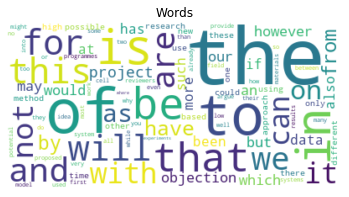

In [48]:
#displaying the generated wordcloud with word occurences
plt.imshow(dataset_count_before_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Words')
plt.show()

<h3> Stopwords Removal and Lemmatization of words </h3>

In [49]:
#importing stopwords 
#excluding "not & no" words from the stopwords list.
stopwords_removal = stopwords.words('english')
stopwords_removal.remove('not')
stopwords_removal.remove('no')

In [50]:
#function to perform lemmatization and stopwords removal
def Lemmatizaton_text(df):
    lemmatization = WordNetLemmatizer()
    for ind, text in enumerate(df):
        temp = []
        for word in str(text).split():
            word = word.lower()
            word = word.strip()
            if word not in stopwords_removal and word.isalpha():
                lemmatize_word = lemmatization.lemmatize(word)
                temp.append(lemmatize_word)
                df.loc[ind] = str(" ".join(temp))
    return df

In [51]:
#calling function lemmatization
dataset['TITLE'] = Lemmatizaton_text(dataset['TITLE'])
dataset['NUTSHELL'] = Lemmatizaton_text(dataset['NUTSHELL'])
dataset['RESEARCH_IDEA'] = Lemmatizaton_text(dataset['RESEARCH_IDEA'])
dataset['PROPOSED_METHOD'] = Lemmatizaton_text(dataset['PROPOSED_METHOD'])
dataset['GAINS_OBSTACLES'] = Lemmatizaton_text(dataset['GAINS_OBSTACLES'])
dataset['APPROPRIATNESS'] = Lemmatizaton_text(dataset['APPROPRIATNESS'])
dataset['PROBABALE_OBJECTION'] = Lemmatizaton_text(dataset['PROBABALE_OBJECTION'])

<h3> Calculated the word count for the entire dataset after stopwords removal and lemmatization </h3>

In [53]:
#function to calculate the word occurences in the dataset consisting of all the features together
def word_occurence1(df):
    words = df['TITLE'].str.split(expand=True).unstack().value_counts()
    words1 = df['NUTSHELL'].str.split(expand=True).unstack().value_counts()
    words2 = df['RESEARCH_IDEA'].str.split(expand=True).unstack().value_counts()
    words3 = df['PROPOSED_METHOD'].str.split(expand=True).unstack().value_counts()
    words4 = df['GAINS_OBSTACLES'].str.split(expand=True).unstack().value_counts()
    words5 = df['APPROPRIATNESS'].str.split(expand=True).unstack().value_counts()
    words6 = df['PROBABALE_OBJECTION'].str.split(expand=True).unstack().value_counts()
    z = {**words, **words1,**words2,**words3,**words4,**words5,**words6}
    return z

In [54]:
#calling the word ocurrence function
word_count_after = word_occurence1(dataset)

#sorting of words in the dataset based on its count
word_counts_after = {k: v for k, v in sorted(word_count_after.items(), key=lambda item: item[1], reverse=True)}
word_counts_2 = pd.Series(word_counts_after)
word_counts_2

not           437
project       243
objection     208
may           194
system        185
             ... 
gramming        1
doom            1
quantizing      1
interfered      1
multiwall       1
Length: 19007, dtype: int64

<h3> Bar Graph </h3>

In [55]:
#calling bar graph function
dataset_count_after_bar = freq_word(word_counts_2)

In [56]:
#displaying the bar chart
iplot(dataset_count_after_bar, filename='basic-bar')

<h3> Word Cloud </h3>

In [57]:
#calling function wordcloud
dataset_count_after_wordcloud = wordcloud(word_counts_2)

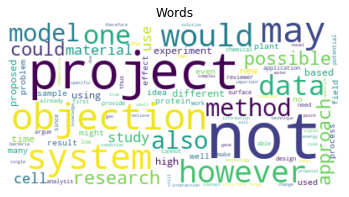

In [58]:
#displaying the generated wordcloud with word occurences
plt.imshow(dataset_count_after_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Words')
plt.show()

<h3> Calculated the distribution of words for every instance against all features </h3>

In [59]:
#function to calculate the distribution of words for every row in all features
def count(df):
    count = []
    for i in df:
        count.append(len(i.split(" ")))
    return count

In [60]:
#calling the count function
dataset_text_word_count_1 = count(dataset['TITLE'])
dataset_text_word_count_2 = count(dataset['NUTSHELL'])
dataset_text_word_count_3 = count(dataset['RESEARCH_IDEA'])
dataset_text_word_count_4 = count(dataset['PROPOSED_METHOD'])
dataset_text_word_count_5 = count(dataset['GAINS_OBSTACLES'])
dataset_text_word_count_6 = count(dataset['APPROPRIATNESS'])
dataset_text_word_count_7 = count(dataset['PROBABALE_OBJECTION'])

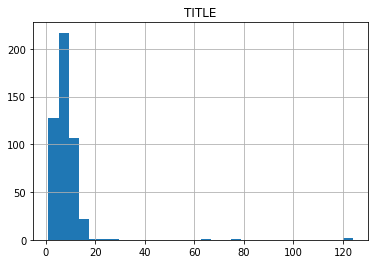

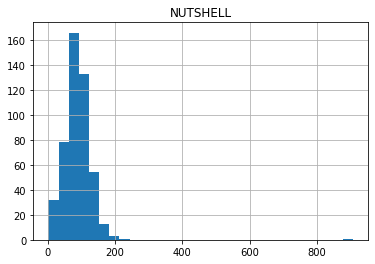

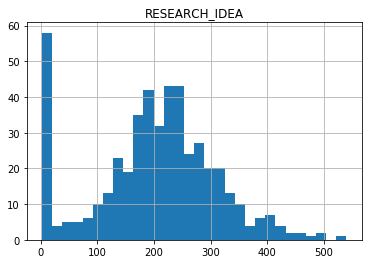

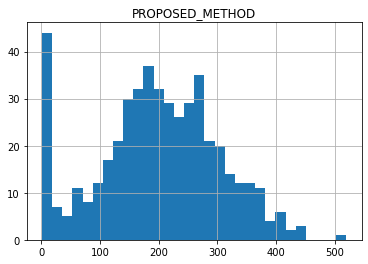

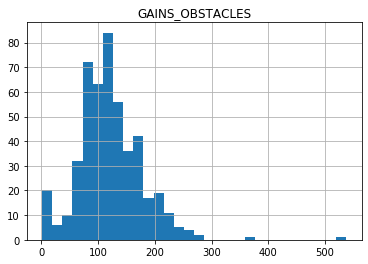

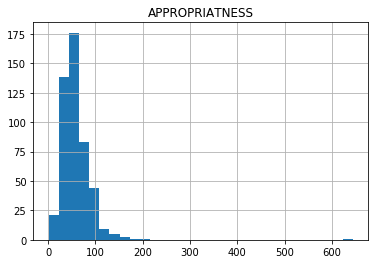

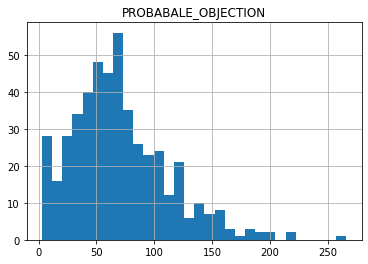

In [74]:
#displaying the distribution of words in an histogram
length_df_w1 = pd.DataFrame({'TITLE':dataset_text_word_count_1})
length_df_w1.hist(bins = 30)
plt.show()

length_df_w2 = pd.DataFrame({'NUTSHELL':dataset_text_word_count_2})
length_df_w2.hist(bins = 30)
plt.show()

length_df_w3 = pd.DataFrame({'RESEARCH_IDEA':dataset_text_word_count_3})
length_df_w3.hist(bins = 30)
plt.show()

length_df_w4 = pd.DataFrame({'PROPOSED_METHOD':dataset_text_word_count_4})
length_df_w4.hist(bins = 30)
plt.show()

length_df_w5 = pd.DataFrame({'GAINS_OBSTACLES':dataset_text_word_count_5})
length_df_w5.hist(bins = 30)
plt.show()

length_df_w6 = pd.DataFrame({'APPROPRIATNESS':dataset_text_word_count_6})
length_df_w6.hist(bins = 30)
plt.show()

length_df_w7 = pd.DataFrame({'PROBABALE_OBJECTION':dataset_text_word_count_7})
length_df_w7.hist(bins = 30)
plt.show()


<h3> Splitting the dataset into features and target variable </h3>

In [1015]:
#splitting into features and target variable
feature = dataset.iloc[:,2:-1].values
target = dataset.iloc[:,-1].values

In [577]:
#displaying the target class
target

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h3> Calculated the distribution of two classes APPROVED and NOT APPORVED </h3>

In [578]:
#function to calculate the distribution of classes
def label_count(df):
    not_approved = 0
    approved = 0
    list1 = []
    for i in df['Class']:
        if i == 1:
            approved = approved + 1
        else:
            not_approved = not_approved + 1
    list1.append(not_approved)
    list1.append(approved)
    return list1

In [579]:
#calling the function label count
dataset_label_count = label_count(dataset)
dataset_label_count

[430, 51]

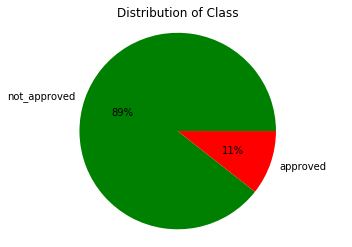

In [580]:
#displaying the distribution in a pie chart
fig = plt.figure()
Sentiments = ['not_approved', 'approved']
mycolors = ["g", "r"]
plt.pie(dataset_label_count,labels=Sentiments,autopct='%1.0f%%', colors = mycolors)
plt.title('Distribution of Class')
plt.axis('equal')
plt.show()

<p> From the above Pie chart, we could see the dataset in imbalanced for both classes </p>
<p> <b>Not Approved:</b> 89% (430)
    <b>Approved:</b> 11% (51)</p>
    

<h2> Splitting of Dataset into train and test sets </h2>

In [581]:
#splitting the main dataset into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(feature,target, test_size = 0.1, random_state = 4)

In [582]:
#Separating each feature from X-train
feature1 = [item[0] for item in X_train]
feature2 = [item[1] for item in X_train]
feature3 = [item[2] for item in X_train]
feature4 = [item[3] for item in X_train]
feature5 = [item[4] for item in X_train]
feature6 = [item[5] for item in X_train]
feature7 = [item[6] for item in X_train]

In [584]:
#Separating each feature from X-test
feature_test_1 = [item[0] for item in X_test]
feature_test_2 = [item[1] for item in X_test]
feature_test_3 = [item[2] for item in X_test]
feature_test_4 = [item[3] for item in X_test]
feature_test_5 = [item[4] for item in X_test]
feature_test_6 = [item[5] for item in X_test]
feature_test_7 = [item[6] for item in X_test]

<h2> Feature Engineering </h2>

<h3> Bag of Words - BoW </h3>

In [585]:
#creating Bag of words feature for both train and test data
cv_bow = CountVectorizer(max_features=10, ngram_range=(1,3))
bow1 = cv_bow.fit_transform(feature1).toarray()
bow11 = cv_bow.transform(feature_test_1).toarray()

cv_bow1 = CountVectorizer(max_features=150, ngram_range=(1,3))
bow2 = cv_bow1.fit_transform(feature2).toarray()
bow22 = cv_bow1.transform(feature_test_2).toarray()

cv_bow2 = CountVectorizer(max_features=300, ngram_range=(1,3))
bow3 = cv_bow2.fit_transform(feature3).toarray()
bow33 = cv_bow2.transform(feature_test_3).toarray()

cv_bow3 = CountVectorizer(max_features=350, ngram_range=(1,3))
bow4 = cv_bow3.fit_transform(feature4).toarray()
bow44 = cv_bow3.transform(feature_test_4).toarray()

cv_bow4 = CountVectorizer(max_features=150, ngram_range=(1,3))
bow5 = cv_bow4.fit_transform(feature5).toarray()
bow55 = cv_bow4.transform(feature_test_5).toarray()

cv_bow5 = CountVectorizer(max_features=75, ngram_range=(1,3))
bow6 = cv_bow5.fit_transform(feature6).toarray()
bow66 = cv_bow5.transform(feature_test_6).toarray()

cv_bow6 = CountVectorizer(max_features=100, ngram_range=(1,3))
bow7 = cv_bow6.fit_transform(feature7).toarray()
bow77 = cv_bow6.transform(feature_test_7).toarray()

In [586]:
#stacking the created Bag of words features horizontally
features_1 = np.hstack((bow1,bow2,bow3,bow4,bow5,bow6,bow7))
features_11 = np.hstack((bow11,bow22,bow33,bow44,bow55,bow66,bow77))

<h3> TF-IDF </h3>

In [587]:
#creating TF-IDF feature for both train and test data
vectorizer = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf1 = vectorizer.fit_transform(feature1)
tf_Idf11 = vectorizer.transform(feature_test_1)

vectorizer1 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf2 = vectorizer1.fit_transform(feature2)
tf_Idf22 = vectorizer1.transform(feature_test_2)

vectorizer2 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf3 = vectorizer2.fit_transform(feature3)
tf_Idf33 = vectorizer2.transform(feature_test_3)

vectorizer3 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf4 = vectorizer3.fit_transform(feature4)
tf_Idf44 = vectorizer3.transform(feature_test_4)

vectorizer4 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf5 = vectorizer4.fit_transform(feature5)
tf_Idf55 = vectorizer4.transform(feature_test_5)

vectorizer5 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf6 = vectorizer5.fit_transform(feature6)
tf_Idf66 = vectorizer5.transform(feature_test_6)

vectorizer6 = TfidfVectorizer(max_features=10, ngram_range=(1,3),use_idf=True)
tf_Idf7 = vectorizer6.fit_transform(feature7)
tf_Idf77 = vectorizer6.transform(feature_test_7)


In [588]:
#converting the sparse matrix to an array for all the features
tf_Idf_np1 =  scp.sparse.csr_matrix.toarray(tf_Idf1)
tf_Idf_np2 =  scp.sparse.csr_matrix.toarray(tf_Idf2)
tf_Idf_np3 =  scp.sparse.csr_matrix.toarray(tf_Idf3)
tf_Idf_np4 =  scp.sparse.csr_matrix.toarray(tf_Idf4)
tf_Idf_np5 =  scp.sparse.csr_matrix.toarray(tf_Idf5)
tf_Idf_np6 =  scp.sparse.csr_matrix.toarray(tf_Idf6)
tf_Idf_np7 =  scp.sparse.csr_matrix.toarray(tf_Idf7)

tf_Idf_np11 =  scp.sparse.csr_matrix.toarray(tf_Idf11)
tf_Idf_np22 =  scp.sparse.csr_matrix.toarray(tf_Idf22)
tf_Idf_np33 =  scp.sparse.csr_matrix.toarray(tf_Idf33)
tf_Idf_np44 =  scp.sparse.csr_matrix.toarray(tf_Idf44)
tf_Idf_np55 =  scp.sparse.csr_matrix.toarray(tf_Idf55)
tf_Idf_np66 =  scp.sparse.csr_matrix.toarray(tf_Idf66)
tf_Idf_np77 =  scp.sparse.csr_matrix.toarray(tf_Idf77)

In [589]:
#stacking the created TF-IDF features horizontally
features_2 = np.hstack((tf_Idf_np1,tf_Idf_np2,tf_Idf_np3,tf_Idf_np4,tf_Idf_np5,tf_Idf_np6,tf_Idf_np7))
features_22 = np.hstack((tf_Idf_np11,tf_Idf_np22,tf_Idf_np33,tf_Idf_np44,tf_Idf_np55,tf_Idf_np66,tf_Idf_np77))

<h3> GloVe </h3>

In [590]:
#opening and loading the downloaded glove vector file
word_embed_glove = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    data = line.split()
    words = data[0]
    coeffs = np.asarray(data[1:], dtype='float32')
    word_embed_glove[words] = coeffs
f.close()

In [591]:
#function to extract the trained glove vector for a word in the dataset (100 dimensions)
def features(df):
    vectors = []
    for i in df:
        if len(i) != 0:
            y = sum([word_embed_glove[w] if w in word_embed_glove else np.zeros((100,)) for w in i.split()])
            x = (len(i.split()))
            v = y/x
        else:
            v = np.zeros((100,))
        vectors.append(v)
    return vectors

In [592]:
#calling function to create glove features for both train and test data
glove1 = features(feature1)
glove2 = features(feature2)
glove3 = features(feature3)
glove4 = features(feature4)
glove5 = features(feature5)
glove6 = features(feature6)
glove7 = features(feature7)

glove11 = features(feature_test_1)
glove22 = features(feature_test_2)
glove33 = features(feature_test_3)
glove44 = features(feature_test_4)
glove55 = features(feature_test_5)
glove66 = features(feature_test_6)
glove77 = features(feature_test_7)

In [593]:
#converting the glove feature to an array
glove_np1 = np.array(glove1)
glove_np2 = np.array(glove2)
glove_np3 = np.array(glove3)
glove_np4 = np.array(glove4)
glove_np5 = np.array(glove5)
glove_np6 = np.array(glove6)
glove_np7 = np.array(glove7)

glove_np11 = np.array(glove11)
glove_np22 = np.array(glove22)
glove_np33 = np.array(glove33)
glove_np44 = np.array(glove44)
glove_np55 = np.array(glove55)
glove_np66 = np.array(glove66)
glove_np77 = np.array(glove77)

In [594]:
#stacking the created GloVe features horizontally
features_3 = np.hstack((glove_np1,glove_np2,glove_np3,glove_np4,glove_np5,glove_np6,glove_np7))
features_33 = np.hstack((glove_np11,glove_np22,glove_np33,glove_np44,glove_np55,glove_np66,glove_np77))

In [595]:
#displaying the shape of the created glove test features
features_33.shape

(49, 700)

<h3> Word2Vec </h3>

In [596]:
#loading the downloaded Google word2vec vector file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [597]:
#function to extract the trained glove vector for a word in the dataset (100 dimensions)
def word2vec_features(df):
    vectors = []
    for i in df:
        if len(i) != 0:
            y = sum([model.wv[w] if w in model.wv.vocab else np.zeros((300,)) for w in i.split(" ")])
            x = len(i.split())
            v = y/x
        else:
            v = np.zeros((300,))
        vectors.append(v)
    return vectors

In [598]:
#calling function to create word2vec features for both train and test data
word2vec1 = word2vec_features(feature1)
word2vec2 = word2vec_features(feature2)
word2vec3 = word2vec_features(feature3)
word2vec4 = word2vec_features(feature4)
word2vec5 = word2vec_features(feature5)
word2vec6 = word2vec_features(feature6)
word2vec7 = word2vec_features(feature7)

word2vec11 = word2vec_features(feature_test_1)
word2vec22 = word2vec_features(feature_test_2)
word2vec33 = word2vec_features(feature_test_3)
word2vec44 = word2vec_features(feature_test_4)
word2vec55 = word2vec_features(feature_test_5)
word2vec66 = word2vec_features(feature_test_6)
word2vec77 = word2vec_features(feature_test_7)

/Users/j/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



In [599]:
#converting the glove feature to an array
word2vec_np1 = np.array(word2vec1)
word2vec_np2 = np.array(word2vec2)
word2vec_np3 = np.array(word2vec3)
word2vec_np4 = np.array(word2vec4)
word2vec_np5 = np.array(word2vec5)
word2vec_np6 = np.array(word2vec6)
word2vec_np7 = np.array(word2vec7)

word2vec_np11 = np.array(word2vec11)
word2vec_np22 = np.array(word2vec22)
word2vec_np33 = np.array(word2vec33)
word2vec_np44 = np.array(word2vec44)
word2vec_np55 = np.array(word2vec55)
word2vec_np66 = np.array(word2vec66)
word2vec_np77 = np.array(word2vec77)

In [600]:
#stacking the created GloVe features horizontally
features_4 = np.hstack((word2vec_np1,word2vec_np2,word2vec_np3,word2vec_np4,word2vec_np5,word2vec_np6,word2vec_np7))
features_44 = np.hstack((word2vec_np11,word2vec_np22,word2vec_np33,word2vec_np44,word2vec_np55,word2vec_np66,word2vec_np77))

In [601]:
#displaying the shape of the created glove test features
features_44.shape

(49, 2100)

<h3> Feature scaling </h3>

In [602]:
#feature scaling for glove vectors for both train and test data
sc1 = StandardScaler()
X_train_glove_scale = sc1.fit_transform(features_3)
X_test_glove_scale = sc1.transform(features_33)

#feature scaling for word2vec vectors for both train and test data
sc2 = StandardScaler()
X_train_word2vec_scale = sc2.fit_transform(features_4)
X_test_word2vec_scale = sc2.transform(features_44)

In [603]:
#Performed PCA dimensionality reduction for visualization of data points in scatter plot
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(features_1)
principalComponents_test_bow = pca.transform(features_11)

pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(features_2)
principalComponents_test_tfidf = pca2.fit_transform(features_22)

pca3 = PCA(n_components=2)
principalComponents3 = pca3.fit_transform(features_3)
principalComponents_test_glove = pca3.transform(features_33)

pca4 = PCA(n_components=2)
principalComponents4 = pca4.fit_transform(features_4)
principalComponents_test_word2vec = pca4.fit_transform(features_44)


#feature scaling for bow vectors for both train and test data
sc3 = StandardScaler()
X_train_bow_scale = sc3.fit_transform(principalComponents1)
X_test_bow_scale = sc3.transform(principalComponents_test_bow)

#feature scaling for tfidf vectors for both train and test data
sc4 = StandardScaler()
X_train_tfidf_scale = sc4.fit_transform(principalComponents2)
X_test_tfidf_scale = sc4.transform(principalComponents_test_tfidf)

#feature scaling for glove vectors for both train and test data
sc4 = StandardScaler()
X_train_glove_scale_1 = sc4.fit_transform(principalComponents3)
X_test_glove_scale_1 = sc4.transform(principalComponents_test_glove)

#feature scaling for word2vec vectors for both train and test data
sc4 = StandardScaler()
X_train_tfidf_scale_1 = sc4.fit_transform(principalComponents4)
X_test_word2vec_scale_1 = sc4.transform(principalComponents_test_word2vec)

In [ ]:
#scatterplot displaying the both classes of test data based on actual result - feature 1
plt.subplot(2, 2, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=Y_test, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

In [1037]:
#Concatenating the train and test set features into one for scatterplot - BoW, TF-IDF, GloVe, Word2Vec
feat1 = np.concatenate((principalComponents1, principalComponents_test_bow), axis=0)
feat2 = np.concatenate((principalComponents2, principalComponents_test_tfidf), axis=0)
feat3 = np.concatenate((principalComponents3, principalComponents_test_glove), axis=0)
feat4 = np.concatenate((principalComponents4, principalComponents_test_word2vec), axis=0)

#Concatenating the train and test set output labels into one for scatterplot
outputlabel = np.concatenate((Y_train, Y_test), axis=0)


In [1038]:
font1 = {'size':8}

Text(0.5, 1.0, 'Actual Data Points D1 v/s D2 - Word2Vec')

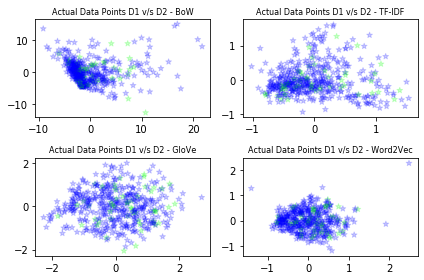

In [1040]:
#scatterplot displaying the both classes of test data based on actual result - feature 1
plt.subplot(2, 2, 1)
plt.scatter(feat1[:,0], feat1[:,1], alpha=0.2, c=outputlabel, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on actual result - feature 2
plt.subplot(2, 2, 2)
plt.scatter(feat2[:,0], feat2[:,1], alpha=0.2, c=outputlabel, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - TF-IDF",fontdict = font1)

#scatterplot displaying the both classes of test data based on actual result - feature 3
plt.subplot(2, 2, 3)
plt.scatter(feat3[:,0], feat3[:,1], alpha=0.2, c=outputlabel, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - GloVe",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on actual result - feature 4
plt.subplot(2, 2, 4)
plt.scatter(feat4[:,0], feat4[:,1], alpha=0.2, c=outputlabel, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - Word2Vec",fontdict = font1)

Text(0.5, 1.0, 'Actual Data Points D1 v/s D2 - Word2Vec - Test')

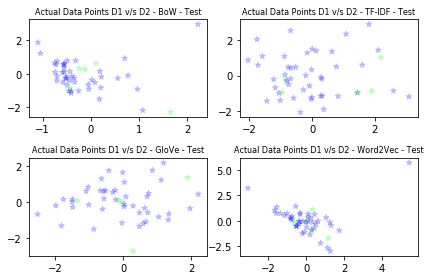

In [1039]:
#scatterplot displaying the both classes of test data based on actual result - feature 1
plt.subplot(2, 2, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=Y_test, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - BoW - Test",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on actual result - feature 2
plt.subplot(2, 2, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=Y_test, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - TF-IDF - Test",fontdict = font1)

#scatterplot displaying the both classes of test data based on actual result - feature 3
plt.subplot(2, 2, 3)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=Y_test, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - GloVe - Test",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on actual result - feature 4
plt.subplot(2, 2, 4)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=Y_test, cmap='brg',marker='*')
plt.title("Actual Data Points D1 v/s D2 - Word2Vec - Test",fontdict = font1)

<h2> ML Models </h2>
<h3> Multinomial Naive Bayes - BoW (baseline) </h3>

In [611]:
#implementing Multinomial Naive Bayes - Bag of words
classifier_MNB_baseline_bow = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_bow.fit(features_1,Y_train)
pred_MNB_baseline_bow = classifier_MNB_baseline_bow.predict(features_11)
print(pred_MNB_baseline_bow)

Accuracy KFold: 0.82 Accuracy RepeatedKFold: 2.43 Accuracy StratifiedKFold: 0.82
Recall KFold: 0.12 Recall RepeatedKFold: 0.27 Recall StratifiedKFold: 0.11
Precision KFold: 0.14 Precision RepeatedKFold: 0.28 Precision StratifiedKFold: 0.16
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0]


In [612]:
pred_MNB_baseline_bow_proba = classifier_MNB_baseline_bow.predict_proba(features_1)
pred_MNB_baseline_bow_log_proba = classifier_MNB_baseline_bow.predict_log_proba(features_11)
print(pred_MNB_baseline_bow_proba,pred_MNB_baseline_bow_log_proba)

[[1.00000000e+00 5.81865721e-35]
 [9.62501559e-01 3.74984409e-02]
 [1.00000000e+00 3.49850273e-16]
 [1.00000000e+00 2.71052173e-14]
 [1.00000000e+00 2.42367946e-18]
 [1.00000000e+00 1.27277085e-23]
 [1.00000000e+00 1.40245961e-20]
 [1.00000000e+00 3.63032253e-22]
 [1.00000000e+00 5.03995954e-25]
 [4.40367632e-08 9.99999956e-01]
 [1.50893282e-26 1.00000000e+00]
 [9.99999941e-01 5.94196638e-08]
 [4.59006646e-02 9.54099335e-01]
 [1.00000000e+00 5.82910184e-14]
 [1.00000000e+00 8.62160769e-30]
 [1.00000000e+00 7.12549917e-13]
 [2.32359507e-23 1.00000000e+00]
 [1.00000000e+00 1.29988527e-29]
 [1.00000000e+00 2.75918479e-17]
 [9.99990388e-01 9.61229591e-06]
 [9.16735035e-01 8.32649652e-02]
 [2.20187915e-14 1.00000000e+00]
 [9.99999999e-01 5.01964730e-10]
 [1.00000000e+00 5.00056893e-29]
 [1.00000000e+00 3.04223772e-10]
 [1.28486615e-14 1.00000000e+00]
 [1.00000000e+00 5.75155595e-54]
 [1.00000000e+00 1.36911953e-14]
 [1.00000000e+00 1.59537365e-15]
 [9.99999999e-01 1.30554591e-09]
 [1.000000

Accuracy: 0.8775510204081632
f1 Score 0.5916666666666666
confusion_matrix [[42  2]
 [ 4  1]]
precision_score 0.6231884057971014
recall_score 0.5772727272727273


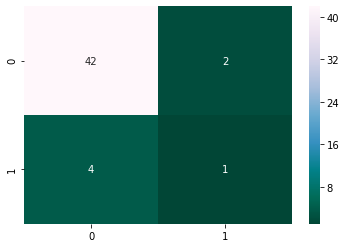

In [613]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_bow))
cm = confusion_matrix(Y_test, pred_MNB_baseline_bow)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [614]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

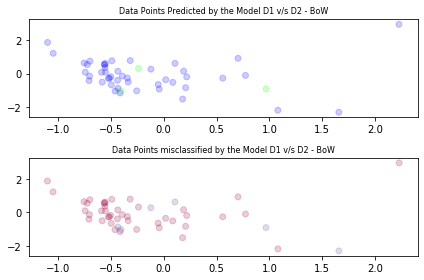

In [615]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_MNB_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()


<h3> Multinomial Naive Bayes - TF-IDF </h3>

In [616]:
#implementing Multinomial Naive Bayes - TF-IDF
classifier_MNB_baseline_tfidf = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_tfidf.fit(features_2,Y_train)
pred_MNB_baseline_tfidf = classifier_MNB_baseline_tfidf.predict(features_22)
pred_MNB_baseline_tfidf

Accuracy KFold: 0.88 Accuracy RepeatedKFold: 2.66 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [617]:
pred_MNB_baseline_tfidf_proba = classifier_MNB_baseline_tfidf.predict_proba(features_2)
pred_MNB_baseline_tfidf_log_proba = classifier_MNB_baseline_tfidf.predict_log_proba(features_22)
print(pred_MNB_baseline_tfidf_proba,pred_MNB_baseline_tfidf_log_proba)

[[0.94104412 0.05895588]
 [0.81591598 0.18408402]
 [0.96349454 0.03650546]
 [0.89805555 0.10194445]
 [0.91143399 0.08856601]
 [0.97680034 0.02319966]
 [0.94994171 0.05005829]
 [0.94192117 0.05807883]
 [0.94666081 0.05333919]
 [0.68223178 0.31776822]
 [0.86914406 0.13085594]
 [0.96489334 0.03510666]
 [0.82090193 0.17909807]
 [0.93565087 0.06434913]
 [0.93651808 0.06348192]
 [0.93650647 0.06349353]
 [0.85838482 0.14161518]
 [0.93201019 0.06798981]
 [0.88681043 0.11318957]
 [0.88410246 0.11589754]
 [0.84372092 0.15627908]
 [0.82628045 0.17371955]
 [0.91937523 0.08062477]
 [0.83544543 0.16455457]
 [0.80514838 0.19485162]
 [0.3263539  0.6736461 ]
 [0.92737409 0.07262591]
 [0.91772398 0.08227602]
 [0.7305347  0.2694653 ]
 [0.86911252 0.13088748]
 [0.97779343 0.02220657]
 [0.97241525 0.02758475]
 [0.96198183 0.03801817]
 [0.97199807 0.02800193]
 [0.98159475 0.01840525]
 [0.95775578 0.04224422]
 [0.89675016 0.10324984]
 [0.95258249 0.04741751]
 [0.91630429 0.08369571]
 [0.97202933 0.02797067]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



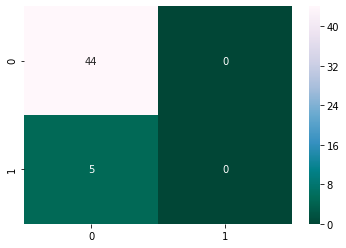

In [618]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_MNB_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [619]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        


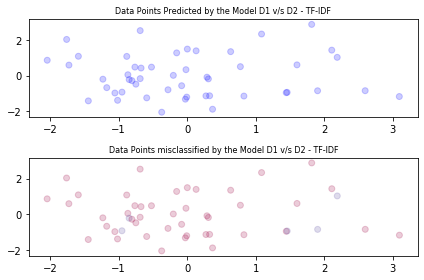

In [620]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_MNB_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()


<h3> Random Forest - BoW </h3>

In [621]:
#implementing Random Forest - Bag of words
classifier_RF_baseline_bow = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_bow.fit(features_1,Y_train)
pred_RF_baseline_bow = classifier_RF_baseline_bow.predict(features_11)
pred_RF_baseline_bow

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [622]:
pred_RF_baseline_bow_proba = classifier_RF_baseline_bow.predict_proba(features_1)
pred_RF_baseline_bow_log_proba = classifier_RF_baseline_bow.predict_log_proba(features_11)
print(pred_RF_baseline_bow_proba,pred_RF_baseline_bow_log_proba)

[[0.96 0.04]
 [0.38 0.62]
 [0.98 0.02]
 [0.97 0.03]
 [0.98 0.02]
 [0.97 0.03]
 [0.95 0.05]
 [0.89 0.11]
 [1.   0.  ]
 [0.28 0.72]
 [0.31 0.69]
 [0.98 0.02]
 [0.92 0.08]
 [0.98 0.02]
 [0.99 0.01]
 [0.99 0.01]
 [0.28 0.72]
 [0.98 0.02]
 [0.99 0.01]
 [0.97 0.03]
 [0.88 0.12]
 [0.39 0.61]
 [0.97 0.03]
 [0.99 0.01]
 [0.97 0.03]
 [0.88 0.12]
 [0.97 0.03]
 [0.96 0.04]
 [1.   0.  ]
 [0.95 0.05]
 [0.99 0.01]
 [0.99 0.01]
 [0.98 0.02]
 [0.96 0.04]
 [0.95 0.05]
 [0.95 0.05]
 [0.94 0.06]
 [0.97 0.03]
 [0.95 0.05]
 [1.   0.  ]
 [0.99 0.01]
 [0.96 0.04]
 [0.99 0.01]
 [0.93 0.07]
 [0.93 0.07]
 [0.96 0.04]
 [1.   0.  ]
 [0.97 0.03]
 [0.87 0.13]
 [0.97 0.03]
 [1.   0.  ]
 [0.95 0.05]
 [0.97 0.03]
 [0.97 0.03]
 [0.91 0.09]
 [0.33 0.67]
 [0.97 0.03]
 [0.97 0.03]
 [0.94 0.06]
 [0.94 0.06]
 [0.99 0.01]
 [0.99 0.01]
 [0.96 0.04]
 [0.95 0.05]
 [0.98 0.02]
 [0.93 0.07]
 [0.96 0.04]
 [0.94 0.06]
 [1.   0.  ]
 [0.94 0.06]
 [0.99 0.01]
 [0.96 0.04]
 [0.97 0.03]
 [0.96 0.04]
 [0.96 0.04]
 [0.99 0.01]
 [1.   0.  ]

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



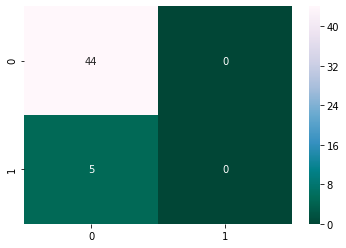

In [623]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_bow))
cm = confusion_matrix(Y_test, pred_RF_baseline_bow)
print("precision_score", precision_score(Y_test, pred_RF_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [624]:
arr = []
for ind,value in enumerate(pred_RF_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

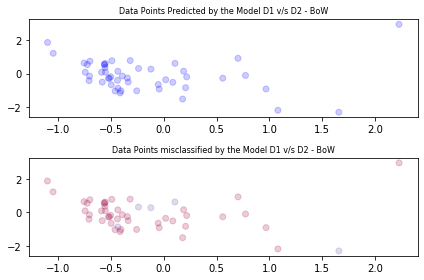

In [625]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_RF_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()


<h3> Random Forest - TF-IDF</h3>

In [626]:
#implementing Random Forest - TF-IDF
classifier_RF_baseline_tfidf = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_tfidf.fit(features_2,Y_train)
pred_RF_baseline_tfidf = classifier_RF_baseline_tfidf.predict(features_22)
pred_RF_baseline_tfidf

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [627]:
pred_RF_baseline_tfidf_proba = classifier_RF_baseline_tfidf.predict_proba(features_22)
pred_RF_baseline_tfidf_log_proba = classifier_RF_baseline_tfidf.predict_log_proba(features_22)
print(pred_RF_baseline_tfidf_proba,pred_RF_baseline_tfidf_log_proba)

[[0.88 0.12]
 [0.86 0.14]
 [0.87 0.13]
 [0.89 0.11]
 [0.79 0.21]
 [0.96 0.04]
 [0.96 0.04]
 [0.93 0.07]
 [0.89 0.11]
 [0.9  0.1 ]
 [0.89 0.11]
 [0.87 0.13]
 [0.89 0.11]
 [0.95 0.05]
 [0.88 0.12]
 [0.79 0.21]
 [0.92 0.08]
 [0.94 0.06]
 [0.83 0.17]
 [0.88 0.12]
 [0.9  0.1 ]
 [0.89 0.11]
 [0.82 0.18]
 [0.86 0.14]
 [0.9  0.1 ]
 [0.84 0.16]
 [0.94 0.06]
 [0.91 0.09]
 [0.95 0.05]
 [0.97 0.03]
 [0.87 0.13]
 [0.86 0.14]
 [0.73 0.27]
 [0.86 0.14]
 [0.84 0.16]
 [0.95 0.05]
 [0.97 0.03]
 [0.9  0.1 ]
 [0.93 0.07]
 [0.85 0.15]
 [0.93 0.07]
 [0.93 0.07]
 [0.95 0.05]
 [0.74 0.26]
 [0.87 0.13]
 [0.83 0.17]
 [0.79 0.21]
 [0.93 0.07]
 [0.95 0.05]] [[-0.12783337 -2.12026354]
 [-0.15082289 -1.96611286]
 [-0.13926207 -2.04022083]
 [-0.11653382 -2.20727491]
 [-0.23572233 -1.56064775]
 [-0.04082199 -3.21887582]
 [-0.04082199 -3.21887582]
 [-0.07257069 -2.65926004]
 [-0.11653382 -2.20727491]
 [-0.10536052 -2.30258509]
 [-0.11653382 -2.20727491]
 [-0.13926207 -2.04022083]
 [-0.11653382 -2.20727491]
 [-0.051293

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



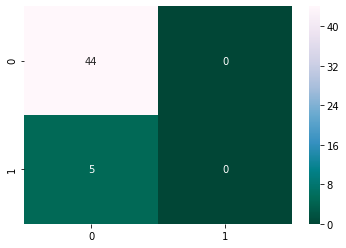

In [628]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_RF_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_RF_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [629]:
arr = []
for ind,value in enumerate(pred_RF_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

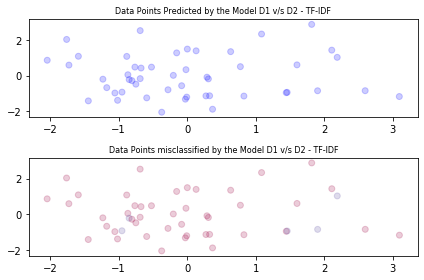

In [630]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_RF_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - GloVe </h3>

In [631]:
#implementing Random Forest - GloVe
classifier_RF_baseline_glove = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_RF_baseline_glove = classifier_RF_baseline_glove.predict(X_test_glove_scale)
pred_RF_baseline_glove

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [632]:
pred_RF_baseline_glove_proba = classifier_RF_baseline_glove.predict_proba(X_test_glove_scale)
pred_RF_baseline_glove_log_proba = classifier_RF_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_RF_baseline_glove_proba,pred_RF_baseline_glove_log_proba)

[[0.98 0.02]
 [0.93 0.07]
 [0.85 0.15]
 [0.77 0.23]
 [0.82 0.18]
 [0.9  0.1 ]
 [0.75 0.25]
 [0.8  0.2 ]
 [0.91 0.09]
 [0.82 0.18]
 [0.99 0.01]
 [0.67 0.33]
 [0.83 0.17]
 [0.92 0.08]
 [0.94 0.06]
 [0.89 0.11]
 [0.96 0.04]
 [0.9  0.1 ]
 [0.8  0.2 ]
 [0.98 0.02]
 [0.82 0.18]
 [0.78 0.22]
 [0.81 0.19]
 [0.81 0.19]
 [0.98 0.02]
 [0.92 0.08]
 [0.77 0.23]
 [0.91 0.09]
 [0.81 0.19]
 [0.87 0.13]
 [0.84 0.16]
 [0.78 0.22]
 [0.77 0.23]
 [0.92 0.08]
 [0.96 0.04]
 [0.79 0.21]
 [0.93 0.07]
 [0.91 0.09]
 [0.79 0.21]
 [0.97 0.03]
 [0.85 0.15]
 [0.85 0.15]
 [0.83 0.17]
 [0.85 0.15]
 [0.79 0.21]
 [0.73 0.27]
 [0.92 0.08]
 [0.91 0.09]
 [0.91 0.09]] [[-0.02020271 -3.91202301]
 [-0.07257069 -2.65926004]
 [-0.16251893 -1.89711998]
 [-0.26136476 -1.46967597]
 [-0.19845094 -1.71479843]
 [-0.10536052 -2.30258509]
 [-0.28768207 -1.38629436]
 [-0.22314355 -1.60943791]
 [-0.09431068 -2.40794561]
 [-0.19845094 -1.71479843]
 [-0.01005034 -4.60517019]
 [-0.40047757 -1.10866262]
 [-0.18632958 -1.77195684]
 [-0.083381

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



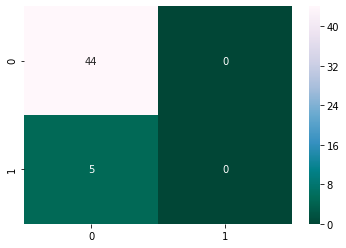

In [633]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_glove))
cm = confusion_matrix(Y_test, pred_RF_baseline_glove)
print("precision_score", precision_score(Y_test, pred_RF_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [634]:
arr = []
for ind,value in enumerate(pred_RF_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

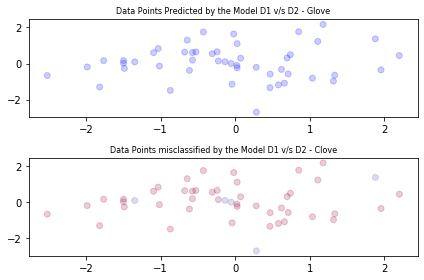

In [635]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - Glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - Clove",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - Word2Vec </h3>

In [636]:
#implementing Random Forest - Word2Vec
classifier_RF_baseline_word2vec = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_RF_baseline_word2vec = classifier_RF_baseline_word2vec.predict(X_test_word2vec_scale)
pred_RF_baseline_word2vec

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [637]:
pred_RF_baseline_word2vec_proba = classifier_RF_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_RF_baseline_word2vec_log_proba = classifier_RF_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_RF_baseline_word2vec_proba,pred_RF_baseline_word2vec_log_proba)

[[0.91 0.09]
 [0.84 0.16]
 [0.89 0.11]
 [0.8  0.2 ]
 [0.69 0.31]
 [0.92 0.08]
 [0.81 0.19]
 [0.91 0.09]
 [0.87 0.13]
 [0.93 0.07]
 [0.95 0.05]
 [0.61 0.39]
 [0.88 0.12]
 [0.89 0.11]
 [0.88 0.12]
 [0.96 0.04]
 [0.92 0.08]
 [0.95 0.05]
 [0.9  0.1 ]
 [0.96 0.04]
 [0.88 0.12]
 [0.79 0.21]
 [0.76 0.24]
 [0.79 0.21]
 [0.99 0.01]
 [0.84 0.16]
 [0.76 0.24]
 [0.89 0.11]
 [0.87 0.13]
 [0.87 0.13]
 [0.86 0.14]
 [0.85 0.15]
 [0.65 0.35]
 [0.93 0.07]
 [0.98 0.02]
 [0.87 0.13]
 [0.87 0.13]
 [0.88 0.12]
 [0.75 0.25]
 [0.91 0.09]
 [0.85 0.15]
 [0.79 0.21]
 [0.76 0.24]
 [0.74 0.26]
 [0.81 0.19]
 [0.86 0.14]
 [0.93 0.07]
 [0.95 0.05]
 [0.83 0.17]] [[-0.09431068 -2.40794561]
 [-0.17435339 -1.83258146]
 [-0.11653382 -2.20727491]
 [-0.22314355 -1.60943791]
 [-0.37106368 -1.17118298]
 [-0.08338161 -2.52572864]
 [-0.21072103 -1.66073121]
 [-0.09431068 -2.40794561]
 [-0.13926207 -2.04022083]
 [-0.07257069 -2.65926004]
 [-0.05129329 -2.99573227]
 [-0.49429632 -0.94160854]
 [-0.12783337 -2.12026354]
 [-0.116533

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



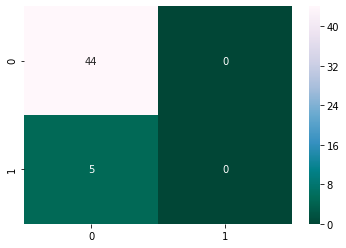

In [638]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_RF_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_RF_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [639]:
arr = []
for ind,value in enumerate(pred_RF_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

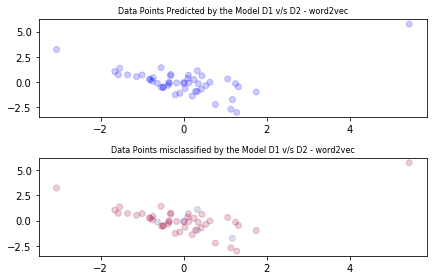

In [640]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Support Vector Machines - BoW </h3>

In [641]:
#implementing Support Vector Machines - Bag of words
classifier_SVM_baseline_bow = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_bow.fit(features_1,Y_train)
pred_SVM_baseline_bow = classifier_SVM_baseline_bow.predict(features_11)
pred_SVM_baseline_bow

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [642]:
pred_SVM_baseline_bow_proba = classifier_SVM_baseline_bow.predict_proba(features_11)
pred_SVM_baseline_bow_log_proba = classifier_SVM_baseline_bow.predict_log_proba(features_11)
print(pred_SVM_baseline_bow_proba,pred_SVM_baseline_bow_log_proba)

[[0.8840626  0.1159374 ]
 [0.87985613 0.12014387]
 [0.89402547 0.10597453]
 [0.8844218  0.1155782 ]
 [0.89200492 0.10799508]
 [0.88941071 0.11058929]
 [0.90163029 0.09836971]
 [0.89346761 0.10653239]
 [0.88584112 0.11415888]
 [0.89511105 0.10488895]
 [0.88740622 0.11259378]
 [0.89153186 0.10846814]
 [0.89405194 0.10594806]
 [0.89190772 0.10809228]
 [0.89320207 0.10679793]
 [0.87522029 0.12477971]
 [0.89003383 0.10996617]
 [0.89465695 0.10534305]
 [0.88751422 0.11248578]
 [0.89532635 0.10467365]
 [0.90000222 0.09999778]
 [0.89189572 0.10810428]
 [0.89525706 0.10474294]
 [0.89878663 0.10121337]
 [0.89103167 0.10896833]
 [0.89358109 0.10641891]
 [0.90811414 0.09188586]
 [0.88820993 0.11179007]
 [0.89093156 0.10906844]
 [0.88811652 0.11188348]
 [0.88988808 0.11011192]
 [0.89670978 0.10329022]
 [0.88516351 0.11483649]
 [0.90242332 0.09757668]
 [0.90677478 0.09322522]
 [0.87643391 0.12356609]
 [0.89471633 0.10528367]
 [0.87985219 0.12014781]
 [0.88793779 0.11206221]
 [0.89567715 0.10432285]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



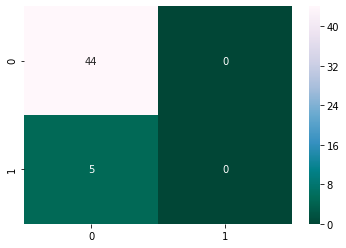

In [643]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_bow))
cm = confusion_matrix(Y_test, pred_SVM_baseline_bow)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [644]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

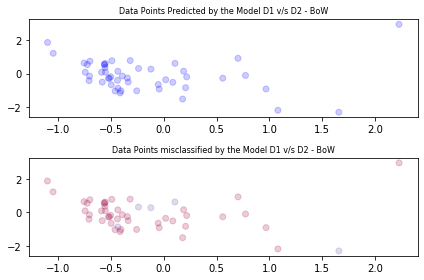

In [645]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_SVM_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

<h3> Support Vector Machines - TF-IDF </h3>

In [646]:
#implementing Support Vector Machines - TF-IDF
classifier_SVM_baseline_tfidf = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_tfidf.fit(features_2,Y_train)
pred_SVM_baseline_tfidf = classifier_SVM_baseline_tfidf.predict(features_22)
pred_SVM_baseline_tfidf

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [647]:
pred_SVM_baseline_tfidf_proba = classifier_SVM_baseline_tfidf.predict_proba(features_22)
pred_SVM_baseline_tfidf_log_proba = classifier_SVM_baseline_tfidf.predict_log_proba(features_22)
pred_SVM_baseline_tfidf_log_proba = classifier_SVM_baseline_tfidf.predict_log_proba(features_22)
print(pred_SVM_baseline_tfidf_log_proba,pred_SVM_baseline_tfidf_log_proba)

[[-0.14523967 -2.00111105]
 [-0.0980961  -2.37045479]
 [-0.11613678 -2.21049309]
 [-0.10443929 -2.31091454]
 [-0.11955659 -2.18314827]
 [-0.12283561 -2.15769749]
 [-0.14785741 -1.9845249 ]
 [-0.1221419  -2.1630212 ]
 [-0.11497293 -2.2199943 ]
 [-0.12810184 -2.11829696]
 [-0.10450198 -2.31034525]
 [-0.14696716 -1.99012991]
 [-0.12654088 -2.12979323]
 [-0.12386273 -2.1498735 ]
 [-0.12101987 -2.17170029]
 [-0.08192702 -2.54261028]
 [-0.09865406 -2.36505746]
 [-0.12978237 -2.10608578]
 [-0.09828563 -2.36861782]
 [-0.12087288 -2.17284362]
 [-0.164632   -1.88522953]
 [-0.10504428 -2.30543576]
 [-0.11771701 -2.19775296]
 [-0.09718854 -2.37930322]
 [-0.10828838 -2.2766131 ]
 [-0.10915312 -2.26908381]
 [-0.12191657 -2.16475737]
 [-0.11734723 -2.20071788]
 [-0.14316686 -2.014474  ]
 [-0.13607478 -2.06181667]
 [-0.1092189  -2.26851363]
 [-0.10141341 -2.33882815]
 [-0.09384653 -2.41265084]
 [-0.11283381 -2.23772572]
 [-0.09446993 -2.40633687]
 [-0.12964194 -2.10709972]
 [-0.12056145 -2.17527089]
 

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



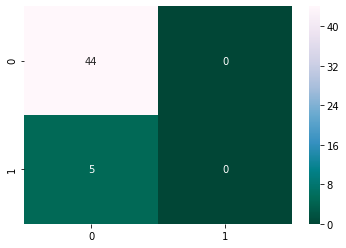

In [648]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_SVM_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [649]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

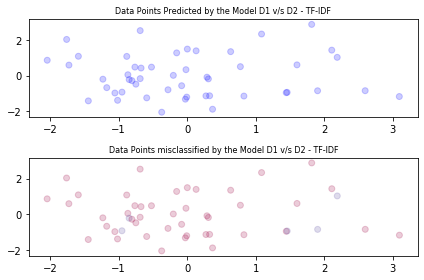

In [650]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_SVM_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

<h3> Support Vector Machines - GloVe </h3>

In [651]:
#implementing Support Vector Machines - Glove
classifier_SVM_baseline_glove = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_SVM_baseline_glove = classifier_SVM_baseline_glove.predict(X_test_glove_scale)
pred_SVM_baseline_glove

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [652]:
pred_SVM_baseline_tfidf_proba = classifier_SVM_baseline_glove.predict_proba(X_test_glove_scale)
pred_SVM_baseline_tfidf_log_proba = classifier_SVM_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_SVM_baseline_tfidf_proba,pred_SVM_baseline_tfidf_log_proba)

[[0.89595331 0.10404669]
 [0.92138317 0.07861683]
 [0.92066774 0.07933226]
 [0.86521408 0.13478592]
 [0.9201938  0.0798062 ]
 [0.89254535 0.10745465]
 [0.89970422 0.10029578]
 [0.91332068 0.08667932]
 [0.92362867 0.07637133]
 [0.90260751 0.09739249]
 [0.93878502 0.06121498]
 [0.87239103 0.12760897]
 [0.85998421 0.14001579]
 [0.90371313 0.09628687]
 [0.90226044 0.09773956]
 [0.91587713 0.08412287]
 [0.91276874 0.08723126]
 [0.89815199 0.10184801]
 [0.91182178 0.08817822]
 [0.92762255 0.07237745]
 [0.85393684 0.14606316]
 [0.89171341 0.10828659]
 [0.86879903 0.13120097]
 [0.80603131 0.19396869]
 [0.93104043 0.06895957]
 [0.91796551 0.08203449]
 [0.88693277 0.11306723]
 [0.87140067 0.12859933]
 [0.89646187 0.10353813]
 [0.88447612 0.11552388]
 [0.87812132 0.12187868]
 [0.89775219 0.10224781]
 [0.88206578 0.11793422]
 [0.89800205 0.10199795]
 [0.91479257 0.08520743]
 [0.88896944 0.11103056]
 [0.89196446 0.10803554]
 [0.93311169 0.06688831]
 [0.87603307 0.12396693]
 [0.88841594 0.11158406]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



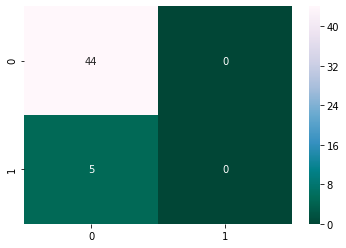

In [653]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_glove))
cm = confusion_matrix(Y_test, pred_SVM_baseline_glove)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

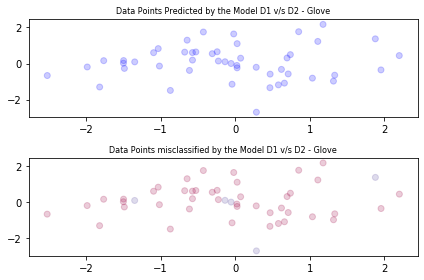

In [654]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - Glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - Glove",fontdict = font1)
plt.tight_layout()


<h3> Support Vector Machines - Word2Vec </h3>

In [655]:
#implementing Support Vector Machines - Glove
classifier_SVM_baseline_word2vec = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_SVM_baseline_word2vec = classifier_SVM_baseline_word2vec.predict(X_test_word2vec_scale)
pred_SVM_baseline_word2vec

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [656]:
pred_SVM_baseline_word2vec_proba = classifier_SVM_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_SVM_baseline_word2vec_log_proba = classifier_SVM_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_SVM_baseline_word2vec_proba,pred_SVM_baseline_word2vec_log_proba)

[[0.90474734 0.09525266]
 [0.93082776 0.06917224]
 [0.9146661  0.0853339 ]
 [0.85665359 0.14334641]
 [0.90003672 0.09996328]
 [0.8180907  0.1819093 ]
 [0.8730531  0.1269469 ]
 [0.90060493 0.09939507]
 [0.91226049 0.08773951]
 [0.93200515 0.06799485]
 [0.96218584 0.03781416]
 [0.87661304 0.12338696]
 [0.79293686 0.20706314]
 [0.91970772 0.08029228]
 [0.94137869 0.05862131]
 [0.93869568 0.06130432]
 [0.89423505 0.10576495]
 [0.92700399 0.07299601]
 [0.88279006 0.11720994]
 [0.92258527 0.07741473]
 [0.87727448 0.12272552]
 [0.8509725  0.1490275 ]
 [0.8545705  0.1454295 ]
 [0.85461238 0.14538762]
 [0.91830115 0.08169885]
 [0.93413945 0.06586055]
 [0.8641973  0.1358027 ]
 [0.83818972 0.16181028]
 [0.88219397 0.11780603]
 [0.84657057 0.15342943]
 [0.86771368 0.13228632]
 [0.90069079 0.09930921]
 [0.89047668 0.10952332]
 [0.86906869 0.13093131]
 [0.90315492 0.09684508]
 [0.90165518 0.09834482]
 [0.88959705 0.11040295]
 [0.94022588 0.05977412]
 [0.86905596 0.13094404]
 [0.88200068 0.11799932]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



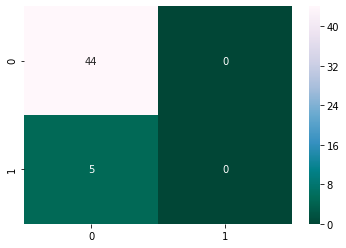

In [657]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_SVM_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [658]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

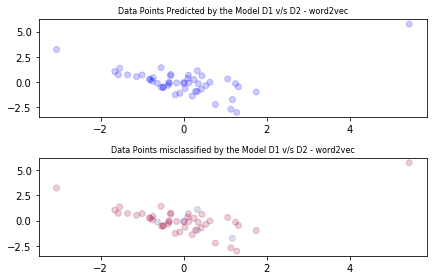

In [659]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - BoW</h3>

In [660]:
#implementing Logistic Regression - Bag of Words
classifier_Log_baseline_bow = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_bow.fit(features_1,Y_train)
pred_Log_baseline_bow = classifier_Log_baseline_bow.predict(features_11)
pred_Log_baseline_bow

Accuracy KFold: 0.87 Accuracy RepeatedKFold: 2.61 Accuracy StratifiedKFold: 0.86
Recall KFold: 0.03 Recall RepeatedKFold: 0.20 Recall StratifiedKFold: 0.05
Precision KFold: 0.06 Precision RepeatedKFold: 0.24 Precision StratifiedKFold: 0.07


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [661]:
pred_Log_baseline_bow_proba = classifier_Log_baseline_bow.predict_proba(features_11)
pred_Log_baseline_bow_log_proba = classifier_Log_baseline_bow.predict_log_proba(features_11)
print(pred_Log_baseline_bow_proba,pred_Log_baseline_bow_log_proba)

[[9.99959228e-01 4.07720868e-05]
 [9.99989821e-01 1.01785025e-05]
 [9.75241742e-01 2.47582581e-02]
 [9.97713379e-01 2.28662057e-03]
 [9.99596162e-01 4.03838481e-04]
 [9.99200569e-01 7.99430898e-04]
 [9.94957506e-01 5.04249394e-03]
 [9.92156902e-01 7.84309781e-03]
 [9.98615499e-01 1.38450078e-03]
 [9.95918688e-01 4.08131244e-03]
 [9.99496096e-01 5.03903762e-04]
 [9.72849628e-01 2.71503723e-02]
 [9.95368306e-01 4.63169428e-03]
 [9.92887407e-01 7.11259290e-03]
 [9.98678531e-01 1.32146930e-03]
 [9.99886054e-01 1.13946223e-04]
 [9.97610493e-01 2.38950725e-03]
 [9.39746286e-01 6.02537145e-02]
 [9.99752262e-01 2.47738418e-04]
 [9.97168132e-01 2.83186798e-03]
 [9.42187014e-01 5.78129857e-02]
 [9.97013268e-01 2.98673177e-03]
 [9.63626399e-01 3.63736007e-02]
 [9.90239602e-01 9.76039779e-03]
 [9.99344221e-01 6.55779132e-04]
 [9.72687229e-01 2.73127711e-02]
 [8.14435181e-01 1.85564819e-01]
 [9.95608834e-01 4.39116619e-03]
 [9.98318096e-01 1.68190354e-03]
 [9.88349260e-01 1.16507396e-02]
 [9.986391

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



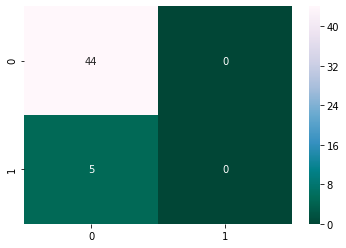

In [662]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_bow))
cm = confusion_matrix(Y_test, pred_Log_baseline_bow)
print("precision_score", precision_score(Y_test, pred_Log_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [663]:
arr = []
for ind,value in enumerate(pred_Log_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

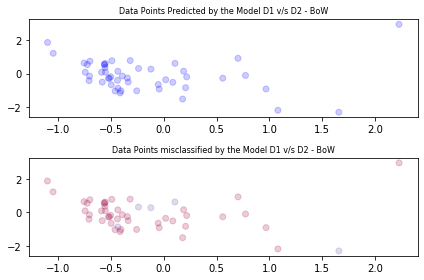

In [664]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Log_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - BoW",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - TF-IDF</h3>

In [665]:
#implementing Logistic Regression - TF-IDF
classifier_Log_baseline_tfidf = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_tfidf.fit(features_2,Y_train)
pred_Log_baseline_tfidf = classifier_Log_baseline_tfidf.predict(features_22)
pred_Log_baseline_tfidf

Accuracy KFold: 0.88 Accuracy RepeatedKFold: 2.65 Accuracy StratifiedKFold: 0.88
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [666]:
pred_Log_baseline_tfidf_proba = classifier_Log_baseline_tfidf.predict_proba(features_22)
pred_Log_baseline_tfidf_log_proba = classifier_Log_baseline_tfidf.predict_log_proba(features_22)
print(pred_Log_baseline_tfidf_proba,pred_Log_baseline_tfidf_log_proba)

[[0.97735026 0.02264974]
 [0.93844597 0.06155403]
 [0.93101375 0.06898625]
 [0.85345917 0.14654083]
 [0.94818057 0.05181943]
 [0.92520173 0.07479827]
 [0.97944963 0.02055037]
 [0.90536083 0.09463917]
 [0.95130691 0.04869309]
 [0.97737453 0.02262547]
 [0.93028758 0.06971242]
 [0.96614914 0.03385086]
 [0.91168077 0.08831923]
 [0.90077547 0.09922453]
 [0.97375202 0.02624798]
 [0.88695483 0.11304517]
 [0.9596672  0.0403328 ]
 [0.94800146 0.05199854]
 [0.84218069 0.15781931]
 [0.96651755 0.03348245]
 [0.98781847 0.01218153]
 [0.95035291 0.04964709]
 [0.97234255 0.02765745]
 [0.74224294 0.25775706]
 [0.92921937 0.07078063]
 [0.85593815 0.14406185]
 [0.94602537 0.05397463]
 [0.97277026 0.02722974]
 [0.96597946 0.03402054]
 [0.96920984 0.03079016]
 [0.92021133 0.07978867]
 [0.91248967 0.08751033]
 [0.79118403 0.20881597]
 [0.93726309 0.06273691]
 [0.76149858 0.23850142]
 [0.96467539 0.03532461]
 [0.89498528 0.10501472]
 [0.97979171 0.02020829]
 [0.92539723 0.07460277]
 [0.92266825 0.07733175]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



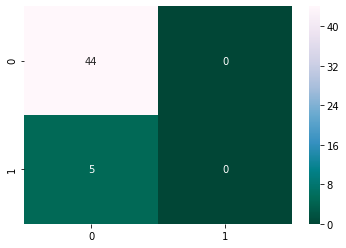

In [667]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_Log_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_Log_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [668]:
arr = []
for ind,value in enumerate(pred_Log_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

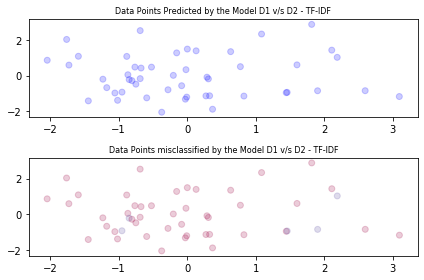

In [669]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Log_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - TF-IDF",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - GloVe </h3>

In [670]:
#implementing Logistic Regression - GloVe
classifier_Log_baseline_glove = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_Log_baseline_glove = classifier_Log_baseline_glove.predict(X_test_glove_scale)
pred_Log_baseline_glove

Accuracy KFold: 0.88 Accuracy RepeatedKFold: 2.59 Accuracy StratifiedKFold: 0.88
Recall KFold: 0.13 Recall RepeatedKFold: 0.34 Recall StratifiedKFold: 0.06
Precision KFold: 0.20 Precision RepeatedKFold: 0.63 Precision StratifiedKFold: 0.08


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0])

In [671]:
pred_SVM_baseline_glove_proba = classifier_Log_baseline_glove.predict_proba(X_test_glove_scale)
pred_SVM_baseline_glove_log_proba = classifier_Log_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_SVM_baseline_glove_proba,pred_SVM_baseline_glove_log_proba)

[[9.70107241e-01 2.98927589e-02]
 [9.99918606e-01 8.13935338e-05]
 [9.99992814e-01 7.18581891e-06]
 [9.52067084e-01 4.79329163e-02]
 [9.99991879e-01 8.12089695e-06]
 [9.99754668e-01 2.45332077e-04]
 [9.90034402e-01 9.96559791e-03]
 [9.14070573e-01 8.59294266e-02]
 [9.98220365e-01 1.77963509e-03]
 [9.97578983e-01 2.42101673e-03]
 [9.99999270e-01 7.30393812e-07]
 [9.99923644e-01 7.63555557e-05]
 [4.02090864e-01 5.97909136e-01]
 [9.92355838e-01 7.64416216e-03]
 [9.99149124e-01 8.50876366e-04]
 [9.99942155e-01 5.78454802e-05]
 [9.97696343e-01 2.30365689e-03]
 [9.99738236e-01 2.61764472e-04]
 [9.99972934e-01 2.70656639e-05]
 [9.96824636e-01 3.17536403e-03]
 [9.35920961e-01 6.40790391e-02]
 [9.98192301e-01 1.80769898e-03]
 [9.25435274e-02 9.07456473e-01]
 [1.81920715e-02 9.81807928e-01]
 [9.99803332e-01 1.96667923e-04]
 [9.99937081e-01 6.29193313e-05]
 [9.94736510e-01 5.26348976e-03]
 [9.52518319e-01 4.74816811e-02]
 [9.99460402e-01 5.39598419e-04]
 [9.88515088e-01 1.14849118e-02]
 [9.963799

Accuracy: 0.8571428571428571
f1 Score 0.571785268414482
confusion_matrix [[41  3]
 [ 4  1]]
precision_score 0.5805555555555555
recall_score 0.5659090909090909


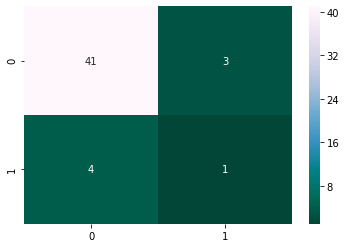

In [672]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_glove))
cm = confusion_matrix(Y_test, pred_Log_baseline_glove)
print("precision_score", precision_score(Y_test, pred_Log_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [673]:
arr = []
for ind,value in enumerate(pred_Log_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

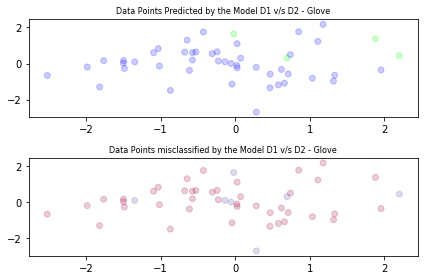

In [674]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - Glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - Glove",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - Word2Vec </h3>

In [675]:
#implementing Support Vector Machines - Glove
classifier_Log_baseline_word2vec = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_Log_baseline_word2vec = classifier_Log_baseline_word2vec.predict(X_test_word2vec_scale)
pred_Log_baseline_word2vec

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.68 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [676]:
pred_Log_baseline_word2vec_proba = classifier_Log_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_Log_baseline_word2vec_log_proba = classifier_Log_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_Log_baseline_word2vec_proba,pred_Log_baseline_word2vec_log_proba)

[[0.91381629 0.08618371]
 [0.9483186  0.0516814 ]
 [0.92861622 0.07138378]
 [0.82881555 0.17118445]
 [0.90641734 0.09358266]
 [0.74956167 0.25043833]
 [0.85995062 0.14004938]
 [0.90732202 0.09267798]
 [0.92512697 0.07487303]
 [0.9498705  0.0501295 ]
 [0.98315255 0.01684745]
 [0.8664449  0.1335551 ]
 [0.69515457 0.30484543]
 [0.93571298 0.06428702]
 [0.96425949 0.03574051]
 [0.96139484 0.03860516]
 [0.89699476 0.10300524]
 [0.94313768 0.05686232]
 [0.87746619 0.12253381]
 [0.93962921 0.06037079]
 [0.86764028 0.13235972]
 [0.81761107 0.18238893]
 [0.82473013 0.17526987]
 [0.82481254 0.17518746]
 [0.93376287 0.06623713]
 [0.95263078 0.04736922]
 [0.84337376 0.15662624]
 [0.79173529 0.20826471]
 [0.87641676 0.12358324]
 [0.80879882 0.19120118]
 [0.85002544 0.14997456]
 [0.90745842 0.09254158]
 [0.89071551 0.10928449]
 [0.85256457 0.14743543]
 [0.91134095 0.08865905]
 [0.90898542 0.09101458]
 [0.8892266  0.1107734 ]
 [0.96012094 0.03987906]
 [0.85254078 0.14745922]
 [0.87607579 0.12392421]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



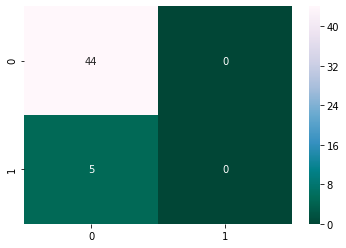

In [677]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_Log_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_Log_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [678]:
arr = []
for ind,value in enumerate(pred_Log_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)        

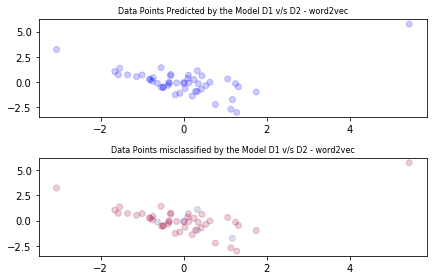

In [679]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h2> Over Sampling </h2>

In [680]:
#oversampling of the dataset to balance both the classes
#oversampling for Bag of Words
oversample1 = SMOTE(sampling_strategy='not majority', random_state=1)
X1, Y1 = oversample1.fit_resample(features_1, Y_train)

#oversampling for TF-IDF
oversample2 = SMOTE(sampling_strategy='not majority', random_state=1)
X2, Y2 = oversample2.fit_resample(features_2, Y_train)

#oversampling for Glove
oversample3 = SMOTE(sampling_strategy='not majority', random_state=1)
X3, Y3 = oversample3.fit_resample(X_train_glove_scale, Y_train)

#oversampling for word2vec
oversample4 = SMOTE(sampling_strategy='not majority', random_state=1)
X8, Y8 = oversample4.fit_resample(X_train_word2vec_scale, Y_train)

In [681]:
#function to calculate the distribution of classes
def label_count1(df):
    not_approved = 0
    approved = 0
    list5 = []
    for i in df:
        if i == 1:
            approved = approved + 1
        else:
            not_approved = not_approved + 1
    list5.append(not_approved)
    list5.append(approved)
    return list5

In [682]:
#calling the label count function
dataset_label_count_1 = label_count1(Y1)
dataset_label_count_1

[386, 386]

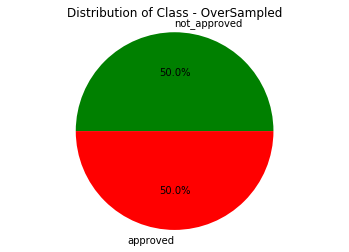

In [1016]:
#displaying the pie chart for distribution of classes
fig = plt.figure()
Sentiments_1 = ['not_approved', 'approved']
mycolors = ["g", "r"]
plt.pie(dataset_label_count_1,labels=Sentiments,autopct='%1.1f%%', colors = mycolors)
plt.title('Distribution of Class - OverSampled')
plt.axis('equal')
plt.show()

<p> From the above Pie chart, we have balanced the two classes by over sampling </p>
<p> <b>Not Approved:</b> 50% (386)
    <b>Approved:</b> 50% (386)</p>

<h3> Multinomial Naive Bayes - BoW (Over sampled) </h3>

In [684]:
#implementing Multinomial Naive Bayes - BoW
classifier_MNB_baseline_over_bow = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_tfidf, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_tfidf, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_tfidf, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_over_bow.fit(X1,Y1)
pred_MNB_baseline_over_bow = classifier_MNB_baseline_over_bow.predict(features_11)
pred_MNB_baseline_over_bow

/Users/j/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Accuracy KFold: 0.95 Accuracy RepeatedKFold: 2.85 Accuracy StratifiedKFold: 0.95
Recall KFold: 0.92 Recall RepeatedKFold: 2.74 Recall StratifiedKFold: 0.91
Precision KFold: 0.99 Precision RepeatedKFold: 2.96 Precision StratifiedKFold: 0.99


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [685]:
pred_MNB_baseline_over_bow_proba = classifier_MNB_baseline_over_bow.predict_proba(features_11)
pred_MNB_baseline_over_bow_log_proba = classifier_MNB_baseline_over_bow.predict_log_proba(features_11)
print(pred_MNB_baseline_over_bow_proba,pred_MNB_baseline_over_bow_log_proba)

[[1.00000000e+00 6.97038136e-54]
 [1.00000000e+00 2.65390528e-60]
 [1.00000000e+00 1.10261851e-12]
 [1.00000000e+00 9.78739960e-33]
 [1.00000000e+00 2.70108721e-35]
 [1.00000000e+00 1.43047594e-53]
 [1.00000000e+00 1.37875046e-32]
 [1.00000000e+00 6.20579760e-23]
 [1.00000000e+00 5.88966592e-36]
 [1.00000000e+00 1.05099176e-42]
 [1.00000000e+00 1.80009905e-37]
 [9.99999998e-01 2.36779908e-09]
 [1.00000000e+00 2.06369614e-37]
 [1.00000000e+00 2.11432109e-40]
 [1.00000000e+00 1.50207657e-34]
 [1.00000000e+00 9.26668520e-51]
 [1.00000000e+00 4.59799015e-42]
 [1.00000000e+00 1.71101526e-29]
 [1.00000000e+00 1.46936582e-24]
 [1.00000000e+00 1.27229400e-50]
 [1.00000000e+00 4.45531308e-26]
 [1.00000000e+00 2.53791747e-38]
 [9.99900469e-01 9.95308803e-05]
 [1.00000000e+00 1.27351495e-28]
 [1.00000000e+00 2.02562368e-57]
 [1.00000000e+00 7.33132003e-31]
 [1.00000000e+00 7.99267245e-25]
 [1.00000000e+00 2.25801088e-32]
 [1.00000000e+00 2.59923520e-26]
 [1.00000000e+00 1.07874851e-22]
 [1.000000

Accuracy: 0.8775510204081632
f1 Score 0.4673913043478261
confusion_matrix [[43  1]
 [ 5  0]]
precision_score 0.4479166666666667
recall_score 0.48863636363636365


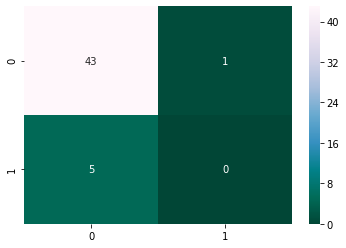

In [686]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_over_bow))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_over_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_over_bow))
cm = confusion_matrix(Y_test, pred_MNB_baseline_over_bow)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_over_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_over_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [687]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_over_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

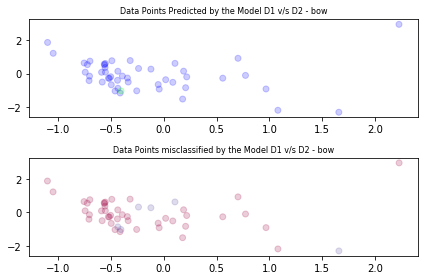

In [688]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_MNB_baseline_over_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Multinomial Naive Bayes - TF-IDF (Over sampled) </h3>

In [689]:
#implementing Multinomial Naive Bayes - TF-IDF
classifier_MNB_baseline_over_tfidf = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_over_tfidf.fit(X2,Y2)
pred_MNB_baseline_over_tfidf = classifier_MNB_baseline_over_tfidf.predict(features_22)
pred_MNB_baseline_over_tfidf

Accuracy KFold: 0.73 Accuracy RepeatedKFold: 2.19 Accuracy StratifiedKFold: 0.73
Recall KFold: 0.75 Recall RepeatedKFold: 2.29 Recall StratifiedKFold: 0.76
Precision KFold: 0.71 Precision RepeatedKFold: 2.15 Precision StratifiedKFold: 0.72


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1])

In [690]:
pred_MNB_baseline_over_tfidf_proba = classifier_MNB_baseline_over_tfidf.predict_proba(features_22)
pred_MNB_baseline_over_tfidf_log_proba = classifier_MNB_baseline_over_tfidf.predict_log_proba(features_22)
print(pred_MNB_baseline_over_tfidf_proba,pred_MNB_baseline_over_tfidf_log_proba)

[[0.94023896 0.05976104]
 [0.64767847 0.35232153]
 [0.4632149  0.5367851 ]
 [0.79762434 0.20237566]
 [0.69324614 0.30675386]
 [0.6160841  0.3839159 ]
 [0.80458422 0.19541578]
 [0.72716272 0.27283728]
 [0.59748474 0.40251526]
 [0.86613427 0.13386573]
 [0.5298835  0.4701165 ]
 [0.63031952 0.36968048]
 [0.67432006 0.32567994]
 [0.60758074 0.39241926]
 [0.9834333  0.0165667 ]
 [0.58655492 0.41344508]
 [0.67062319 0.32937681]
 [0.76544583 0.23455417]
 [0.46847782 0.53152218]
 [0.7742338  0.2257662 ]
 [0.80265518 0.19734482]
 [0.55511608 0.44488392]
 [0.70359198 0.29640802]
 [0.42489312 0.57510688]
 [0.66152881 0.33847119]
 [0.50086483 0.49913517]
 [0.68210209 0.31789791]
 [0.71441427 0.28558573]
 [0.57894543 0.42105457]
 [0.68790907 0.31209093]
 [0.6516299  0.3483701 ]
 [0.42881691 0.57118309]
 [0.22733535 0.77266465]
 [0.37700696 0.62299304]
 [0.27813884 0.72186116]
 [0.71667274 0.28332726]
 [0.53631501 0.46368499]
 [0.67780894 0.32219106]
 [0.64708801 0.35291199]
 [0.64112552 0.35887448]


Accuracy: 0.8163265306122449
f1 Score 0.6457831325301204
confusion_matrix [[37  7]
 [ 2  3]]
precision_score 0.6243589743589744
recall_score 0.7204545454545455


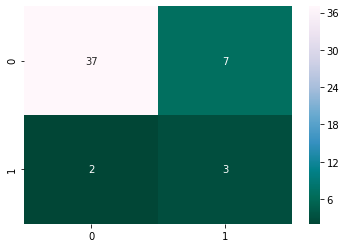

In [691]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_over_tfidf))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_over_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_over_tfidf))
cm = confusion_matrix(Y_test, pred_MNB_baseline_over_tfidf)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_over_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_over_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [692]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_over_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

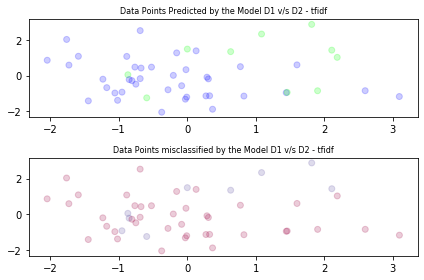

In [693]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_MNB_baseline_over_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - BoW (Over sampled) </h3>

In [694]:
#implementing Random Forest - BoW
classifier_RF_baseline_over_bow = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_over_bow.fit(X1,Y1)
pred_RF_baseline_over_bow = classifier_RF_baseline_over_bow.predict(features_11)
pred_RF_baseline_over_bow

Accuracy KFold: 0.94 Accuracy RepeatedKFold: 2.83 Accuracy StratifiedKFold: 0.94
Recall KFold: 0.90 Recall RepeatedKFold: 2.69 Recall StratifiedKFold: 0.90
Precision KFold: 0.99 Precision RepeatedKFold: 2.98 Precision StratifiedKFold: 0.99


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [695]:
pred_RF_baseline_over_bow_proba = classifier_RF_baseline_over_bow.predict_proba(features_11)
pred_RF_baseline_over_bow_log_proba = classifier_RF_baseline_over_bow.predict_log_proba(features_11)
print(pred_RF_baseline_over_bow_proba,pred_RF_baseline_over_bow_log_proba)

[[0.73 0.27]
 [0.87 0.13]
 [0.79 0.21]
 [0.85 0.15]
 [0.86 0.14]
 [0.91 0.09]
 [0.81 0.19]
 [0.75 0.25]
 [0.86 0.14]
 [0.84 0.16]
 [0.83 0.17]
 [0.84 0.16]
 [0.77 0.23]
 [0.89 0.11]
 [0.83 0.17]
 [0.92 0.08]
 [0.86 0.14]
 [0.91 0.09]
 [0.86 0.14]
 [0.85 0.15]
 [0.86 0.14]
 [0.87 0.13]
 [0.52 0.48]
 [0.83 0.17]
 [0.91 0.09]
 [0.69 0.31]
 [0.88 0.12]
 [0.79 0.21]
 [0.75 0.25]
 [0.75 0.25]
 [0.83 0.17]
 [0.87 0.13]
 [0.64 0.36]
 [0.78 0.22]
 [0.89 0.11]
 [0.86 0.14]
 [0.78 0.22]
 [0.84 0.16]
 [0.75 0.25]
 [0.87 0.13]
 [0.79 0.21]
 [0.86 0.14]
 [0.78 0.22]
 [0.57 0.43]
 [0.84 0.16]
 [0.87 0.13]
 [0.88 0.12]
 [0.87 0.13]
 [0.79 0.21]] [[-0.31471074 -1.30933332]
 [-0.13926207 -2.04022083]
 [-0.23572233 -1.56064775]
 [-0.16251893 -1.89711998]
 [-0.15082289 -1.96611286]
 [-0.09431068 -2.40794561]
 [-0.21072103 -1.66073121]
 [-0.28768207 -1.38629436]
 [-0.15082289 -1.96611286]
 [-0.17435339 -1.83258146]
 [-0.18632958 -1.77195684]
 [-0.17435339 -1.83258146]
 [-0.26136476 -1.46967597]
 [-0.116533

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



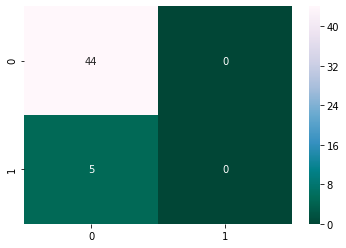

In [696]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_over_bow))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_over_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_over_bow))
cm = confusion_matrix(Y_test, pred_RF_baseline_over_bow)
print("precision_score", precision_score(Y_test, pred_RF_baseline_over_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_over_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [697]:
arr = []
for ind,value in enumerate(pred_RF_baseline_over_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)  

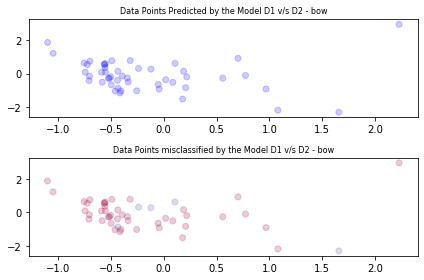

In [698]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_RF_baseline_over_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - TF-IDF (Over sampled) </h3>

In [699]:
#implementing Random Forest - TF-IDF
classifier_RF_baseline_over_tfidf = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_over_tfidf.fit(X2,Y2)
pred_RF_baseline_over_tfidf = classifier_RF_baseline_over_tfidf.predict(features_22)
pred_RF_baseline_over_tfidf

Accuracy KFold: 0.96 Accuracy RepeatedKFold: 2.90 Accuracy StratifiedKFold: 0.97
Recall KFold: 0.94 Recall RepeatedKFold: 2.84 Recall StratifiedKFold: 0.95
Precision KFold: 0.98 Precision RepeatedKFold: 2.96 Precision StratifiedKFold: 0.99


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [700]:
pred_RF_baseline_over_tfidf_proba = classifier_RF_baseline_over_tfidf.predict_proba(features_22)
pred_RF_baseline_over_tfidf_log_proba = classifier_RF_baseline_over_tfidf.predict_log_proba(features_22)
print(pred_RF_baseline_over_tfidf_proba,pred_RF_baseline_over_tfidf_log_proba)

[[0.84 0.16]
 [0.91 0.09]
 [0.79 0.21]
 [0.83 0.17]
 [0.82 0.18]
 [0.73 0.27]
 [0.93 0.07]
 [0.93 0.07]
 [0.71 0.29]
 [0.85 0.15]
 [0.85 0.15]
 [0.83 0.17]
 [0.78 0.22]
 [0.79 0.21]
 [0.95 0.05]
 [0.64 0.36]
 [0.88 0.12]
 [0.77 0.23]
 [0.76 0.24]
 [0.91 0.09]
 [0.9  0.1 ]
 [0.85 0.15]
 [0.9  0.1 ]
 [0.79 0.21]
 [0.9  0.1 ]
 [0.86 0.14]
 [0.71 0.29]
 [0.82 0.18]
 [0.95 0.05]
 [0.93 0.07]
 [0.76 0.24]
 [0.78 0.22]
 [0.81 0.19]
 [0.79 0.21]
 [0.54 0.46]
 [0.95 0.05]
 [0.95 0.05]
 [0.86 0.14]
 [0.89 0.11]
 [0.6  0.4 ]
 [0.91 0.09]
 [0.87 0.13]
 [0.94 0.06]
 [0.66 0.34]
 [0.62 0.38]
 [0.68 0.32]
 [0.74 0.26]
 [0.95 0.05]
 [0.84 0.16]] [[-0.17435339 -1.83258146]
 [-0.09431068 -2.40794561]
 [-0.23572233 -1.56064775]
 [-0.18632958 -1.77195684]
 [-0.19845094 -1.71479843]
 [-0.31471074 -1.30933332]
 [-0.07257069 -2.65926004]
 [-0.07257069 -2.65926004]
 [-0.34249031 -1.23787436]
 [-0.16251893 -1.89711998]
 [-0.16251893 -1.89711998]
 [-0.18632958 -1.77195684]
 [-0.24846136 -1.51412773]
 [-0.235722

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



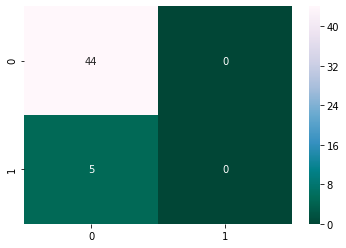

In [701]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_over_tfidf))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_over_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_over_tfidf))
cm = confusion_matrix(Y_test, pred_RF_baseline_over_tfidf)
print("precision_score", precision_score(Y_test, pred_RF_baseline_over_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_over_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [702]:
arr = []
for ind,value in enumerate(pred_RF_baseline_over_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

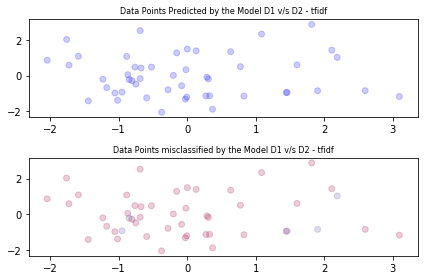

In [703]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_RF_baseline_over_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - GloVe (Over sampled) </h3>

In [704]:
#implementing Random Forest - Glove
classifier_RF_baseline_over_glove = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_over_glove.fit(X3,Y3)
pred_RF_baseline_over_glove = classifier_RF_baseline_over_glove.predict(X_test_glove_scale)
pred_RF_baseline_over_glove

Accuracy KFold: 0.99 Accuracy RepeatedKFold: 2.97 Accuracy StratifiedKFold: 0.99
Recall KFold: 0.99 Recall RepeatedKFold: 2.95 Recall StratifiedKFold: 0.99
Precision KFold: 0.99 Precision RepeatedKFold: 2.98 Precision StratifiedKFold: 1.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [705]:
pred_RF_baseline_over_glove_proba = classifier_RF_baseline_over_glove.predict_proba(X_test_glove_scale)
pred_RF_baseline_over_glove_log_proba = classifier_RF_baseline_over_glove.predict_log_proba(X_test_glove_scale)
print(pred_RF_baseline_over_glove_proba,pred_RF_baseline_over_glove_log_proba)

[[0.75 0.25]
 [0.89 0.11]
 [0.88 0.12]
 [0.68 0.32]
 [0.8  0.2 ]
 [0.68 0.32]
 [0.69 0.31]
 [0.81 0.19]
 [0.77 0.23]
 [0.82 0.18]
 [0.92 0.08]
 [0.72 0.28]
 [0.7  0.3 ]
 [0.79 0.21]
 [0.75 0.25]
 [0.86 0.14]
 [0.85 0.15]
 [0.75 0.25]
 [0.81 0.19]
 [0.87 0.13]
 [0.64 0.36]
 [0.84 0.16]
 [0.75 0.25]
 [0.67 0.33]
 [0.88 0.12]
 [0.79 0.21]
 [0.7  0.3 ]
 [0.74 0.26]
 [0.76 0.24]
 [0.81 0.19]
 [0.82 0.18]
 [0.8  0.2 ]
 [0.82 0.18]
 [0.74 0.26]
 [0.8  0.2 ]
 [0.83 0.17]
 [0.74 0.26]
 [0.89 0.11]
 [0.71 0.29]
 [0.84 0.16]
 [0.81 0.19]
 [0.81 0.19]
 [0.78 0.22]
 [0.74 0.26]
 [0.85 0.15]
 [0.82 0.18]
 [0.93 0.07]
 [0.76 0.24]
 [0.87 0.13]] [[-0.28768207 -1.38629436]
 [-0.11653382 -2.20727491]
 [-0.12783337 -2.12026354]
 [-0.38566248 -1.13943428]
 [-0.22314355 -1.60943791]
 [-0.38566248 -1.13943428]
 [-0.37106368 -1.17118298]
 [-0.21072103 -1.66073121]
 [-0.26136476 -1.46967597]
 [-0.19845094 -1.71479843]
 [-0.08338161 -2.52572864]
 [-0.32850407 -1.27296568]
 [-0.35667494 -1.2039728 ]
 [-0.235722

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



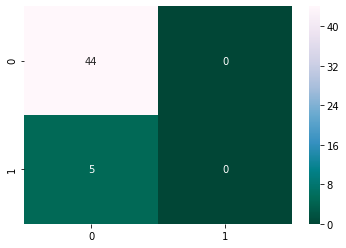

In [706]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_over_glove))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_over_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_over_glove))
cm = confusion_matrix(Y_test, pred_RF_baseline_over_glove)
print("precision_score", precision_score(Y_test, pred_RF_baseline_over_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_over_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [707]:
arr = []
for ind,value in enumerate(pred_RF_baseline_over_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

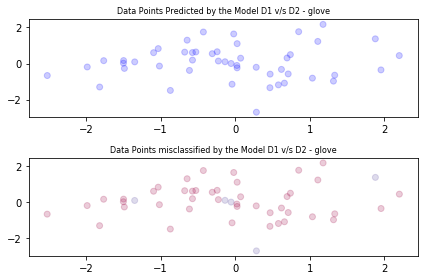

In [708]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_over_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - word2vec (Over sampled) </h3>

In [709]:
#implementing Random Forest - word2vec
classifier_RF_baseline_over_word2vec = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_over_word2vec.fit(X8,Y8)
pred_RF_baseline_over_word2vec = classifier_RF_baseline_over_word2vec.predict(X_test_word2vec_scale)
pred_RF_baseline_over_word2vec

Accuracy KFold: 0.99 Accuracy RepeatedKFold: 2.97 Accuracy StratifiedKFold: 0.99
Recall KFold: 0.98 Recall RepeatedKFold: 2.95 Recall StratifiedKFold: 0.98
Precision KFold: 1.00 Precision RepeatedKFold: 3.00 Precision StratifiedKFold: 1.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [710]:
pred_RF_baseline_over_word2vec_proba = classifier_RF_baseline_over_word2vec.predict_proba(X_test_word2vec_scale)
pred_RF_baseline_over_word2vec_log_proba = classifier_RF_baseline_over_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_RF_baseline_over_word2vec_proba,pred_RF_baseline_over_word2vec_log_proba)

[[0.65 0.35]
 [0.81 0.19]
 [0.95 0.05]
 [0.7  0.3 ]
 [0.78 0.22]
 [0.69 0.31]
 [0.71 0.29]
 [0.78 0.22]
 [0.72 0.28]
 [0.8  0.2 ]
 [0.9  0.1 ]
 [0.8  0.2 ]
 [0.73 0.27]
 [0.8  0.2 ]
 [0.78 0.22]
 [0.85 0.15]
 [0.78 0.22]
 [0.87 0.13]
 [0.77 0.23]
 [0.9  0.1 ]
 [0.68 0.32]
 [0.77 0.23]
 [0.84 0.16]
 [0.76 0.24]
 [0.9  0.1 ]
 [0.82 0.18]
 [0.7  0.3 ]
 [0.74 0.26]
 [0.79 0.21]
 [0.8  0.2 ]
 [0.77 0.23]
 [0.78 0.22]
 [0.76 0.24]
 [0.8  0.2 ]
 [0.71 0.29]
 [0.85 0.15]
 [0.75 0.25]
 [0.88 0.12]
 [0.63 0.37]
 [0.74 0.26]
 [0.85 0.15]
 [0.85 0.15]
 [0.79 0.21]
 [0.81 0.19]
 [0.75 0.25]
 [0.85 0.15]
 [0.96 0.04]
 [0.88 0.12]
 [0.73 0.27]] [[-0.43078292 -1.04982212]
 [-0.21072103 -1.66073121]
 [-0.05129329 -2.99573227]
 [-0.35667494 -1.2039728 ]
 [-0.24846136 -1.51412773]
 [-0.37106368 -1.17118298]
 [-0.34249031 -1.23787436]
 [-0.24846136 -1.51412773]
 [-0.32850407 -1.27296568]
 [-0.22314355 -1.60943791]
 [-0.10536052 -2.30258509]
 [-0.22314355 -1.60943791]
 [-0.31471074 -1.30933332]
 [-0.223143

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



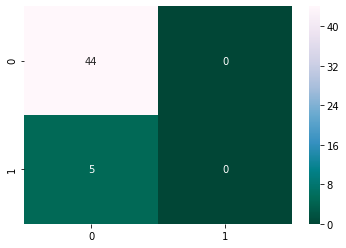

In [711]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_over_word2vec))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_over_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_over_word2vec))
cm = confusion_matrix(Y_test, pred_RF_baseline_over_word2vec)
print("precision_score", precision_score(Y_test, pred_RF_baseline_over_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_over_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [712]:
arr = []
for ind,value in enumerate(pred_RF_baseline_over_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

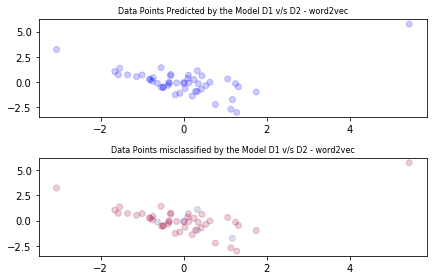

In [713]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_over_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> SVM - BoW (Over sampled) </h3>

In [714]:
#implementing SVM - BoW
classifier_SVM_baseline_over_bow = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_over_bow.fit(X1,Y1)
pred_SVM_baseline_over_bow = classifier_SVM_baseline_over_bow.predict(features_11)
pred_SVM_baseline_over_bow

Accuracy KFold: 0.96 Accuracy RepeatedKFold: 2.86 Accuracy StratifiedKFold: 0.95
Recall KFold: 0.94 Recall RepeatedKFold: 2.80 Recall StratifiedKFold: 0.94
Precision KFold: 0.98 Precision RepeatedKFold: 2.92 Precision StratifiedKFold: 0.97


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [715]:
pred_SVM_baseline_over_bow_proba = classifier_SVM_baseline_over_bow.predict_proba(features_11)
pred_SVM_baseline_over_bow_log_proba = classifier_SVM_baseline_over_bow.predict_log_proba(features_11)
print(pred_SVM_baseline_over_bow_proba,pred_SVM_baseline_over_bow_log_proba)

[[0.99633321 0.00366679]
 [0.99514023 0.00485977]
 [0.9773794  0.0226206 ]
 [0.9878932  0.0121068 ]
 [0.98147656 0.01852344]
 [0.99842713 0.00157287]
 [0.98623999 0.01376001]
 [0.96980662 0.03019338]
 [0.99140699 0.00859301]
 [0.98815353 0.01184647]
 [0.99285423 0.00714577]
 [0.85277225 0.14722775]
 [0.98682674 0.01317326]
 [0.98635145 0.01364855]
 [0.98808175 0.01191825]
 [0.99301877 0.00698123]
 [0.98220144 0.01779856]
 [0.98424536 0.01575464]
 [0.98207639 0.01792361]
 [0.9909483  0.0090517 ]
 [0.9694642  0.0305358 ]
 [0.99246128 0.00753872]
 [0.62667404 0.37332596]
 [0.9581894  0.0418106 ]
 [0.99591958 0.00408042]
 [0.95223462 0.04776538]
 [0.97434939 0.02565061]
 [0.98857608 0.01142392]
 [0.99143298 0.00856702]
 [0.86177931 0.13822069]
 [0.97558718 0.02441282]
 [0.97109887 0.02890113]
 [0.91993101 0.08006899]
 [0.97858405 0.02141595]
 [0.96705352 0.03294648]
 [0.99814068 0.00185932]
 [0.98096215 0.01903785]
 [0.99397698 0.00602302]
 [0.98551857 0.01448143]
 [0.99009551 0.00990449]


Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



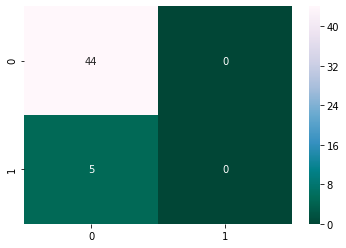

In [716]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_over_bow))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_over_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_over_bow))
cm = confusion_matrix(Y_test, pred_SVM_baseline_over_bow)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_over_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_over_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [717]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_over_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

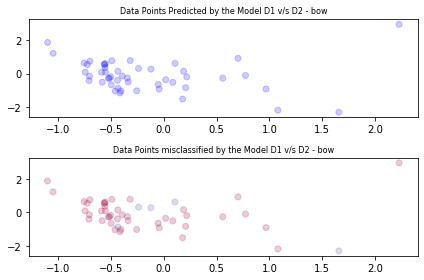

In [718]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_SVM_baseline_over_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> SVM - TF-IDF (Over sampled) </h3>

In [719]:
#implementing SVM - TF-IDF
classifier_SVM_baseline_over_tfidf = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_over_tfidf.fit(X2,Y2)
pred_SVM_baseline_over_tfidf = classifier_SVM_baseline_over_tfidf.predict(features_22)
pred_SVM_baseline_over_tfidf

Accuracy KFold: 0.99 Accuracy RepeatedKFold: 2.95 Accuracy StratifiedKFold: 0.98
Recall KFold: 0.99 Recall RepeatedKFold: 2.96 Recall StratifiedKFold: 0.99
Precision KFold: 0.98 Precision RepeatedKFold: 2.94 Precision StratifiedKFold: 0.98


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [720]:
pred_SVM_baseline_over_tfidf_proba = classifier_SVM_baseline_over_tfidf.predict_proba(features_22)
pred_SVM_baseline_over_tfidf_log_proba = classifier_SVM_baseline_over_tfidf.predict_log_proba(features_22)
print(pred_SVM_baseline_over_tfidf_proba,pred_SVM_baseline_over_tfidf_log_proba)

[[9.99960513e-01 3.94867450e-05]
 [9.97555592e-01 2.44440819e-03]
 [9.99193957e-01 8.06042744e-04]
 [9.98886546e-01 1.11345352e-03]
 [9.99904925e-01 9.50748477e-05]
 [9.97584271e-01 2.41572905e-03]
 [9.99980564e-01 1.94356461e-05]
 [9.99119163e-01 8.80836664e-04]
 [9.97226900e-01 2.77310048e-03]
 [9.99989657e-01 1.03425809e-05]
 [9.99705000e-01 2.94999852e-04]
 [9.99674851e-01 3.25148951e-04]
 [9.99594688e-01 4.05312061e-04]
 [9.99542127e-01 4.57872850e-04]
 [9.99938132e-01 6.18684253e-05]
 [9.93779959e-01 6.22004138e-03]
 [9.97928082e-01 2.07191808e-03]
 [9.98705507e-01 1.29449273e-03]
 [9.94403739e-01 5.59626101e-03]
 [9.99813622e-01 1.86378014e-04]
 [9.99998042e-01 1.95827109e-06]
 [9.92756076e-01 7.24392439e-03]
 [9.99956030e-01 4.39703664e-05]
 [9.62107226e-01 3.78927743e-02]
 [9.98400262e-01 1.59973844e-03]
 [9.99680726e-01 3.19273993e-04]
 [9.99749935e-01 2.50064809e-04]
 [9.99746545e-01 2.53455000e-04]
 [9.99709306e-01 2.90693874e-04]
 [9.99942888e-01 5.71120415e-05]
 [9.993414

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



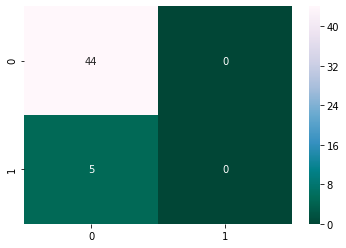

In [721]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_over_tfidf))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_over_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_over_tfidf))
cm = confusion_matrix(Y_test, pred_SVM_baseline_over_tfidf)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_over_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_over_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [722]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_over_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

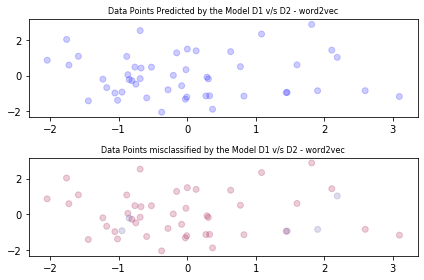

In [723]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_SVM_baseline_over_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> SVM - GloVe (Over sampled) </h3>

In [724]:
#implementing SVM - Glove
classifier_SVM_baseline_over_glove = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_over_glove.fit(X3,Y3)
pred_SVM_baseline_over_glove = classifier_SVM_baseline_over_glove.predict(X_test_glove_scale)
pred_SVM_baseline_over_glove

Accuracy KFold: 1.00 Accuracy RepeatedKFold: 2.99 Accuracy StratifiedKFold: 1.00
Recall KFold: 0.99 Recall RepeatedKFold: 2.99 Recall StratifiedKFold: 1.00
Precision KFold: 1.00 Precision RepeatedKFold: 3.00 Precision StratifiedKFold: 1.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [725]:
pred_SVM_baseline_over_glove_proba = classifier_SVM_baseline_over_glove.predict_proba(X_test_glove_scale)
pred_SVM_baseline_over_glove_log_proba = classifier_SVM_baseline_over_glove.predict_log_proba(X_test_glove_scale)
print(pred_SVM_baseline_over_glove_proba,pred_SVM_baseline_over_glove_log_proba)

[[9.86134024e-01 1.38659757e-02]
 [9.99519550e-01 4.80450354e-04]
 [9.99555989e-01 4.44010808e-04]
 [9.91761026e-01 8.23897362e-03]
 [9.99502784e-01 4.97216379e-04]
 [9.95773463e-01 4.22653718e-03]
 [9.97243847e-01 2.75615321e-03]
 [9.98891222e-01 1.10877847e-03]
 [9.97971184e-01 2.02881586e-03]
 [9.98241470e-01 1.75852953e-03]
 [9.99918138e-01 8.18621440e-05]
 [9.99330909e-01 6.69091061e-04]
 [9.89402163e-01 1.05978369e-02]
 [9.95185256e-01 4.81474422e-03]
 [9.95539744e-01 4.46025599e-03]
 [9.99078571e-01 9.21428848e-04]
 [9.97052557e-01 2.94744323e-03]
 [9.97634335e-01 2.36566493e-03]
 [9.98610718e-01 1.38928183e-03]
 [9.98565383e-01 1.43461688e-03]
 [9.55081929e-01 4.49180713e-02]
 [9.97913698e-01 2.08630165e-03]
 [9.94234779e-01 5.76522124e-03]
 [9.45544725e-01 5.44552753e-02]
 [9.99260223e-01 7.39776568e-04]
 [9.99418788e-01 5.81211930e-04]
 [9.96714215e-01 3.28578469e-03]
 [9.86407315e-01 1.35926852e-02]
 [9.98058466e-01 1.94153381e-03]
 [9.97546284e-01 2.45371561e-03]
 [9.942219

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



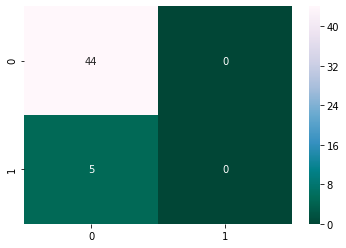

In [726]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_over_glove))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_over_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_over_glove))
cm = confusion_matrix(Y_test, pred_SVM_baseline_over_glove)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_over_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_over_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [727]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_over_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

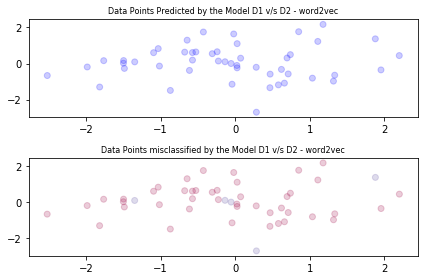

In [728]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_over_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> SVM - word2vec (Over sampled) </h3>

In [729]:
#implementing SVM - Glove
classifier_SVM_baseline_over_word2vec = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_over_word2vec.fit(X8,Y8)
pred_SVM_baseline_over_word2vec = classifier_SVM_baseline_over_word2vec.predict(X_test_word2vec_scale)
pred_SVM_baseline_over_word2vec

Accuracy KFold: 1.00 Accuracy RepeatedKFold: 2.99 Accuracy StratifiedKFold: 1.00
Recall KFold: 1.00 Recall RepeatedKFold: 2.97 Recall StratifiedKFold: 1.00
Precision KFold: 1.00 Precision RepeatedKFold: 3.00 Precision StratifiedKFold: 1.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [730]:
pred_SVM_baseline_over_word2vec_proba = classifier_SVM_baseline_over_word2vec.predict_proba(X_test_word2vec_scale)
pred_SVM_baseline_over_word2vec_log_proba = classifier_SVM_baseline_over_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_SVM_baseline_over_word2vec_proba,pred_SVM_baseline_over_word2vec_log_proba)

[[9.90117360e-01 9.88264021e-03]
 [9.99133484e-01 8.66516442e-04]
 [9.98004345e-01 1.99565487e-03]
 [9.84420374e-01 1.55796259e-02]
 [9.98237936e-01 1.76206384e-03]
 [9.34151926e-01 6.58480740e-02]
 [9.94897296e-01 5.10270370e-03]
 [9.95878785e-01 4.12121458e-03]
 [9.97962736e-01 2.03726358e-03]
 [9.99074425e-01 9.25575073e-04]
 [9.99912589e-01 8.74113632e-05]
 [9.98997694e-01 1.00230578e-03]
 [9.57336170e-01 4.26638298e-02]
 [9.97730077e-01 2.26992250e-03]
 [9.99144360e-01 8.55640051e-04]
 [9.99529960e-01 4.70039822e-04]
 [9.90207834e-01 9.79216584e-03]
 [9.98632984e-01 1.36701619e-03]
 [9.93763096e-01 6.23690381e-03]
 [9.96185902e-01 3.81409781e-03]
 [9.83806828e-01 1.61931724e-02]
 [9.86763644e-01 1.32363558e-02]
 [9.94234991e-01 5.76500920e-03]
 [9.90790758e-01 9.20924158e-03]
 [9.97657044e-01 2.34295648e-03]
 [9.99465367e-01 5.34633038e-04]
 [9.93335241e-01 6.66475898e-03]
 [9.79283500e-01 2.07165003e-02]
 [9.94240329e-01 5.75967101e-03]
 [9.86317997e-01 1.36820034e-02]
 [9.915577

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



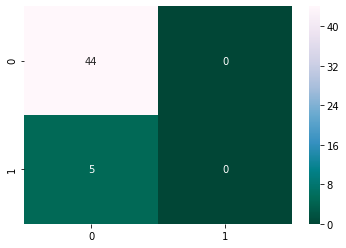

In [731]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_over_word2vec))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_over_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_over_word2vec))
cm = confusion_matrix(Y_test, pred_SVM_baseline_over_word2vec)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_over_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_over_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [732]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_over_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

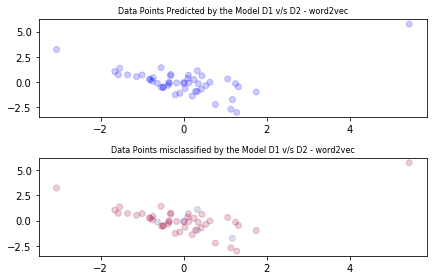

In [733]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_over_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - BoW (Over sampled) </h3>

In [734]:
#implementing Logistic Regression - BoW
classifier_Log_baseline_over_bow = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_over_bow, X1, Y1, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_over_bow.fit(X1,Y1)
pred_Log_baseline_over_bow = classifier_Log_baseline_over_bow.predict(features_11)
pred_Log_baseline_over_bow

Accuracy KFold: 0.94 Accuracy RepeatedKFold: 2.82 Accuracy StratifiedKFold: 0.94
Recall KFold: 0.95 Recall RepeatedKFold: 2.82 Recall StratifiedKFold: 0.95
Precision KFold: 0.94 Precision RepeatedKFold: 2.81 Precision StratifiedKFold: 0.94


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [735]:
pred_Log_baseline_over_bow_proba = classifier_Log_baseline_over_bow.predict_proba(features_11)
pred_Log_baseline_over_bow_log_proba = classifier_Log_baseline_over_bow.predict_log_proba(features_11)
print(pred_Log_baseline_over_bow_proba,pred_Log_baseline_over_bow_log_proba)

[[9.99994352e-01 5.64758448e-06]
 [9.99990470e-01 9.52961575e-06]
 [9.90919499e-01 9.08050116e-03]
 [9.99189749e-01 8.10250867e-04]
 [9.99113223e-01 8.86777441e-04]
 [9.99993713e-01 6.28720751e-06]
 [9.99407938e-01 5.92062273e-04]
 [9.90947137e-01 9.05286269e-03]
 [9.96188324e-01 3.81167634e-03]
 [9.46721236e-01 5.32787640e-02]
 [9.99531225e-01 4.68775024e-04]
 [8.43169624e-01 1.56830376e-01]
 [9.95780196e-01 4.21980375e-03]
 [9.99448658e-01 5.51341548e-04]
 [9.98168170e-01 1.83182973e-03]
 [9.99940434e-01 5.95662942e-05]
 [9.98867980e-01 1.13201998e-03]
 [9.82069976e-01 1.79300241e-02]
 [9.99773116e-01 2.26883698e-04]
 [9.98497480e-01 1.50251984e-03]
 [9.83300020e-01 1.66999800e-02]
 [9.99632010e-01 3.67989711e-04]
 [3.65584675e-01 6.34415325e-01]
 [9.72105097e-01 2.78949030e-02]
 [9.99999451e-01 5.48905052e-07]
 [7.64301944e-01 2.35698056e-01]
 [9.27867440e-01 7.21325604e-02]
 [9.96987747e-01 3.01225304e-03]
 [9.99536386e-01 4.63613647e-04]
 [9.04509285e-01 9.54907148e-02]
 [9.991919

Accuracy: 0.8571428571428571
f1 Score 0.46153846153846156
confusion_matrix [[42  2]
 [ 5  0]]
precision_score 0.44680851063829785
recall_score 0.4772727272727273


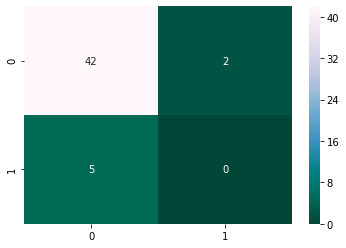

In [736]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_over_bow))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_over_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_over_bow))
cm = confusion_matrix(Y_test, pred_Log_baseline_over_bow)
print("precision_score", precision_score(Y_test, pred_Log_baseline_over_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_over_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [737]:
arr = []
for ind,value in enumerate(pred_Log_baseline_over_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

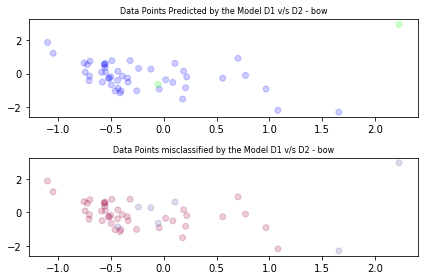

In [738]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Log_baseline_over_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - TF-IDF (Over sampled) </h3>

In [739]:
#implementing Logistic Regression - TF-IDF
classifier_Log_baseline_over_tfidf = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_over_tfidf, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_over_tfidf.fit(X2,Y2)
pred_Log_baseline_over_tfidf = classifier_Log_baseline_over_tfidf.predict(features_22)
pred_Log_baseline_over_tfidf

Accuracy KFold: 0.78 Accuracy RepeatedKFold: 2.30 Accuracy StratifiedKFold: 0.77
Recall KFold: 0.84 Recall RepeatedKFold: 2.46 Recall StratifiedKFold: 0.81
Precision KFold: 0.75 Precision RepeatedKFold: 2.23 Precision StratifiedKFold: 0.75


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

In [740]:
pred_Log_baseline_over_tfidf_proba = classifier_Log_baseline_over_tfidf.predict_proba(features_22)
pred_Log_baseline_over_tfidf_log_proba = classifier_Log_baseline_over_tfidf.predict_log_proba(features_22)
print(pred_Log_baseline_over_tfidf_proba,pred_Log_baseline_over_tfidf_log_proba)

[[0.95701482 0.04298518]
 [0.80972837 0.19027163]
 [0.7590871  0.2409129 ]
 [0.62273209 0.37726791]
 [0.933047   0.066953  ]
 [0.6166703  0.3833297 ]
 [0.96578048 0.03421952]
 [0.53590699 0.46409301]
 [0.85372813 0.14627187]
 [0.98529305 0.01470695]
 [0.90023064 0.09976936]
 [0.89277558 0.10722442]
 [0.83989782 0.16010218]
 [0.74456341 0.25543659]
 [0.97037698 0.02962302]
 [0.66011617 0.33988383]
 [0.7754028  0.2245972 ]
 [0.79897563 0.20102437]
 [0.36547958 0.63452042]
 [0.95400675 0.04599325]
 [0.99385411 0.00614589]
 [0.74677063 0.25322937]
 [0.94866804 0.05133196]
 [0.2500323  0.7499677 ]
 [0.68823582 0.31176418]
 [0.3451786  0.6548214 ]
 [0.76100999 0.23899001]
 [0.93554279 0.06445721]
 [0.89667533 0.10332467]
 [0.98119397 0.01880603]
 [0.7927557  0.2072443 ]
 [0.58561559 0.41438441]
 [0.38475318 0.61524682]
 [0.88883382 0.11116618]
 [0.10031765 0.89968235]
 [0.9293466  0.0706534 ]
 [0.69435796 0.30564204]
 [0.97698036 0.02301964]
 [0.7226599  0.2773401 ]
 [0.79994416 0.20005584]


Accuracy: 0.8571428571428571
f1 Score 0.6415882967607105
confusion_matrix [[40  4]
 [ 3  2]]
precision_score 0.6317829457364341
recall_score 0.6545454545454545


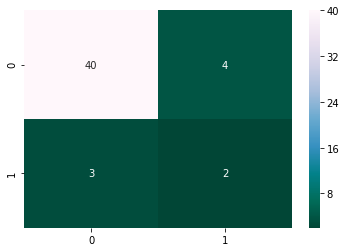

In [741]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_over_tfidf))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_over_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_over_tfidf))
cm = confusion_matrix(Y_test, pred_Log_baseline_over_tfidf)
print("precision_score", precision_score(Y_test, pred_Log_baseline_over_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_over_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [742]:
arr = []
for ind,value in enumerate(pred_Log_baseline_over_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

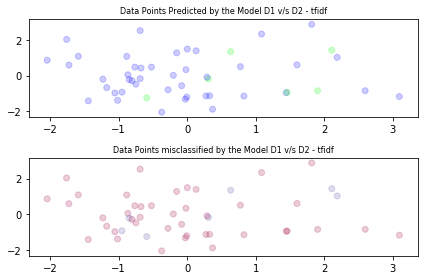

In [743]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Log_baseline_over_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - GloVe (Over sampled) </h3>

In [744]:
#implementing Logistic Regression - GloVe
classifier_Log_baseline_over_glove = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_over_glove, X3, Y3, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_over_glove.fit(X3,Y3)
pred_Log_baseline_over_glove = classifier_Log_baseline_over_glove.predict(X_test_glove_scale)
pred_Log_baseline_over_glove

Accuracy KFold: 0.96 Accuracy RepeatedKFold: 2.87 Accuracy StratifiedKFold: 0.96
Recall KFold: 1.00 Recall RepeatedKFold: 3.00 Recall StratifiedKFold: 1.00
Precision KFold: 0.93 Precision RepeatedKFold: 2.77 Precision StratifiedKFold: 0.93


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0])

In [745]:
pred_Log_baseline_over_glove_proba = classifier_Log_baseline_over_glove.predict_proba(X_test_glove_scale)
pred_Log_baseline_over_glove_log_proba = classifier_Log_baseline_over_glove.predict_log_proba(X_test_glove_scale)
print(pred_Log_baseline_over_glove_proba,pred_Log_baseline_over_glove_log_proba)

[[9.28056944e-01 7.19430562e-02]
 [9.99960164e-01 3.98356771e-05]
 [9.99995407e-01 4.59271361e-06]
 [9.09676875e-01 9.03231254e-02]
 [9.99998209e-01 1.79068652e-06]
 [9.99874160e-01 1.25839704e-04]
 [9.81928925e-01 1.80710752e-02]
 [8.31066193e-01 1.68933807e-01]
 [9.98522976e-01 1.47702377e-03]
 [9.97285463e-01 2.71453706e-03]
 [9.99999698e-01 3.01597683e-07]
 [9.99990617e-01 9.38339621e-06]
 [1.33881126e-01 8.66118874e-01]
 [9.92119609e-01 7.88039116e-03]
 [9.99466454e-01 5.33546186e-04]
 [9.99974195e-01 2.58045268e-05]
 [9.97023950e-01 2.97605000e-03]
 [9.99872030e-01 1.27969613e-04]
 [9.99988721e-01 1.12788128e-05]
 [9.95512097e-01 4.48790340e-03]
 [8.93361582e-01 1.06638418e-01]
 [9.98505164e-01 1.49483625e-03]
 [1.87279578e-02 9.81272042e-01]
 [1.79057965e-03 9.98209420e-01]
 [9.99760263e-01 2.39737497e-04]
 [9.99960451e-01 3.95492215e-05]
 [9.93643566e-01 6.35643355e-03]
 [9.39413414e-01 6.05865857e-02]
 [9.99719947e-01 2.80053229e-04]
 [9.80265173e-01 1.97348271e-02]
 [9.961748

Accuracy: 0.8367346938775511
f1 Score 0.5545454545454546
confusion_matrix [[40  4]
 [ 4  1]]
precision_score 0.5545454545454546
recall_score 0.5545454545454546


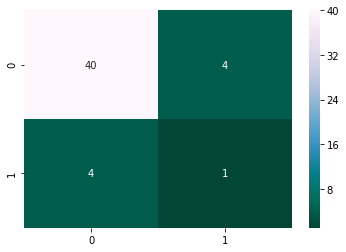

In [746]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_over_glove))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_over_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_over_glove))
cm = confusion_matrix(Y_test, pred_Log_baseline_over_glove)
print("precision_score", precision_score(Y_test, pred_Log_baseline_over_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_over_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [747]:
arr = []
for ind,value in enumerate(pred_Log_baseline_over_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

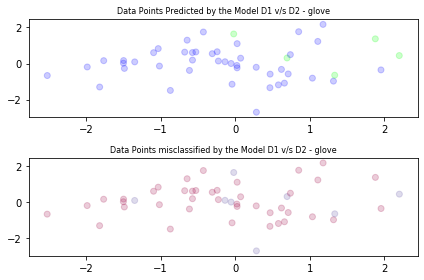

In [748]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_over_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - word2vec (Over sampled) </h3>

In [749]:
#implementing Logistic Regression - word2vec
classifier_Log_baseline_over_word2vec = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_over_word2vec, X8, Y8, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_over_word2vec.fit(X8,Y8)
pred_Log_baseline_over_word2vec = classifier_Log_baseline_over_word2vec.predict(X_test_word2vec_scale)
pred_Log_baseline_over_word2vec

Accuracy KFold: 0.97 Accuracy RepeatedKFold: 2.91 Accuracy StratifiedKFold: 0.97
Recall KFold: 1.00 Recall RepeatedKFold: 3.00 Recall StratifiedKFold: 1.00
Precision KFold: 0.95 Precision RepeatedKFold: 2.82 Precision StratifiedKFold: 0.95


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [750]:
pred_Log_baseline_over_word2vec_proba = classifier_Log_baseline_over_word2vec.predict_proba(X_test_word2vec_scale)
pred_Log_baseline_over_word2vec_log_proba = classifier_Log_baseline_over_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_Log_baseline_over_word2vec_proba,pred_Log_baseline_over_word2vec_log_proba)

[[9.99459672e-01 5.40328490e-04]
 [9.99988828e-01 1.11718056e-05]
 [9.99562967e-01 4.37032625e-04]
 [9.07449282e-01 9.25507178e-02]
 [9.99664440e-01 3.35559794e-04]
 [9.11404968e-01 8.85950320e-02]
 [9.90044512e-01 9.95548797e-03]
 [9.80949885e-01 1.90501155e-02]
 [9.99649653e-01 3.50347132e-04]
 [9.99936745e-01 6.32545362e-05]
 [9.99999867e-01 1.32668680e-07]
 [9.65646586e-01 3.43534137e-02]
 [1.11369935e-01 8.88630065e-01]
 [9.99683877e-01 3.16123138e-04]
 [9.99999320e-01 6.80261206e-07]
 [9.99994822e-01 5.17841517e-06]
 [9.80745746e-01 1.92542540e-02]
 [9.99890797e-01 1.09203003e-04]
 [9.97038808e-01 2.96119247e-03]
 [9.98957664e-01 1.04233630e-03]
 [9.97601053e-01 2.39894700e-03]
 [9.39161166e-01 6.08388338e-02]
 [2.79005235e-01 7.20994765e-01]
 [9.63294157e-01 3.67058434e-02]
 [9.99515446e-01 4.84553917e-04]
 [9.99989500e-01 1.04997177e-05]
 [9.92320776e-01 7.67922365e-03]
 [8.13591713e-01 1.86408287e-01]
 [9.96536219e-01 3.46378129e-03]
 [8.02882381e-01 1.97117619e-01]
 [9.956509

Accuracy: 0.8571428571428571
f1 Score 0.46153846153846156
confusion_matrix [[42  2]
 [ 5  0]]
precision_score 0.44680851063829785
recall_score 0.4772727272727273


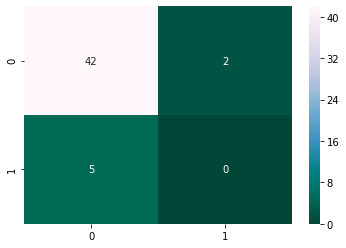

In [751]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_over_word2vec))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_over_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_over_word2vec))
cm = confusion_matrix(Y_test, pred_Log_baseline_over_word2vec)
print("precision_score", precision_score(Y_test, pred_Log_baseline_over_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_over_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [752]:
arr = []
for ind,value in enumerate(pred_Log_baseline_over_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

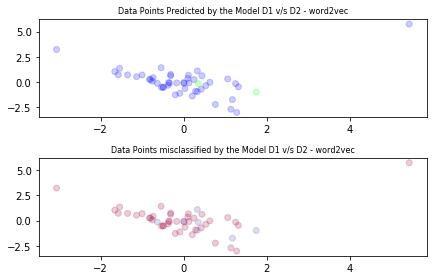

In [753]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_over_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h2> Under Sampling </h2>

In [754]:
#undersampling of the dataset to balance both the classes
#undersampling for Bag of Words
undersample4 = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X4, Y4 = undersample4.fit_resample(features_1, Y_train)

#undersampling for TF-IDF
undersample5 = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X5, Y5 = undersample5.fit_resample(features_2, Y_train)

#undersampling for Glove
undersample6 = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X6, Y6 = undersample6.fit_resample(X_train_glove_scale, Y_train)

#undersampling for word2vec
undersample7 = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X7, Y7 = undersample7.fit_resample(X_train_word2vec_scale, Y_train)

In [755]:
#function to calculate the distribution of classes
def label_count2(df):
    not_approved = 0
    approved = 0
    list5 = []
    for i in df:
        if i == 1:
            approved = approved + 1
        else:
            not_approved = not_approved + 1
    list5.append(not_approved)
    list5.append(approved)
    return list5

In [756]:
#calling the label count function
dataset_label_count_2 = label_count2(Y4)
dataset_label_count_2

[46, 46]

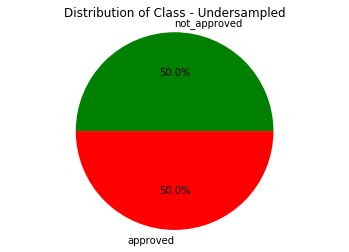

In [1017]:
#displaying the pie chart for distribution of classes
fig = plt.figure()
Sentiments_1 = ['not_approved', 'approved']
mycolors = ["g", "r"]
plt.pie(dataset_label_count_2,labels=Sentiments,autopct='%1.1f%%', colors = mycolors)
plt.title('Distribution of Class - Undersampled')
plt.axis('equal')
plt.show()

<p> From the above Pie chart, we have balanced the two classes by under sampling </p>
<p> <b>Not Approved:</b> 50% (46)
    <b>Approved:</b> 50% (46)</p>

<h3> Multinomial Naive Bayes - BoW (Under sampled) </h3>

In [758]:
#implementing Multinomial Naive Bayes - BoW
classifier_MNB_baseline_under_bow = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_under_bow.fit(X4,Y4)
pred_MNB_baseline_under_bow = classifier_MNB_baseline_under_bow.predict(features_11)
pred_MNB_baseline_under_bow

Accuracy KFold: 0.44 Accuracy RepeatedKFold: 1.46 Accuracy StratifiedKFold: 0.53
Recall KFold: 0.50 Recall RepeatedKFold: 1.47 Recall StratifiedKFold: 0.49
Precision KFold: 0.51 Precision RepeatedKFold: 1.47 Precision StratifiedKFold: 0.56


array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1])

In [759]:
pred_MNB_baseline_under_bow_proba = classifier_MNB_baseline_under_bow.predict_proba(features_11)
pred_MNB_baseline_under_bow_log_proba = classifier_MNB_baseline_under_bow.predict_log_proba(features_11)
print(pred_MNB_baseline_under_bow_proba,pred_MNB_baseline_under_bow_log_proba)

[[1.00000000e+00 2.27324063e-17]
 [1.00000000e+00 5.92393656e-13]
 [1.00000000e+00 1.02482983e-12]
 [1.00000000e+00 1.87478059e-14]
 [1.08485848e-01 8.91514152e-01]
 [9.99935569e-01 6.44305990e-05]
 [1.32046034e-22 1.00000000e+00]
 [3.12248143e-09 9.99999997e-01]
 [1.68728578e-02 9.83127142e-01]
 [1.00000000e+00 5.41743299e-12]
 [9.99999993e-01 6.69050498e-09]
 [9.99967020e-01 3.29800877e-05]
 [9.99999956e-01 4.37273998e-08]
 [9.99962017e-01 3.79831711e-05]
 [1.22082337e-21 1.00000000e+00]
 [1.00000000e+00 1.46756874e-20]
 [1.00000000e+00 2.08555622e-10]
 [1.00000000e+00 6.13409568e-12]
 [1.73406971e-01 8.26593029e-01]
 [1.00000000e+00 1.98197634e-20]
 [1.21470109e-03 9.98785299e-01]
 [1.00000000e+00 1.56535333e-23]
 [9.53967546e-01 4.60324539e-02]
 [9.99990491e-01 9.50946136e-06]
 [1.00000000e+00 4.97036252e-17]
 [8.88715196e-01 1.11284804e-01]
 [5.16159635e-06 9.99994838e-01]
 [8.16497517e-17 1.00000000e+00]
 [1.97042512e-03 9.98029575e-01]
 [9.97846515e-01 2.15348463e-03]
 [4.260564

Accuracy: 0.6530612244897959
f1 Score 0.5435616438356164
confusion_matrix [[28 16]
 [ 1  4]]
precision_score 0.5827586206896552
recall_score 0.7181818181818183


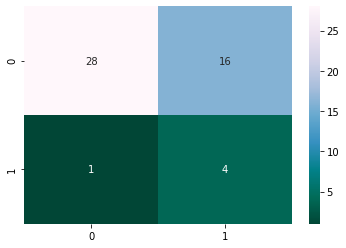

In [760]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_under_bow))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_under_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_under_bow))
cm = confusion_matrix(Y_test, pred_MNB_baseline_under_bow)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_under_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_under_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [761]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_under_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

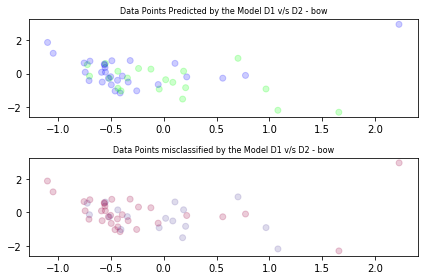

In [762]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_MNB_baseline_under_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Multinomial Naive Bayes - TF-IDF (Under sampled) </h3>

In [763]:
#implementing Multinomial Naive Bayes - TF-IDF
classifier_MNB_baseline_under_tfidf = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_MNB_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_MNB_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_MNB_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_MNB_baseline_under_tfidf.fit(X5,Y5)
pred_MNB_baseline_under_tfidf = classifier_MNB_baseline_under_tfidf.predict(features_22)
pred_MNB_baseline_under_tfidf

Accuracy KFold: 0.39 Accuracy RepeatedKFold: 1.20 Accuracy StratifiedKFold: 0.38
Recall KFold: 0.43 Recall RepeatedKFold: 1.39 Recall StratifiedKFold: 0.49
Precision KFold: 0.38 Precision RepeatedKFold: 1.28 Precision StratifiedKFold: 0.39


array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0])

In [764]:
pred_MNB_baseline_under_tfidf_proba = classifier_MNB_baseline_under_tfidf.predict_proba(features_22)
pred_MNB_baseline_under_tfidf_log_proba = classifier_MNB_baseline_under_tfidf.predict_log_proba(features_22)
print(pred_MNB_baseline_under_tfidf_proba,pred_MNB_baseline_under_tfidf_log_proba)

[[0.47362807 0.52637193]
 [0.44568232 0.55431768]
 [0.53691485 0.46308515]
 [0.51819264 0.48180736]
 [0.42462636 0.57537364]
 [0.30002073 0.69997927]
 [0.57963407 0.42036593]
 [0.50110354 0.49889646]
 [0.58847806 0.41152194]
 [0.76402463 0.23597537]
 [0.39320972 0.60679028]
 [0.62719076 0.37280924]
 [0.47171735 0.52828265]
 [0.51669284 0.48330716]
 [0.56063746 0.43936254]
 [0.21010507 0.78989493]
 [0.55622176 0.44377824]
 [0.62370196 0.37629804]
 [0.52480948 0.47519052]
 [0.61720237 0.38279763]
 [0.64449716 0.35550284]
 [0.59101691 0.40898309]
 [0.90562184 0.09437816]
 [0.21978694 0.78021306]
 [0.44312815 0.55687185]
 [0.33887143 0.66112857]
 [0.42062796 0.57937204]
 [0.55750528 0.44249472]
 [0.59862878 0.40137122]
 [0.57372692 0.42627308]
 [0.59694613 0.40305387]
 [0.46472383 0.53527617]
 [0.43169768 0.56830232]
 [0.82920645 0.17079355]
 [0.37157836 0.62842164]
 [0.82229412 0.17770588]
 [0.41958669 0.58041331]
 [0.73532561 0.26467439]
 [0.4785313  0.5214687 ]
 [0.39954145 0.60045855]


Accuracy: 0.6122448979591837
f1 Score 0.5347326336831584
confusion_matrix [[25 19]
 [ 0  5]]
precision_score 0.6041666666666666
recall_score 0.7840909090909092


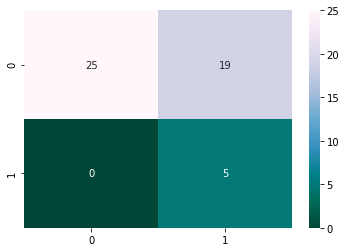

In [765]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_baseline_under_tfidf))
print("f1 Score", f1_score(Y_test, pred_MNB_baseline_under_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_baseline_under_tfidf))
cm = confusion_matrix(Y_test, pred_MNB_baseline_under_tfidf)
print("precision_score", precision_score(Y_test, pred_MNB_baseline_under_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_baseline_under_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [766]:
arr = []
for ind,value in enumerate(pred_MNB_baseline_under_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

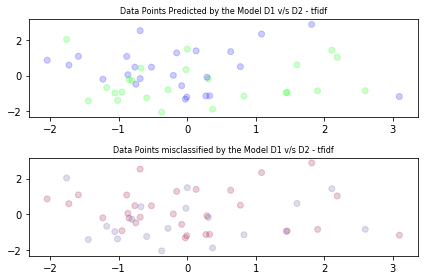

In [767]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_MNB_baseline_under_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - BoW (Under sampled) </h3>

In [768]:
#implementing Random Forest - BoW
classifier_RF_baseline_under_bow = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_under_bow.fit(X4,Y4)
pred_RF_baseline_under_bow = classifier_RF_baseline_under_bow.predict(features_11)
pred_RF_baseline_under_bow

Accuracy KFold: 0.48 Accuracy RepeatedKFold: 1.59 Accuracy StratifiedKFold: 0.56
Recall KFold: 0.40 Recall RepeatedKFold: 1.66 Recall StratifiedKFold: 0.53
Precision KFold: 0.45 Precision RepeatedKFold: 1.72 Precision StratifiedKFold: 0.61


array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [769]:
pred_RF_baseline_under_bow_proba = classifier_RF_baseline_under_bow.predict_proba(features_11)
pred_RF_baseline_under_bow_log_proba = classifier_RF_baseline_under_bow.predict_log_proba(features_11)
print(pred_RF_baseline_under_bow_proba,pred_RF_baseline_under_bow_log_proba)

[[0.58 0.42]
 [0.64 0.36]
 [0.62 0.38]
 [0.64 0.36]
 [0.43 0.57]
 [0.54 0.46]
 [0.49 0.51]
 [0.47 0.53]
 [0.51 0.49]
 [0.58 0.42]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.53 0.47]
 [0.55 0.45]
 [0.49 0.51]
 [0.65 0.35]
 [0.57 0.43]
 [0.63 0.37]
 [0.46 0.54]
 [0.57 0.43]
 [0.51 0.49]
 [0.66 0.34]
 [0.44 0.56]
 [0.48 0.52]
 [0.55 0.45]
 [0.62 0.38]
 [0.53 0.47]
 [0.49 0.51]
 [0.42 0.58]
 [0.49 0.51]
 [0.59 0.41]
 [0.43 0.57]
 [0.56 0.44]
 [0.55 0.45]
 [0.48 0.52]
 [0.64 0.36]
 [0.45 0.55]
 [0.56 0.44]
 [0.49 0.51]
 [0.56 0.44]
 [0.49 0.51]
 [0.59 0.41]
 [0.43 0.57]
 [0.45 0.55]
 [0.46 0.54]
 [0.49 0.51]
 [0.7  0.3 ]
 [0.53 0.47]
 [0.49 0.51]] [[-0.54472718 -0.86750057]
 [-0.4462871  -1.02165125]
 [-0.4780358  -0.96758403]
 [-0.4462871  -1.02165125]
 [-0.84397007 -0.56211892]
 [-0.61618614 -0.77652879]
 [-0.71334989 -0.67334455]
 [-0.75502258 -0.63487827]
 [-0.67334455 -0.71334989]
 [-0.54472718 -0.86750057]
 [-0.54472718 -0.86750057]
 [-0.69314718 -0.69314718]
 [-0.63487827 -0.75502258]
 [-0.597837

Accuracy: 0.6530612244897959
f1 Score 0.5435616438356164
confusion_matrix [[28 16]
 [ 1  4]]
precision_score 0.5827586206896552
recall_score 0.7181818181818183


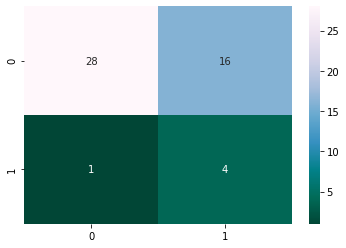

In [770]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_under_bow))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_under_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_under_bow))
cm = confusion_matrix(Y_test, pred_RF_baseline_under_bow)
print("precision_score", precision_score(Y_test, pred_RF_baseline_under_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_under_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [771]:
arr = []
for ind,value in enumerate(pred_RF_baseline_under_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

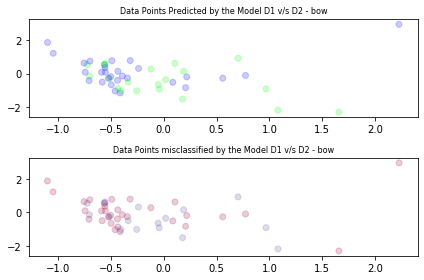

In [772]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_RF_baseline_under_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - TF-IDF (Under sampled) </h3>

In [773]:
#implementing Random Forest - TF-IDF
classifier_RF_baseline_under_tfidf = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_under_tfidf.fit(X5,Y5)
pred_RF_baseline_under_tfidf = classifier_RF_baseline_under_tfidf.predict(features_22)
pred_RF_baseline_under_tfidf

Accuracy KFold: 0.44 Accuracy RepeatedKFold: 1.15 Accuracy StratifiedKFold: 0.37
Recall KFold: 0.43 Recall RepeatedKFold: 1.19 Recall StratifiedKFold: 0.32
Precision KFold: 0.46 Precision RepeatedKFold: 1.11 Precision StratifiedKFold: 0.33


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0])

In [774]:
pred_RF_baseline_under_tfidf_proba = classifier_RF_baseline_under_tfidf.predict_proba(features_22)
pred_RF_baseline_under_tfidf_log_proba = classifier_RF_baseline_under_tfidf.predict_log_proba(features_22)
print(pred_RF_baseline_under_tfidf_proba,pred_RF_baseline_under_tfidf_log_proba)

[[0.56 0.44]
 [0.43 0.57]
 [0.62 0.38]
 [0.52 0.48]
 [0.53 0.47]
 [0.46 0.54]
 [0.41 0.59]
 [0.48 0.52]
 [0.49 0.51]
 [0.56 0.44]
 [0.61 0.39]
 [0.59 0.41]
 [0.48 0.52]
 [0.5  0.5 ]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.49 0.51]
 [0.61 0.39]
 [0.49 0.51]
 [0.53 0.47]
 [0.58 0.42]
 [0.58 0.42]
 [0.64 0.36]
 [0.3  0.7 ]
 [0.5  0.5 ]
 [0.47 0.53]
 [0.44 0.56]
 [0.52 0.48]
 [0.65 0.35]
 [0.52 0.48]
 [0.52 0.48]
 [0.56 0.44]
 [0.53 0.47]
 [0.52 0.48]
 [0.41 0.59]
 [0.76 0.24]
 [0.53 0.47]
 [0.49 0.51]
 [0.58 0.42]
 [0.52 0.48]
 [0.45 0.55]
 [0.65 0.35]
 [0.57 0.43]
 [0.48 0.52]
 [0.43 0.57]
 [0.35 0.65]
 [0.43 0.57]
 [0.42 0.58]
 [0.53 0.47]] [[-0.5798185  -0.82098055]
 [-0.84397007 -0.56211892]
 [-0.4780358  -0.96758403]
 [-0.65392647 -0.73396918]
 [-0.63487827 -0.75502258]
 [-0.77652879 -0.61618614]
 [-0.89159812 -0.52763274]
 [-0.73396918 -0.65392647]
 [-0.71334989 -0.67334455]
 [-0.5798185  -0.82098055]
 [-0.49429632 -0.94160854]
 [-0.52763274 -0.89159812]
 [-0.73396918 -0.65392647]
 [-0.693147

Accuracy: 0.673469387755102
f1 Score 0.5585585585585585
confusion_matrix [[29 15]
 [ 1  4]]
precision_score 0.5885964912280701
recall_score 0.7295454545454545


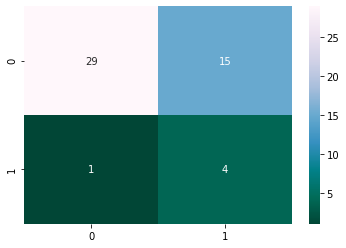

In [775]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_under_tfidf))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_under_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_under_tfidf))
cm = confusion_matrix(Y_test, pred_RF_baseline_under_tfidf)
print("precision_score", precision_score(Y_test, pred_RF_baseline_under_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_under_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [776]:
arr = []
for ind,value in enumerate(pred_RF_baseline_under_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

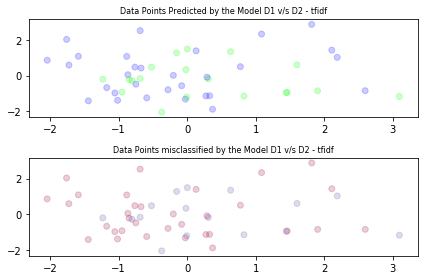

In [777]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_RF_baseline_under_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - GloVe (Under sampled) </h3>

In [778]:
#implementing Random Forest - GloVe
classifier_RF_baseline_under_glove = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_under_glove.fit(X6,Y6)
pred_RF_baseline_under_glove = classifier_RF_baseline_under_glove.predict(X_test_glove_scale)
pred_RF_baseline_under_glove

Accuracy KFold: 0.59 Accuracy RepeatedKFold: 1.59 Accuracy StratifiedKFold: 0.52
Recall KFold: 0.62 Recall RepeatedKFold: 1.68 Recall StratifiedKFold: 0.54
Precision KFold: 0.64 Precision RepeatedKFold: 1.76 Precision StratifiedKFold: 0.55


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [779]:
pred_RF_baseline_under_glove_proba = classifier_RF_baseline_under_glove.predict_proba(X_test_glove_scale)
pred_RF_baseline_under_glove_log_proba = classifier_RF_baseline_under_glove.predict_log_proba(X_test_glove_scale)
print(pred_RF_baseline_under_glove_proba,pred_RF_baseline_under_glove_log_proba)

[[0.54 0.46]
 [0.57 0.43]
 [0.67 0.33]
 [0.43 0.57]
 [0.48 0.52]
 [0.5  0.5 ]
 [0.41 0.59]
 [0.49 0.51]
 [0.54 0.46]
 [0.56 0.44]
 [0.79 0.21]
 [0.48 0.52]
 [0.42 0.58]
 [0.51 0.49]
 [0.41 0.59]
 [0.7  0.3 ]
 [0.61 0.39]
 [0.55 0.45]
 [0.46 0.54]
 [0.73 0.27]
 [0.48 0.52]
 [0.55 0.45]
 [0.44 0.56]
 [0.47 0.53]
 [0.61 0.39]
 [0.57 0.43]
 [0.59 0.41]
 [0.46 0.54]
 [0.55 0.45]
 [0.59 0.41]
 [0.62 0.38]
 [0.53 0.47]
 [0.45 0.55]
 [0.48 0.52]
 [0.45 0.55]
 [0.54 0.46]
 [0.46 0.54]
 [0.55 0.45]
 [0.48 0.52]
 [0.58 0.42]
 [0.41 0.59]
 [0.57 0.43]
 [0.37 0.63]
 [0.47 0.53]
 [0.46 0.54]
 [0.47 0.53]
 [0.62 0.38]
 [0.61 0.39]
 [0.48 0.52]] [[-0.61618614 -0.77652879]
 [-0.56211892 -0.84397007]
 [-0.40047757 -1.10866262]
 [-0.84397007 -0.56211892]
 [-0.73396918 -0.65392647]
 [-0.69314718 -0.69314718]
 [-0.89159812 -0.52763274]
 [-0.71334989 -0.67334455]
 [-0.61618614 -0.77652879]
 [-0.5798185  -0.82098055]
 [-0.23572233 -1.56064775]
 [-0.73396918 -0.65392647]
 [-0.86750057 -0.54472718]
 [-0.673344

Accuracy: 0.5510204081632653
f1 Score 0.44999999999999996
confusion_matrix [[24 20]
 [ 2  3]]
precision_score 0.5267558528428093
recall_score 0.5727272727272728


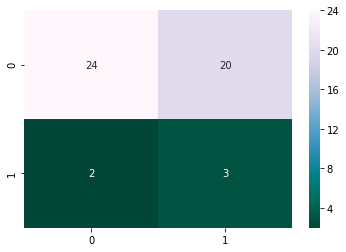

In [780]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_under_glove))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_under_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_under_glove))
cm = confusion_matrix(Y_test, pred_RF_baseline_under_glove)
print("precision_score", precision_score(Y_test, pred_RF_baseline_under_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_under_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [781]:
arr = []
for ind,value in enumerate(pred_RF_baseline_under_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

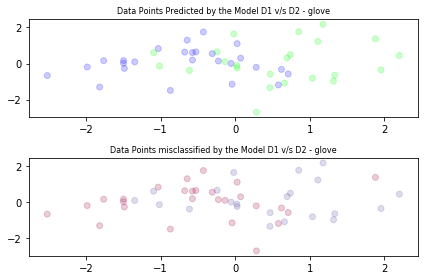

In [782]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_under_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Random Forest - word2vec (Under sampled) </h3>

In [783]:
#implementing Random Forest - GloVe
classifier_RF_baseline_under_word2vec = RandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_RF_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_RF_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_RF_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_RF_baseline_under_word2vec.fit(X7,Y7)
pred_RF_baseline_under_word2vec = classifier_RF_baseline_under_word2vec.predict(X_test_word2vec_scale)
pred_RF_baseline_under_word2vec

Accuracy KFold: 0.58 Accuracy RepeatedKFold: 1.39 Accuracy StratifiedKFold: 0.43
Recall KFold: 0.57 Recall RepeatedKFold: 1.48 Recall StratifiedKFold: 0.47
Precision KFold: 0.58 Precision RepeatedKFold: 1.42 Precision StratifiedKFold: 0.46


array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1])

In [784]:
pred_RF_baseline_under_word2vec_proba = classifier_RF_baseline_under_word2vec.predict_proba(X_test_word2vec_scale)
pred_RF_baseline_under_word2vec_log_proba = classifier_RF_baseline_under_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_RF_baseline_under_word2vec_proba,pred_RF_baseline_under_word2vec_log_proba)

[[0.54 0.46]
 [0.46 0.54]
 [0.61 0.39]
 [0.44 0.56]
 [0.41 0.59]
 [0.45 0.55]
 [0.48 0.52]
 [0.55 0.45]
 [0.55 0.45]
 [0.58 0.42]
 [0.66 0.34]
 [0.52 0.48]
 [0.44 0.56]
 [0.53 0.47]
 [0.54 0.46]
 [0.59 0.41]
 [0.5  0.5 ]
 [0.61 0.39]
 [0.4  0.6 ]
 [0.56 0.44]
 [0.52 0.48]
 [0.46 0.54]
 [0.51 0.49]
 [0.52 0.48]
 [0.68 0.32]
 [0.52 0.48]
 [0.53 0.47]
 [0.45 0.55]
 [0.48 0.52]
 [0.57 0.43]
 [0.55 0.45]
 [0.55 0.45]
 [0.47 0.53]
 [0.53 0.47]
 [0.6  0.4 ]
 [0.59 0.41]
 [0.48 0.52]
 [0.5  0.5 ]
 [0.42 0.58]
 [0.51 0.49]
 [0.4  0.6 ]
 [0.6  0.4 ]
 [0.3  0.7 ]
 [0.47 0.53]
 [0.46 0.54]
 [0.44 0.56]
 [0.63 0.37]
 [0.49 0.51]
 [0.43 0.57]] [[-0.61618614 -0.77652879]
 [-0.77652879 -0.61618614]
 [-0.49429632 -0.94160854]
 [-0.82098055 -0.5798185 ]
 [-0.89159812 -0.52763274]
 [-0.7985077  -0.597837  ]
 [-0.73396918 -0.65392647]
 [-0.597837   -0.7985077 ]
 [-0.597837   -0.7985077 ]
 [-0.54472718 -0.86750057]
 [-0.41551544 -1.07880966]
 [-0.65392647 -0.73396918]
 [-0.82098055 -0.5798185 ]
 [-0.634878

Accuracy: 0.5306122448979592
f1 Score 0.3824657534246576
confusion_matrix [[25 19]
 [ 4  1]]
precision_score 0.4560344827586207
recall_score 0.38409090909090915


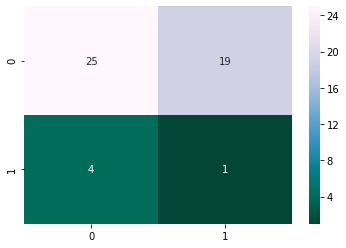

In [785]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_RF_baseline_under_word2vec))
print("f1 Score", f1_score(Y_test, pred_RF_baseline_under_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_RF_baseline_under_word2vec))
cm = confusion_matrix(Y_test, pred_RF_baseline_under_word2vec)
print("precision_score", precision_score(Y_test, pred_RF_baseline_under_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_RF_baseline_under_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [786]:
arr = []
for ind,value in enumerate(pred_RF_baseline_under_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

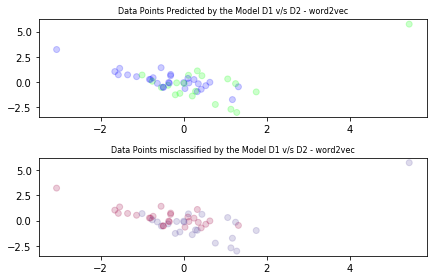

In [787]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_RF_baseline_under_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> SVM - BoW (Under sampled) </h3>

In [788]:
#implementing SVM - BoW
classifier_SVM_baseline_under_bow = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_under_bow.fit(X4,Y4)
pred_SVM_baseline_under_bow = classifier_SVM_baseline_under_bow.predict(features_11)
pred_SVM_baseline_under_bow

Accuracy KFold: 0.33 Accuracy RepeatedKFold: 1.12 Accuracy StratifiedKFold: 0.43
Recall KFold: 0.49 Recall RepeatedKFold: 1.62 Recall StratifiedKFold: 0.59
Precision KFold: 0.37 Precision RepeatedKFold: 1.20 Precision StratifiedKFold: 0.42


array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [789]:
pred_SVM_baseline_under_bow_proba = classifier_SVM_baseline_under_bow.predict_proba(features_11)
pred_SVM_baseline_under_bow_log_proba = classifier_SVM_baseline_under_bow.predict_log_proba(features_11)
print(pred_SVM_baseline_under_bow_proba,pred_SVM_baseline_under_bow_log_proba)

[[0.4321794  0.5678206 ]
 [0.48608897 0.51391103]
 [0.46620757 0.53379243]
 [0.48727075 0.51272925]
 [0.5        0.5       ]
 [0.48246771 0.51753229]
 [0.54677606 0.45322394]
 [0.54327948 0.45672052]
 [0.49168895 0.50831105]
 [0.45953676 0.54046324]
 [0.46754067 0.53245933]
 [0.53948798 0.46051202]
 [0.48335779 0.51664221]
 [0.53780962 0.46219038]
 [0.474811   0.525189  ]
 [0.46706064 0.53293936]
 [0.44596284 0.55403716]
 [0.46865658 0.53134342]
 [0.5577733  0.4422267 ]
 [0.45839263 0.54160737]
 [0.5        0.5       ]
 [0.45604433 0.54395567]
 [0.51443283 0.48556717]
 [0.5245129  0.4754871 ]
 [0.47962313 0.52037687]
 [0.52583079 0.47416921]
 [0.5061792  0.4938208 ]
 [0.54959632 0.45040368]
 [0.54334023 0.45665977]
 [0.53729893 0.46270107]
 [0.53209266 0.46790734]
 [0.57229271 0.42770729]
 [0.50941047 0.49058953]
 [0.41024126 0.58975874]
 [0.55745761 0.44254239]
 [0.42329615 0.57670385]
 [0.53982592 0.46017408]
 [0.47169391 0.52830609]
 [0.48901363 0.51098637]
 [0.49195457 0.50804543]


Accuracy: 0.5510204081632653
f1 Score 0.4895833333333333
confusion_matrix [[22 22]
 [ 0  5]]
precision_score 0.5925925925925926
recall_score 0.75


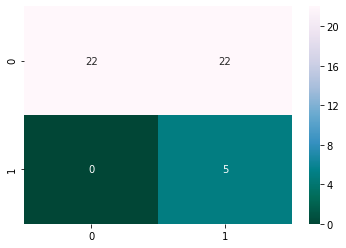

In [790]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_under_bow))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_under_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_under_bow))
cm = confusion_matrix(Y_test, pred_SVM_baseline_under_bow)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_under_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_under_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [791]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_under_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

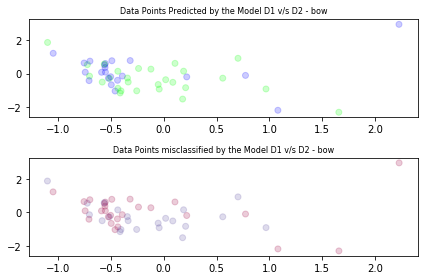

In [792]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_SVM_baseline_under_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> SVM - TF-IDF (Under sampled) </h3>

In [793]:
#implementing SVM - TF-IDF
classifier_SVM_baseline_under_tfidf = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_under_tfidf.fit(X5,Y5)
pred_SVM_baseline_under_tfidf = classifier_SVM_baseline_under_tfidf.predict(features_22)
pred_SVM_baseline_under_tfidf

Accuracy KFold: 0.32 Accuracy RepeatedKFold: 0.96 Accuracy StratifiedKFold: 0.40
Recall KFold: 0.39 Recall RepeatedKFold: 1.44 Recall StratifiedKFold: 0.54
Precision KFold: 0.38 Precision RepeatedKFold: 1.10 Precision StratifiedKFold: 0.41


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0])

In [794]:
pred_SVM_baseline_under_tfidf_proba = classifier_SVM_baseline_under_tfidf.predict_proba(features_22)
pred_SVM_baseline_under_tfidf_log_proba = classifier_SVM_baseline_under_tfidf.predict_log_proba(features_22)
print(pred_SVM_baseline_under_tfidf_proba,pred_SVM_baseline_under_tfidf_log_proba)

[[0.5121774  0.4878226 ]
 [0.53287727 0.46712273]
 [0.46480845 0.53519155]
 [0.47550493 0.52449507]
 [0.5        0.5       ]
 [0.61182216 0.38817784]
 [0.4492091  0.5507909 ]
 [0.5        0.5       ]
 [0.46040971 0.53959029]
 [0.32856446 0.67143554]
 [0.47828359 0.52171641]
 [0.43006185 0.56993815]
 [0.43737694 0.56262306]
 [0.43624125 0.56375875]
 [0.45514743 0.54485257]
 [0.60986691 0.39013309]
 [0.5        0.5       ]
 [0.41586322 0.58413678]
 [0.5        0.5       ]
 [0.41327487 0.58672513]
 [0.37909286 0.62090714]
 [0.48896705 0.51103295]
 [0.31889413 0.68110587]
 [0.71853721 0.28146279]
 [0.52191798 0.47808202]
 [0.57773624 0.42226376]
 [0.53133338 0.46866662]
 [0.5        0.5       ]
 [0.41406179 0.58593821]
 [0.44108574 0.55891426]
 [0.44113806 0.55886194]
 [0.60380703 0.39619297]
 [0.52172618 0.47827382]
 [0.32246798 0.67753202]
 [0.60348916 0.39651084]
 [0.27204746 0.72795254]
 [0.51490369 0.48509631]
 [0.34372121 0.65627879]
 [0.55694711 0.44305289]
 [0.53857315 0.46142685]


Accuracy: 0.5510204081632653
f1 Score 0.4895833333333333
confusion_matrix [[22 22]
 [ 0  5]]
precision_score 0.5925925925925926
recall_score 0.75


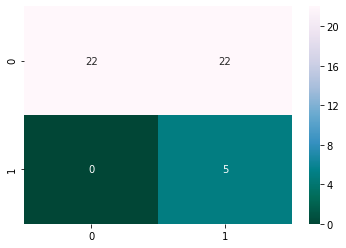

In [795]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_under_tfidf))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_under_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_under_tfidf))
cm = confusion_matrix(Y_test, pred_SVM_baseline_under_tfidf)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_under_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_under_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [796]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_under_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

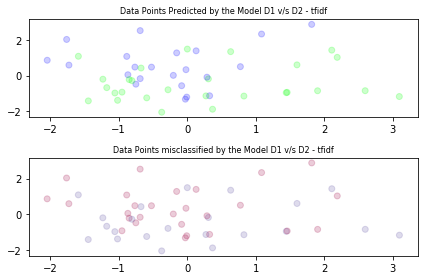

In [797]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_SVM_baseline_under_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> SVM - GloVe (Under sampled) </h3>

In [798]:
#implementing SVM - GloVe
classifier_SVM_baseline_under_glove = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_under_glove.fit(X6,Y6)
pred_SVM_baseline_under_glove = classifier_SVM_baseline_under_glove.predict(X_test_glove_scale)
pred_SVM_baseline_under_glove

Accuracy KFold: 0.50 Accuracy RepeatedKFold: 1.43 Accuracy StratifiedKFold: 0.52
Recall KFold: 0.54 Recall RepeatedKFold: 1.69 Recall StratifiedKFold: 0.56
Precision KFold: 0.55 Precision RepeatedKFold: 1.56 Precision StratifiedKFold: 0.47


array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [799]:
pred_SVM_baseline_under_glove_proba = classifier_SVM_baseline_under_glove.predict_proba(X_test_glove_scale)
pred_SVM_baseline_under_glove_log_proba = classifier_SVM_baseline_under_glove.predict_log_proba(X_test_glove_scale)
print(pred_SVM_baseline_under_glove_proba,pred_SVM_baseline_under_glove_log_proba)

[[0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.50663564 0.49336436]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.50577864 0.49422136]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]


Accuracy: 0.5102040816326531
f1 Score 0.4
confusion_matrix [[23 21]
 [ 3  2]]
precision_score 0.4857859531772575
recall_score 0.46136363636363636


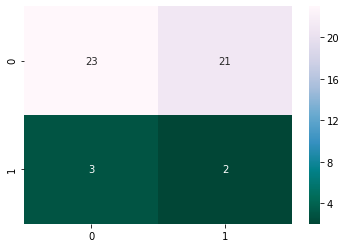

In [800]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_under_glove))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_under_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_under_glove))
cm = confusion_matrix(Y_test, pred_SVM_baseline_under_glove)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_under_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_under_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [801]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_under_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

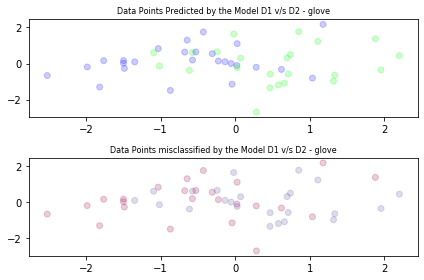

In [802]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_under_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> SVM - word2vec (Under sampled) </h3>

In [803]:
#implementing SVM - word2vec
classifier_SVM_baseline_under_word2vec = SVC(probability=True)

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_SVM_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_SVM_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_SVM_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_SVM_baseline_under_word2vec.fit(X7,Y7)
pred_SVM_baseline_under_word2vec = classifier_SVM_baseline_under_word2vec.predict(X_test_word2vec_scale)
pred_SVM_baseline_under_word2vec

Accuracy KFold: 0.55 Accuracy RepeatedKFold: 1.29 Accuracy StratifiedKFold: 0.49
Recall KFold: 0.61 Recall RepeatedKFold: 1.55 Recall StratifiedKFold: 0.54
Precision KFold: 0.61 Precision RepeatedKFold: 1.21 Precision StratifiedKFold: 0.49


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [804]:
pred_SVM_baseline_under_glove_proba = classifier_SVM_baseline_under_word2vec.predict_proba(X_test_word2vec_scale)
pred_SVM_baseline_under_glove_log_proba = classifier_SVM_baseline_under_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_SVM_baseline_under_glove_proba,pred_SVM_baseline_under_glove_log_proba)

[[0.53052888 0.46947112]
 [0.41485751 0.58514249]
 [0.3956162  0.6043838 ]
 [0.51380186 0.48619814]
 [0.49419542 0.50580458]
 [0.50954459 0.49045541]
 [0.62823621 0.37176379]
 [0.49167143 0.50832857]
 [0.40839652 0.59160348]
 [0.38546245 0.61453755]
 [0.2378394  0.7621606 ]
 [0.58632468 0.41367532]
 [0.60693586 0.39306414]
 [0.5        0.5       ]
 [0.51719584 0.48280416]
 [0.31139877 0.68860123]
 [0.44173703 0.55826297]
 [0.3778477  0.6221523 ]
 [0.58373947 0.41626053]
 [0.33871636 0.66128364]
 [0.49056989 0.50943011]
 [0.40994687 0.59005313]
 [0.56723407 0.43276593]
 [0.52360448 0.47639552]
 [0.28334887 0.71665113]
 [0.45068231 0.54931769]
 [0.43922529 0.56077471]
 [0.56024607 0.43975393]
 [0.46753327 0.53246673]
 [0.50559227 0.49440773]
 [0.5703489  0.4296511 ]
 [0.45984665 0.54015335]
 [0.58845821 0.41154179]
 [0.44439527 0.55560473]
 [0.35192306 0.64807694]
 [0.40918907 0.59081093]
 [0.5678299  0.4321701 ]
 [0.44272286 0.55727714]
 [0.56482404 0.43517596]
 [0.36263394 0.63736606]


Accuracy: 0.4489795918367347
f1 Score 0.36302359171882526
confusion_matrix [[20 24]
 [ 3  2]]
precision_score 0.47324414715719065
recall_score 0.42727272727272725


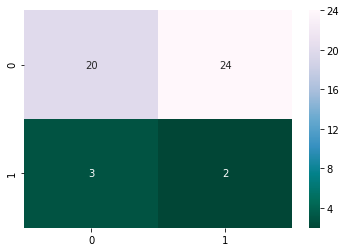

In [805]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_SVM_baseline_under_word2vec))
print("f1 Score", f1_score(Y_test, pred_SVM_baseline_under_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_SVM_baseline_under_word2vec))
cm = confusion_matrix(Y_test, pred_SVM_baseline_under_word2vec)
print("precision_score", precision_score(Y_test, pred_SVM_baseline_under_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_SVM_baseline_under_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [806]:
arr = []
for ind,value in enumerate(pred_SVM_baseline_under_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

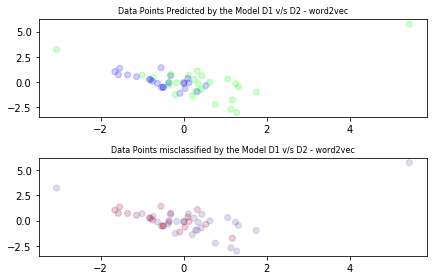

In [807]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_SVM_baseline_under_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - BoW (Under sampled) </h3>

In [808]:
#implementing Logistic Regression - BoW
classifier_Log_baseline_under_bow = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_under_bow, X4, Y4, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_under_bow.fit(X4,Y4)
pred_Log_baseline_under_bow = classifier_Log_baseline_under_bow.predict(features_11)
pred_Log_baseline_under_bow

Accuracy KFold: 0.42 Accuracy RepeatedKFold: 1.32 Accuracy StratifiedKFold: 0.46
Recall KFold: 0.39 Recall RepeatedKFold: 1.19 Recall StratifiedKFold: 0.47
Precision KFold: 0.39 Precision RepeatedKFold: 1.20 Precision StratifiedKFold: 0.46


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0])

In [809]:
pred_Log_baseline_under_bow_proba = classifier_Log_baseline_under_bow.predict_proba(features_11)
pred_Log_baseline_under_bow_log_proba = classifier_Log_baseline_under_bow.predict_log_proba(features_11)
print(pred_Log_baseline_under_bow_proba,pred_Log_baseline_under_bow_log_proba)

[[0.99672698 0.00327302]
 [0.65305935 0.34694065]
 [0.98414011 0.01585989]
 [0.75083715 0.24916285]
 [0.65363838 0.34636162]
 [0.56646728 0.43353272]
 [0.03757831 0.96242169]
 [0.53650788 0.46349212]
 [0.85699095 0.14300905]
 [0.8800875  0.1199125 ]
 [0.7690306  0.2309694 ]
 [0.38995038 0.61004962]
 [0.95458897 0.04541103]
 [0.61795183 0.38204817]
 [0.51216528 0.48783472]
 [0.88657559 0.11342441]
 [0.83972592 0.16027408]
 [0.61307257 0.38692743]
 [0.40792792 0.59207208]
 [0.68263281 0.31736719]
 [0.61129145 0.38870855]
 [0.88785082 0.11214918]
 [0.6570515  0.3429485 ]
 [0.60099235 0.39900765]
 [0.12443527 0.87556473]
 [0.14093106 0.85906894]
 [0.23857109 0.76142891]
 [0.03845489 0.96154511]
 [0.13976573 0.86023427]
 [0.47490315 0.52509685]
 [0.73386572 0.26613428]
 [0.04647801 0.95352199]
 [0.91633931 0.08366069]
 [0.95471812 0.04528188]
 [0.0660613  0.9339387 ]
 [0.97455971 0.02544029]
 [0.18559843 0.81440157]
 [0.90159166 0.09840834]
 [0.85600078 0.14399922]
 [0.17539501 0.82460499]


Accuracy: 0.6938775510204082
f1 Score 0.5739130434782609
confusion_matrix [[30 14]
 [ 1  4]]
precision_score 0.5949820788530467
recall_score 0.740909090909091


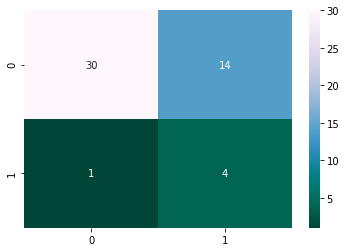

In [810]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_under_bow))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_under_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_under_bow))
cm = confusion_matrix(Y_test, pred_Log_baseline_under_bow)
print("precision_score", precision_score(Y_test, pred_Log_baseline_under_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_under_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [811]:
arr = []
for ind,value in enumerate(pred_Log_baseline_under_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

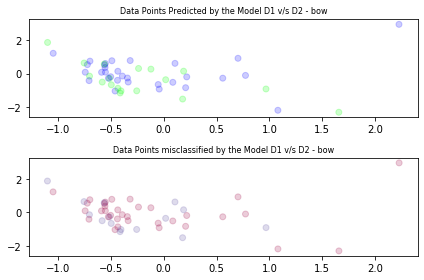

In [812]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Log_baseline_under_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - TF-IDF (Under sampled) </h3>

In [813]:
#implementing Logistic Regression - TF-IDF
classifier_Log_baseline_under_tfidf = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_under_tfidf, X5, Y5, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_under_tfidf.fit(X5,Y5)
pred_Log_baseline_under_tfidf = classifier_Log_baseline_under_tfidf.predict(features_22)
pred_Log_baseline_under_tfidf

Accuracy KFold: 0.40 Accuracy RepeatedKFold: 1.14 Accuracy StratifiedKFold: 0.35
Recall KFold: 0.46 Recall RepeatedKFold: 1.35 Recall StratifiedKFold: 0.38
Precision KFold: 0.42 Precision RepeatedKFold: 1.21 Precision StratifiedKFold: 0.34


array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1])

In [814]:
pred_Log_baseline_under_tfidf_proba = classifier_Log_baseline_under_tfidf.predict_proba(features_22)
pred_Log_baseline_under_tfidf_log_proba = classifier_Log_baseline_under_tfidf.predict_log_proba(features_22)
print(pred_Log_baseline_under_tfidf_proba,pred_Log_baseline_under_tfidf_log_proba)

[[0.46118043 0.53881957]
 [0.33912656 0.66087344]
 [0.75390683 0.24609317]
 [0.53664128 0.46335872]
 [0.51605472 0.48394528]
 [0.35949762 0.64050238]
 [0.46528369 0.53471631]
 [0.29837745 0.70162255]
 [0.72078343 0.27921657]
 [0.89234703 0.10765297]
 [0.56856119 0.43143881]
 [0.70635472 0.29364528]
 [0.52036105 0.47963895]
 [0.4629176  0.5370824 ]
 [0.55681674 0.44318326]
 [0.26512197 0.73487803]
 [0.60849467 0.39150533]
 [0.69345716 0.30654284]
 [0.55995317 0.44004683]
 [0.66699382 0.33300618]
 [0.78039673 0.21960327]
 [0.81432286 0.18567714]
 [0.93645417 0.06354583]
 [0.11289622 0.88710378]
 [0.31608253 0.68391747]
 [0.32956114 0.67043886]
 [0.470796   0.529204  ]
 [0.49845075 0.50154925]
 [0.55929756 0.44070244]
 [0.6556499  0.3443501 ]
 [0.69160403 0.30839597]
 [0.50788021 0.49211979]
 [0.42293399 0.57706601]
 [0.71919806 0.28080194]
 [0.33538668 0.66461332]
 [0.93161609 0.06838391]
 [0.38685388 0.61314612]
 [0.86505057 0.13494943]
 [0.40224671 0.59775329]
 [0.4513229  0.5486771 ]


Accuracy: 0.5714285714285714
f1 Score 0.48575712143928035
confusion_matrix [[24 20]
 [ 1  4]]
precision_score 0.5633333333333334
recall_score 0.6727272727272727


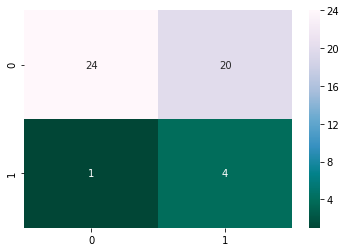

In [815]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_under_tfidf))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_under_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_under_tfidf))
cm = confusion_matrix(Y_test, pred_Log_baseline_under_tfidf)
print("precision_score", precision_score(Y_test, pred_Log_baseline_under_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_under_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [816]:
arr = []
for ind,value in enumerate(pred_Log_baseline_under_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

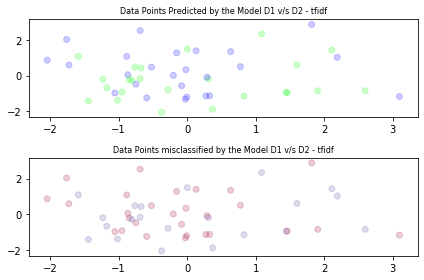

In [817]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Log_baseline_under_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - GloVe (Under sampled) </h3>

In [818]:
#implementing Logistic Regression - GloVe
classifier_Log_baseline_under_glove = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_under_glove, X6, Y6, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_under_glove.fit(X6,Y6)
pred_Log_baseline_under_glove = classifier_Log_baseline_under_glove.predict(X_test_glove_scale)
pred_Log_baseline_under_glove

Accuracy KFold: 0.63 Accuracy RepeatedKFold: 1.76 Accuracy StratifiedKFold: 0.60
Recall KFold: 0.62 Recall RepeatedKFold: 1.82 Recall StratifiedKFold: 0.58
Precision KFold: 0.60 Precision RepeatedKFold: 1.75 Precision StratifiedKFold: 0.59


array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1])

In [819]:
pred_Log_baseline_under_glove_proba = classifier_Log_baseline_under_glove.predict_proba(X_test_glove_scale)
pred_Log_baseline_under_glove_log_proba = classifier_Log_baseline_under_glove.predict_log_proba(X_test_glove_scale)
print(pred_Log_baseline_under_glove_proba,pred_Log_baseline_under_glove_log_proba)

[[3.94101450e-01 6.05898550e-01]
 [6.22070532e-01 3.77929468e-01]
 [9.95916761e-01 4.08323903e-03]
 [1.24540009e-02 9.87545999e-01]
 [9.73450826e-01 2.65491739e-02]
 [4.94808185e-01 5.05191815e-01]
 [9.15397448e-02 9.08460255e-01]
 [5.47243121e-01 4.52756879e-01]
 [9.69706186e-01 3.02938145e-02]
 [6.77863159e-01 3.22136841e-01]
 [9.99910316e-01 8.96836097e-05]
 [9.60019410e-01 3.99805895e-02]
 [6.95802698e-01 3.04197302e-01]
 [3.78383982e-01 6.21616018e-01]
 [6.54042057e-01 3.45957943e-01]
 [9.50630018e-01 4.93699825e-02]
 [7.16521087e-01 2.83478913e-01]
 [5.84311744e-01 4.15688256e-01]
 [5.05421922e-01 4.94578078e-01]
 [9.42960997e-01 5.70390035e-02]
 [1.10503461e-01 8.89496539e-01]
 [9.84676196e-01 1.53238037e-02]
 [1.13877658e-03 9.98861223e-01]
 [4.34406052e-02 9.56559395e-01]
 [9.91384195e-01 8.61580492e-03]
 [6.27904302e-01 3.72095698e-01]
 [9.58413415e-01 4.15865854e-02]
 [1.88646886e-02 9.81135311e-01]
 [8.14358282e-01 1.85641718e-01]
 [6.31003457e-01 3.68996543e-01]
 [9.332585

Accuracy: 0.5714285714285714
f1 Score 0.4361643835616439
confusion_matrix [[26 18]
 [ 3  2]]
precision_score 0.4982758620689655
recall_score 0.4954545454545455


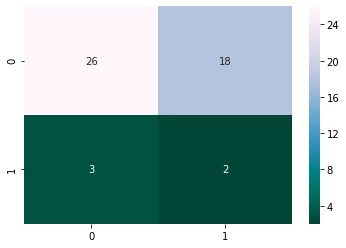

In [820]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_under_glove))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_under_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_under_glove))
cm = confusion_matrix(Y_test, pred_Log_baseline_under_glove)
print("precision_score", precision_score(Y_test, pred_Log_baseline_under_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_under_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [821]:
arr = []
for ind,value in enumerate(pred_Log_baseline_under_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

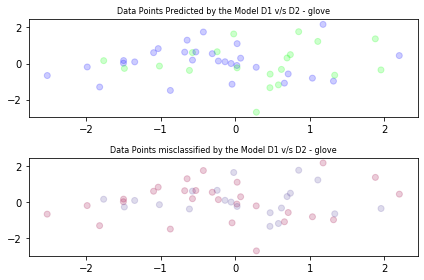

In [822]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_under_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Logistic Regression - word2vec (Under sampled) </h3>

In [823]:
#implementing Logistic Regression - word2vec
classifier_Log_baseline_under_word2vec = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Log_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Log_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Log_baseline_under_word2vec, X7, Y7, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Log_baseline_under_word2vec.fit(X7,Y7)
pred_Log_baseline_under_word2vec = classifier_Log_baseline_under_word2vec.predict(X_test_word2vec_scale)
pred_Log_baseline_under_word2vec

Accuracy KFold: 0.66 Accuracy RepeatedKFold: 1.82 Accuracy StratifiedKFold: 0.67
Recall KFold: 0.66 Recall RepeatedKFold: 1.92 Recall StratifiedKFold: 0.66
Precision KFold: 0.67 Precision RepeatedKFold: 1.89 Precision StratifiedKFold: 0.70


array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1])

In [824]:
pred_Log_baseline_under_word2vec_proba = classifier_Log_baseline_under_word2vec.predict_proba(X_test_word2vec_scale)
pred_Log_baseline_under_word2vec_log_proba = classifier_Log_baseline_under_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_Log_baseline_under_word2vec_proba,pred_Log_baseline_under_word2vec_log_proba)

[[3.61856011e-01 6.38143989e-01]
 [7.37650703e-01 2.62349297e-01]
 [9.45862823e-01 5.41371767e-02]
 [1.91572987e-02 9.80842701e-01]
 [6.43398070e-01 3.56601930e-01]
 [4.51830790e-02 9.54816921e-01]
 [2.25570574e-01 7.74429426e-01]
 [5.63234474e-01 4.36765526e-01]
 [9.68837767e-01 3.11622333e-02]
 [9.49311314e-01 5.06886863e-02]
 [9.99970413e-01 2.95867398e-05]
 [2.02149078e-01 7.97850922e-01]
 [6.80182653e-02 9.31981735e-01]
 [9.53629802e-01 4.63701984e-02]
 [9.38953487e-01 6.10465133e-02]
 [9.98128866e-01 1.87113424e-03]
 [2.10197861e-01 7.89802139e-01]
 [9.68164133e-01 3.18358674e-02]
 [4.19830118e-01 5.80169882e-01]
 [9.45775789e-01 5.42242113e-02]
 [3.41025870e-01 6.58974130e-01]
 [7.37282951e-01 2.62717049e-01]
 [2.54103147e-02 9.74589685e-01]
 [5.07256680e-01 4.92743320e-01]
 [9.89709424e-01 1.02905759e-02]
 [9.08827074e-01 9.11729264e-02]
 [9.69087655e-01 3.09123447e-02]
 [1.97864360e-02 9.80213564e-01]
 [7.96845157e-01 2.03154843e-01]
 [2.15933141e-01 7.84066859e-01]
 [1.200075

Accuracy: 0.4897959183673469
f1 Score 0.36098069900886803
confusion_matrix [[23 21]
 [ 4  1]]
precision_score 0.44865319865319864
recall_score 0.36136363636363633


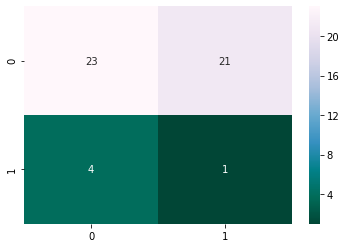

In [825]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_baseline_under_word2vec))
print("f1 Score", f1_score(Y_test, pred_Log_baseline_under_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_baseline_under_word2vec))
cm = confusion_matrix(Y_test, pred_Log_baseline_under_word2vec)
print("precision_score", precision_score(Y_test, pred_Log_baseline_under_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_baseline_under_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [826]:
arr = []
for ind,value in enumerate(pred_Log_baseline_under_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

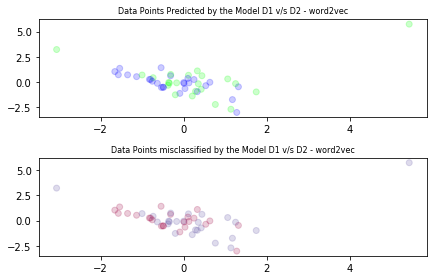

In [827]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_Log_baseline_under_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h2> Other Models - imbalanced dataset </h2>
<h3> Standard Bagging - BoW </h3>

In [831]:
#implementing Standard Bagging - BoW
classifier_Bag_baseline_bow = BaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Bag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Bag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Bag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Bag_baseline_bow.fit(features_1,Y_train)
pred_Bag_baseline_bow = classifier_Bag_baseline_bow.predict(features_11)
pred_Bag_baseline_bow

Accuracy KFold: 0.87 Accuracy RepeatedKFold: 2.64 Accuracy StratifiedKFold: 0.88
Recall KFold: 0.01 Recall RepeatedKFold: 0.04 Recall StratifiedKFold: 0.00
Precision KFold: 0.05 Precision RepeatedKFold: 0.20 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [829]:
pred_Bag_baseline_bow_proba = classifier_Bag_baseline_bow.predict_proba(features_11)
pred_Bag_baseline_bow_log_proba = classifier_Bag_baseline_bow.predict_log_proba(features_11)
print(pred_Bag_baseline_bow_proba,pred_Bag_baseline_bow_log_proba)

[[0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.9 0.1]
 [0.8 0.2]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [0.6 0.4]
 [0.6 0.4]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [0.7 0.3]
 [0.8 0.2]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]] [[-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-4.44089210e-16            -inf]
 [-1.05360516e-01 -2.30258509e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.44089210e-16            -inf]
 [-1.05360516e-01 -2.30258509e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



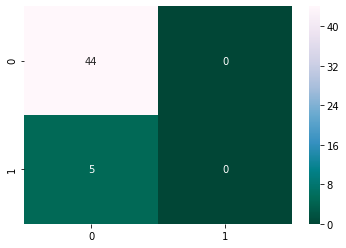

In [832]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Bag_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_Bag_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Bag_baseline_bow))
cm = confusion_matrix(Y_test, pred_Bag_baseline_bow)
print("precision_score", precision_score(Y_test, pred_Bag_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Bag_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [833]:
arr = []
for ind,value in enumerate(pred_Bag_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

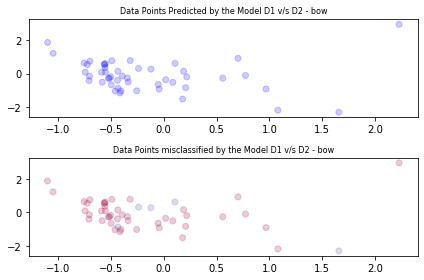

In [834]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Bag_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Standard Bagging - TF-IDF  </h3>

In [835]:
#implementing Standard Bagging - TF-IDF
classifier_Bag_baseline_tfidf = BaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Bag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Bag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Bag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Bag_baseline_tfidf.fit(features_2,Y_train)
pred_Bag_baseline_tfidf = classifier_Bag_baseline_tfidf.predict(features_22)
pred_Bag_baseline_tfidf

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.65 Accuracy StratifiedKFold: 0.88
Recall KFold: 0.00 Recall RepeatedKFold: 0.00 Recall StratifiedKFold: 0.02
Precision KFold: 0.00 Precision RepeatedKFold: 0.00 Precision StratifiedKFold: 0.10


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [836]:
pred_Bag_baseline_tfidf_proba = classifier_Bag_baseline_tfidf.predict_proba(features_22)
pred_Bag_baseline_tfidf_log_proba = classifier_Bag_baseline_tfidf.predict_log_proba(features_22)
print(pred_Bag_baseline_tfidf_proba,pred_Bag_baseline_tfidf_log_proba)

[[1.  0. ]
 [0.8 0.2]
 [0.7 0.3]
 [0.8 0.2]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.7 0.3]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [0.8 0.2]
 [0.5 0.5]
 [0.8 0.2]
 [0.9 0.1]
 [0.7 0.3]
 [0.9 0.1]
 [0.9 0.1]] [[-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-3.56674944e-01 -1.20397280e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.44089210e-16            -inf]
 [-3.56674944e-01 -1.20397280e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-4.

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



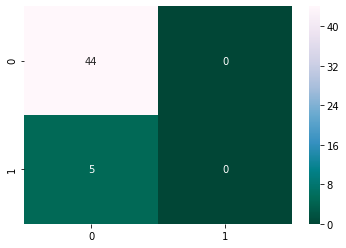

In [837]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Bag_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_Bag_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Bag_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_Bag_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_Bag_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Bag_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [838]:
arr = []
for ind,value in enumerate(pred_Bag_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

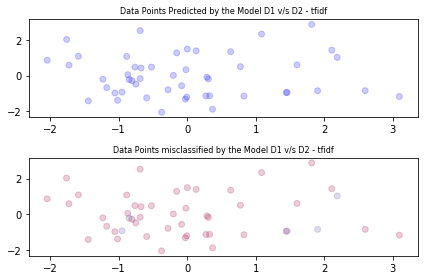

In [839]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Bag_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Standard Bagging - GloVe  </h3>

In [840]:
#implementing Standard Bagging - GloVe
classifier_Bag_baseline_glove = BaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Bag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Bag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Bag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Bag_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_Bag_baseline_glove = classifier_Bag_baseline_glove.predict(X_test_glove_scale)
pred_Bag_baseline_glove

Accuracy KFold: 0.88 Accuracy RepeatedKFold: 2.63 Accuracy StratifiedKFold: 0.88
Recall KFold: 0.01 Recall RepeatedKFold: 0.12 Recall StratifiedKFold: 0.00
Precision KFold: 0.10 Precision RepeatedKFold: 0.38 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [841]:
pred_Bag_baseline_glove_proba = classifier_Bag_baseline_glove.predict_proba(X_test_glove_scale)
pred_Bag_baseline_glove_log_proba = classifier_Bag_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_Bag_baseline_glove_proba,pred_Bag_baseline_glove_log_proba)

[[1.  0. ]
 [0.7 0.3]
 [0.8 0.2]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [0.7 0.3]
 [0.8 0.2]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.5 0.5]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [0.7 0.3]
 [1.  0. ]
 [0.7 0.3]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [0.6 0.4]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.8 0.2]
 [0.4 0.6]
 [0.7 0.3]
 [0.9 0.1]
 [1.  0. ]
 [0.7 0.3]
 [1.  0. ]
 [0.8 0.2]
 [0.7 0.3]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.6 0.4]
 [0.9 0.1]
 [0.9 0.1]
 [0.5 0.5]
 [0.8 0.2]
 [0.9 0.1]
 [0.8 0.2]] [[-4.44089210e-16            -inf]
 [-3.56674944e-01 -1.20397280e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-3.56674944e-01 -1.20397280e+00]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-1.05360516e-01 -2.30258509e+00]
 [-6.93147181e-01 -6.93147181e-01]
 [-5.10825624e-01 -9.16290732e-01]
 [-4.

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.9183673469387755
f1 Score 0.644927536231884
confusion_matrix [[44  0]
 [ 4  1]]
precision_score 0.9583333333333333
recall_score 0.6


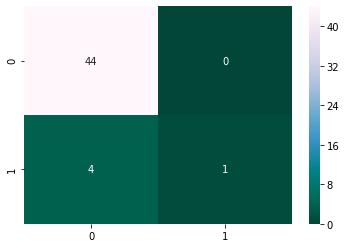

In [842]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Bag_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_Bag_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Bag_baseline_glove))
cm = confusion_matrix(Y_test, pred_Bag_baseline_glove)
print("precision_score", precision_score(Y_test, pred_Bag_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Bag_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [843]:
arr = []
for ind,value in enumerate(pred_Bag_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

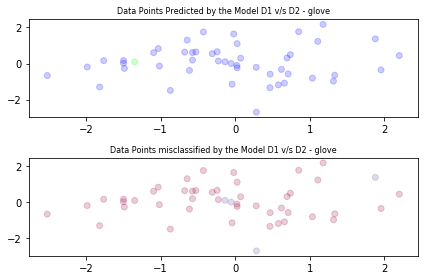

In [844]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_Bag_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Standard Bagging - word2vec  </h3>

In [848]:
#implementing Standard Bagging - word2vec
classifier_Bag_baseline_word2vec = BaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Bag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Bag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Bag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Bag_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_Bag_baseline_word2vec = classifier_Bag_baseline_word2vec.predict(X_test_word2vec_scale)
pred_Bag_baseline_word2vec

Accuracy KFold: 0.88 Accuracy RepeatedKFold: 2.64 Accuracy StratifiedKFold: 0.89
Recall KFold: 0.00 Recall RepeatedKFold: 0.07 Recall StratifiedKFold: 0.00
Precision KFold: 0.00 Precision RepeatedKFold: 0.12 Precision StratifiedKFold: 0.00


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [851]:
pred_Bag_baseline_word2vec_proba = classifier_Bag_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_Bag_baseline_word2vec_log_proba = classifier_Bag_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_Bag_baseline_word2vec_proba,pred_Bag_baseline_word2vec_log_proba)

[[1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.5 0.5]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.5 0.5]
 [0.9 0.1]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [0.5 0.5]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [0.8 0.2]
 [0.7 0.3]
 [0.7 0.3]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.7 0.3]
 [0.7 0.3]
 [0.9 0.1]
 [1.  0. ]
 [0.9 0.1]
 [0.8 0.2]
 [0.9 0.1]
 [1.  0. ]
 [0.7 0.3]] [[-4.44089210e-16            -inf]
 [-4.44089210e-16            -inf]
 [-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-6.93147181e-01 -6.93147181e-01]
 [-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-4.44089210e-16            -inf]
 [-4.44089210e-16            -inf]
 [-2.23143551e-01 -1.60943791e+00]
 [-5.10825624e-01 -9.16290732e-01]
 [-2.

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.8775510204081632
f1 Score 0.4673913043478261
confusion_matrix [[43  1]
 [ 5  0]]
precision_score 0.4479166666666667
recall_score 0.48863636363636365


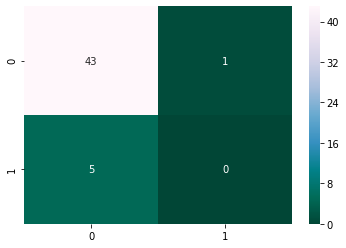

In [852]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Bag_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_Bag_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Bag_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_Bag_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_Bag_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Bag_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [853]:
arr = []
for ind,value in enumerate(pred_Bag_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

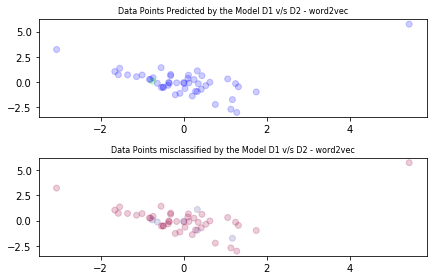

In [854]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_Bag_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Balanced Bagging - BoW </h3>

In [855]:
#implementing Balanced Bagging - BoW
classifier_BBag_baseline_bow = BalancedBaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BBag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BBag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BBag_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BBag_baseline_bow.fit(features_1,Y_train)
pred_BBag_baseline_bow = classifier_BBag_baseline_bow.predict(features_11)
pred_BBag_baseline_bow

Accuracy KFold: 0.71 Accuracy RepeatedKFold: 2.19 Accuracy StratifiedKFold: 0.72
Recall KFold: 0.17 Recall RepeatedKFold: 0.71 Recall StratifiedKFold: 0.17
Precision KFold: 0.08 Precision RepeatedKFold: 0.32 Precision StratifiedKFold: 0.09


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1])

In [856]:
pred_BBag_baseline_bow_proba = classifier_BBag_baseline_bow.predict_proba(features_11)
pred_BBag_baseline_bow_log_proba = classifier_BBag_baseline_bow.predict_log_proba(features_11)
print(pred_BBag_baseline_bow_proba,pred_BBag_baseline_bow_log_proba)

[[0.7 0.3]
 [0.8 0.2]
 [0.5 0.5]
 [0.4 0.6]
 [0.5 0.5]
 [0.7 0.3]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.9 0.1]
 [0.7 0.3]
 [0.4 0.6]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.6 0.4]
 [0.7 0.3]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [0.5 0.5]
 [0.9 0.1]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.4 0.6]
 [0.9 0.1]
 [0.8 0.2]
 [0.7 0.3]
 [0.4 0.6]
 [0.2 0.8]
 [0.7 0.3]
 [0.5 0.5]
 [0.4 0.6]
 [0.3 0.7]
 [0.5 0.5]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.5 0.5]
 [0.8 0.2]
 [0.4 0.6]
 [0.3 0.7]
 [0.5 0.5]
 [0.8 0.2]
 [0.5 0.5]
 [0.7 0.3]
 [0.3 0.7]] [[-0.35667494 -1.2039728 ]
 [-0.22314355 -1.60943791]
 [-0.69314718 -0.69314718]
 [-0.91629073 -0.51082562]
 [-0.69314718 -0.69314718]
 [-0.35667494 -1.2039728 ]
 [-0.22314355 -1.60943791]
 [-0.51082562 -0.91629073]
 [-1.60943791 -0.22314355]
 [-0.10536052 -2.30258509]
 [-0.35667494 -1.2039728 ]
 [-0.91629073 -0.51082562]
 [-0.51082562 -0.91629073]
 [-0.69314718 -0.69314718]
 [-0.69314718 -0.69314718]
 [-0.51082562 -0.91629073]
 [-0.35667494 -1.2039728 ]
 

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.8163265306122449
f1 Score 0.6797385620915033
confusion_matrix [[36  8]
 [ 1  4]]
precision_score 0.6531531531531531
recall_score 0.8090909090909091


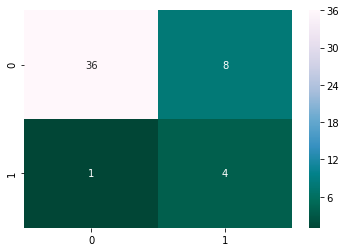

In [857]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BBag_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_BBag_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BBag_baseline_bow))
cm = confusion_matrix(Y_test, pred_BBag_baseline_bow)
print("precision_score", precision_score(Y_test, pred_BBag_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BBag_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [858]:
arr = []
for ind,value in enumerate(pred_BBag_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

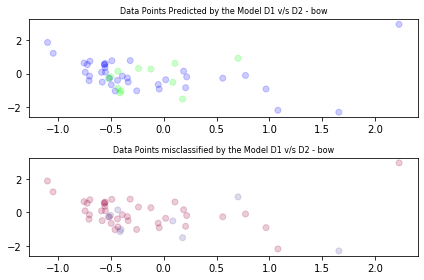

In [859]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_BBag_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Balanced Bagging - TF-IDF  </h3>

In [863]:
#implementing Balanced Bagging - TF-IDF
classifier_BBag_baseline_tfidf = BalancedBaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BBag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BBag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BBag_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BBag_baseline_tfidf.fit(features_2,Y_train)
pred_BBag_baseline_tfidf = classifier_BBag_baseline_tfidf.predict(features_22)
pred_BBag_baseline_tfidf

Accuracy KFold: 0.71 Accuracy RepeatedKFold: 2.16 Accuracy StratifiedKFold: 0.71
Recall KFold: 0.16 Recall RepeatedKFold: 0.82 Recall StratifiedKFold: 0.24
Precision KFold: 0.06 Precision RepeatedKFold: 0.39 Precision StratifiedKFold: 0.10


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1])

In [864]:
pred_BBag_baseline_tfidf_proba = classifier_BBag_baseline_tfidf.predict_proba(features_22)
pred_BBag_baseline_tfidf_log_proba = classifier_BBag_baseline_tfidf.predict_log_proba(features_22)
print(pred_BBag_baseline_tfidf_proba,pred_BBag_baseline_tfidf_log_proba)

[[0.7 0.3]
 [0.6 0.4]
 [0.7 0.3]
 [0.5 0.5]
 [0.4 0.6]
 [0.9 0.1]
 [1.  0. ]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.3 0.7]
 [0.6 0.4]
 [0.8 0.2]
 [0.9 0.1]
 [0.4 0.6]
 [0.7 0.3]
 [0.8 0.2]
 [0.6 0.4]
 [0.3 0.7]
 [0.7 0.3]
 [0.9 0.1]
 [0.4 0.6]
 [0.6 0.4]
 [0.3 0.7]
 [0.9 0.1]
 [0.8 0.2]
 [0.7 0.3]
 [0.7 0.3]
 [0.6 0.4]
 [0.6 0.4]
 [0.9 0.1]
 [0.7 0.3]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [0.5 0.5]
 [0.6 0.4]
 [0.7 0.3]
 [0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.3 0.7]
 [0.7 0.3]
 [0.9 0.1]
 [0.6 0.4]
 [0.7 0.3]
 [0.1 0.9]] [[-3.56674944e-01 -1.20397280e+00]
 [-5.10825624e-01 -9.16290732e-01]
 [-3.56674944e-01 -1.20397280e+00]
 [-6.93147181e-01 -6.93147181e-01]
 [-9.16290732e-01 -5.10825624e-01]
 [-1.05360516e-01 -2.30258509e+00]
 [-4.44089210e-16            -inf]
 [-6.93147181e-01 -6.93147181e-01]
 [-6.93147181e-01 -6.93147181e-01]
 [-6.93147181e-01 -6.93147181e-01]
 [-1.20397280e+00 -3.56674944e-01]
 [-5.10825624e-01 -9.16290732e-01]
 [-2.23143551e-01 -1.60943791e+00]
 [-1.

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.7959183673469388
f1 Score 0.5833333333333333
confusion_matrix [[37  7]
 [ 3  2]]
precision_score 0.5736111111111111
recall_score 0.6204545454545455


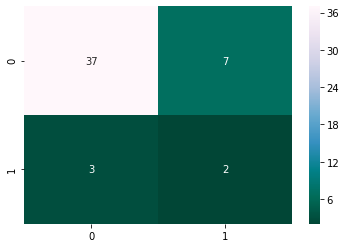

In [865]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BBag_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_BBag_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BBag_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_BBag_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_BBag_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BBag_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [866]:
arr = []
for ind,value in enumerate(pred_BBag_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

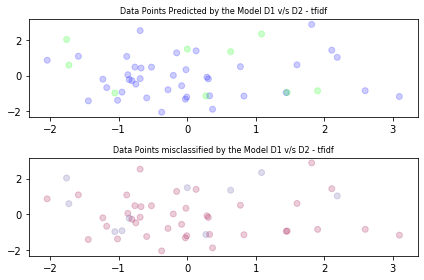

In [867]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_BBag_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Balanced Bagging - GloVe  </h3>

In [871]:
#implementing Balanced Bagging - GloVe
classifier_BBag_baseline_glove = BalancedBaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BBag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BBag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BBag_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BBag_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_BBag_baseline_glove = classifier_BBag_baseline_glove.predict(X_test_glove_scale)
pred_BBag_baseline_glove

Accuracy KFold: 0.76 Accuracy RepeatedKFold: 2.24 Accuracy StratifiedKFold: 0.79
Recall KFold: 0.33 Recall RepeatedKFold: 0.73 Recall StratifiedKFold: 0.24
Precision KFold: 0.17 Precision RepeatedKFold: 0.43 Precision StratifiedKFold: 0.19


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1])

In [872]:
pred_BBag_baseline_glove_proba = classifier_BBag_baseline_glove.predict_proba(X_test_glove_scale)
pred_BBag_baseline_glove_log_proba = classifier_BBag_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_BBag_baseline_glove_proba,pred_BBag_baseline_glove_log_proba)

[[0.5 0.5]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [0.7 0.3]
 [0.9 0.1]
 [0.5 0.5]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.7 0.3]
 [0.5 0.5]
 [0.5 0.5]
 [0.8 0.2]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.8 0.2]
 [0.7 0.3]
 [0.6 0.4]
 [0.9 0.1]
 [0.3 0.7]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.7 0.3]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.7 0.3]
 [0.7 0.3]
 [0.4 0.6]
 [0.7 0.3]
 [0.6 0.4]
 [0.8 0.2]
 [0.6 0.4]
 [0.3 0.7]] [[-0.69314718 -0.69314718]
 [-0.51082562 -0.91629073]
 [-0.35667494 -1.2039728 ]
 [-0.35667494 -1.2039728 ]
 [-0.22314355 -1.60943791]
 [-0.91629073 -0.51082562]
 [-0.91629073 -0.51082562]
 [-0.22314355 -1.60943791]
 [-0.91629073 -0.51082562]
 [-0.35667494 -1.2039728 ]
 [-0.10536052 -2.30258509]
 [-0.69314718 -0.69314718]
 [-0.69314718 -0.69314718]
 [-0.35667494 -1.2039728 ]
 [-0.35667494 -1.2039728 ]
 [-0.51082562 -0.91629073]
 [-0.51082562 -0.91629073]
 

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.7755102040816326
f1 Score 0.5122171945701357
confusion_matrix [[37  7]
 [ 4  1]]
precision_score 0.5137195121951219
recall_score 0.5204545454545455


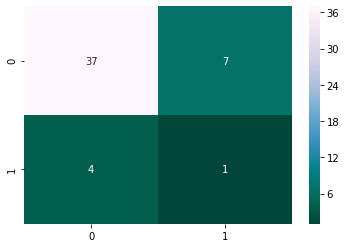

In [873]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BBag_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_BBag_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BBag_baseline_glove))
cm = confusion_matrix(Y_test, pred_BBag_baseline_glove)
print("precision_score", precision_score(Y_test, pred_BBag_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BBag_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [874]:
arr = []
for ind,value in enumerate(pred_BBag_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

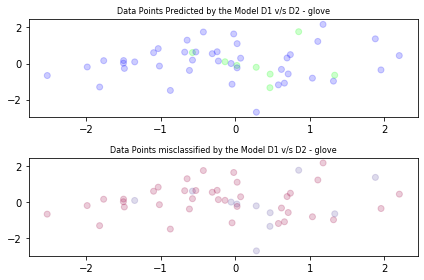

In [875]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_BBag_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Balanced Bagging - word2vec  </h3>

In [876]:
#implementing Balanced Bagging - word2vec
classifier_BBag_baseline_word2vec = BalancedBaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BBag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BBag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BBag_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BBag_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_BBag_baseline_word2vec = classifier_BBag_baseline_word2vec.predict(X_test_word2vec_scale)
pred_BBag_baseline_word2vec

Accuracy KFold: 0.73 Accuracy RepeatedKFold: 2.25 Accuracy StratifiedKFold: 0.73
Recall KFold: 0.18 Recall RepeatedKFold: 0.65 Recall StratifiedKFold: 0.16
Precision KFold: 0.07 Precision RepeatedKFold: 0.31 Precision StratifiedKFold: 0.09


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

In [877]:
pred_BBag_baseline_word2vec_proba = classifier_BBag_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_BBag_baseline_word2vec_log_proba = classifier_BBag_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_BBag_baseline_word2vec_proba,pred_BBag_baseline_word2vec_log_proba)

[[0.4 0.6]
 [0.5 0.5]
 [0.9 0.1]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.6 0.4]
 [0.4 0.6]
 [0.7 0.3]
 [0.7 0.3]
 [0.5 0.5]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.5 0.5]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.8 0.2]
 [0.6 0.4]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.2 0.8]
 [0.9 0.1]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.4 0.6]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.7 0.3]
 [0.4 0.6]
 [0.7 0.3]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.5 0.5]
 [0.3 0.7]
 [0.6 0.4]
 [0.6 0.4]
 [0.7 0.3]
 [0.7 0.3]
 [0.9 0.1]
 [0.6 0.4]
 [0.7 0.3]] [[-0.91629073 -0.51082562]
 [-0.69314718 -0.69314718]
 [-0.10536052 -2.30258509]
 [-0.51082562 -0.91629073]
 [-0.35667494 -1.2039728 ]
 [-0.35667494 -1.2039728 ]
 [-0.51082562 -0.91629073]
 [-0.91629073 -0.51082562]
 [-0.35667494 -1.2039728 ]
 [-0.35667494 -1.2039728 ]
 [-0.69314718 -0.69314718]
 [-0.22314355 -1.60943791]
 [-0.22314355 -1.60943791]
 [-0.51082562 -0.91629073]
 [-0.69314718 -0.69314718]
 [-0.51082562 -0.91629073]
 [-0.69314718 -0.69314718]
 

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:965: RuntimeWarning:

divide by zero encountered in log

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_clas

Accuracy: 0.8571428571428571
f1 Score 0.6415882967607105
confusion_matrix [[40  4]
 [ 3  2]]
precision_score 0.6317829457364341
recall_score 0.6545454545454545


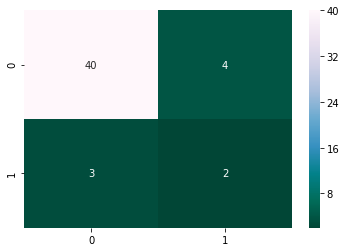

In [878]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BBag_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_BBag_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BBag_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_BBag_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_BBag_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BBag_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [879]:
arr = []
for ind,value in enumerate(pred_BBag_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

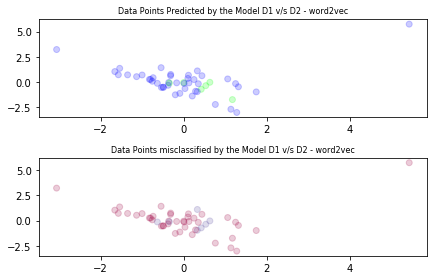

In [880]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_BBag_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> Balanced Random Forest - BoW </h3>

In [884]:
#implementing Balanced Random Forest - BoW
classifier_BRF_baseline_bow = BalancedRandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BRF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BRF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BRF_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BRF_baseline_bow.fit(features_1,Y_train)
pred_BRF_baseline_bow = classifier_BRF_baseline_bow.predict(features_11)
pred_BRF_baseline_bow

Accuracy KFold: 0.53 Accuracy RepeatedKFold: 1.63 Accuracy StratifiedKFold: 0.50
Recall KFold: 0.55 Recall RepeatedKFold: 1.60 Recall StratifiedKFold: 0.52
Precision KFold: 0.11 Precision RepeatedKFold: 0.38 Precision StratifiedKFold: 0.11


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1])

In [885]:
pred_BRF_baseline_bow_proba = classifier_BRF_baseline_bow.predict_proba(features_11)
pred_BRF_baseline_bow_log_proba = classifier_BRF_baseline_bow.predict_log_proba(features_11)
print(pred_BRF_baseline_bow_proba,pred_BRF_baseline_bow_log_proba)

[[0.46 0.54]
 [0.58 0.42]
 [0.52 0.48]
 [0.5  0.5 ]
 [0.54 0.46]
 [0.56 0.44]
 [0.48 0.52]
 [0.57 0.43]
 [0.46 0.54]
 [0.57 0.43]
 [0.53 0.47]
 [0.51 0.49]
 [0.49 0.51]
 [0.5  0.5 ]
 [0.51 0.49]
 [0.7  0.3 ]
 [0.48 0.52]
 [0.51 0.49]
 [0.6  0.4 ]
 [0.6  0.4 ]
 [0.5  0.5 ]
 [0.55 0.45]
 [0.49 0.51]
 [0.47 0.53]
 [0.53 0.47]
 [0.52 0.48]
 [0.41 0.59]
 [0.48 0.52]
 [0.53 0.47]
 [0.51 0.49]
 [0.5  0.5 ]
 [0.43 0.57]
 [0.4  0.6 ]
 [0.51 0.49]
 [0.42 0.58]
 [0.54 0.46]
 [0.47 0.53]
 [0.55 0.45]
 [0.45 0.55]
 [0.43 0.57]
 [0.58 0.42]
 [0.57 0.43]
 [0.51 0.49]
 [0.39 0.61]
 [0.45 0.55]
 [0.56 0.44]
 [0.49 0.51]
 [0.58 0.42]
 [0.49 0.51]] [[-0.77652879 -0.61618614]
 [-0.54472718 -0.86750057]
 [-0.65392647 -0.73396918]
 [-0.69314718 -0.69314718]
 [-0.61618614 -0.77652879]
 [-0.5798185  -0.82098055]
 [-0.73396918 -0.65392647]
 [-0.56211892 -0.84397007]
 [-0.77652879 -0.61618614]
 [-0.56211892 -0.84397007]
 [-0.63487827 -0.75502258]
 [-0.67334455 -0.71334989]
 [-0.71334989 -0.67334455]
 [-0.693147

Accuracy: 0.673469387755102
f1 Score 0.5585585585585585
confusion_matrix [[29 15]
 [ 1  4]]
precision_score 0.5885964912280701
recall_score 0.7295454545454545


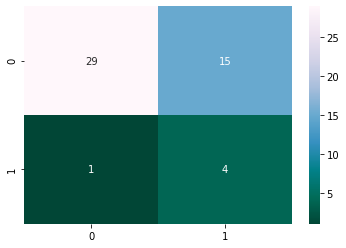

In [886]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BRF_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_BRF_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BRF_baseline_bow))
cm = confusion_matrix(Y_test, pred_BRF_baseline_bow)
print("precision_score", precision_score(Y_test, pred_BRF_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BRF_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [887]:
arr = []
for ind,value in enumerate(pred_BRF_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

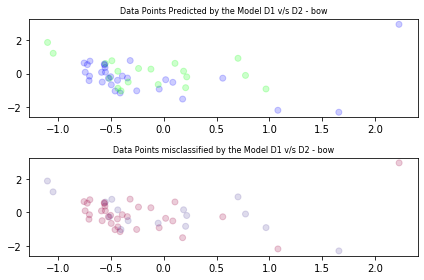

In [888]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_BRF_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Balanced Random Forest - TF-IDF </h3>

In [895]:
#implementing Balanced Random Forest - TF-IDF
classifier_BRF_baseline_tfidf = BalancedRandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BRF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BRF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BRF_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BRF_baseline_tfidf.fit(features_2,Y_train)
pred_BRF_baseline_tfidf = classifier_BRF_baseline_tfidf.predict(features_22)
pred_BRF_baseline_tfidf

Accuracy KFold: 0.57 Accuracy RepeatedKFold: 1.59 Accuracy StratifiedKFold: 0.58
Recall KFold: 0.50 Recall RepeatedKFold: 1.41 Recall StratifiedKFold: 0.51
Precision KFold: 0.12 Precision RepeatedKFold: 0.34 Precision StratifiedKFold: 0.13


array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [896]:
pred_BRF_baseline_tfidf_proba = classifier_BRF_baseline_tfidf.predict_proba(features_22)
pred_BRF_baseline_tfidf_log_proba = classifier_BRF_baseline_tfidf.predict_log_proba(features_22)
print(pred_BRF_baseline_tfidf_proba,pred_BRF_baseline_tfidf_log_proba)

[[0.64 0.36]
 [0.62 0.38]
 [0.46 0.54]
 [0.46 0.54]
 [0.48 0.52]
 [0.64 0.36]
 [0.43 0.57]
 [0.64 0.36]
 [0.55 0.45]
 [0.55 0.45]
 [0.57 0.43]
 [0.62 0.38]
 [0.4  0.6 ]
 [0.53 0.47]
 [0.5  0.5 ]
 [0.52 0.48]
 [0.65 0.35]
 [0.5  0.5 ]
 [0.31 0.69]
 [0.54 0.46]
 [0.63 0.37]
 [0.43 0.57]
 [0.41 0.59]
 [0.47 0.53]
 [0.59 0.41]
 [0.42 0.58]
 [0.44 0.56]
 [0.51 0.49]
 [0.61 0.39]
 [0.54 0.46]
 [0.43 0.57]
 [0.51 0.49]
 [0.5  0.5 ]
 [0.46 0.54]
 [0.32 0.68]
 [0.59 0.41]
 [0.52 0.48]
 [0.57 0.43]
 [0.61 0.39]
 [0.48 0.52]
 [0.63 0.37]
 [0.55 0.45]
 [0.61 0.39]
 [0.34 0.66]
 [0.55 0.45]
 [0.54 0.46]
 [0.5  0.5 ]
 [0.51 0.49]
 [0.51 0.49]] [[-0.4462871  -1.02165125]
 [-0.4780358  -0.96758403]
 [-0.77652879 -0.61618614]
 [-0.77652879 -0.61618614]
 [-0.73396918 -0.65392647]
 [-0.4462871  -1.02165125]
 [-0.84397007 -0.56211892]
 [-0.4462871  -1.02165125]
 [-0.597837   -0.7985077 ]
 [-0.597837   -0.7985077 ]
 [-0.56211892 -0.84397007]
 [-0.4780358  -0.96758403]
 [-0.91629073 -0.51082562]
 [-0.634878

Accuracy: 0.6938775510204082
f1 Score 0.5454545454545454
confusion_matrix [[31 13]
 [ 2  3]]
precision_score 0.5634469696969697
recall_score 0.6522727272727273


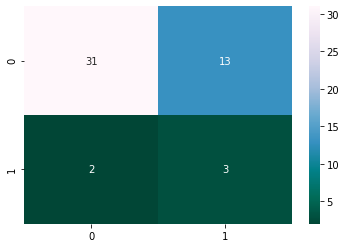

In [897]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BRF_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_BRF_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BRF_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_BRF_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_BRF_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BRF_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [898]:
arr = []
for ind,value in enumerate(pred_BRF_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

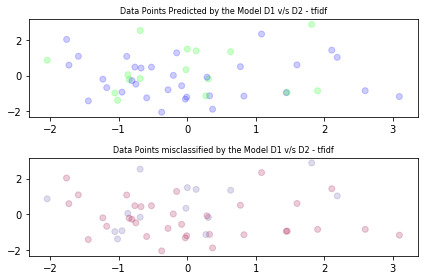

In [899]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_BRF_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Balanced Random Forest - GloVe </h3>

In [906]:
#implementing Balanced Random Forest - GloVe
classifier_BRF_baseline_glove = BalancedRandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BRF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BRF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BRF_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BRF_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_BRF_baseline_glove = classifier_BRF_baseline_glove.predict(X_test_glove_scale)
pred_BRF_baseline_glove

Accuracy KFold: 0.57 Accuracy RepeatedKFold: 1.78 Accuracy StratifiedKFold: 0.56
Recall KFold: 0.48 Recall RepeatedKFold: 1.74 Recall StratifiedKFold: 0.60
Precision KFold: 0.13 Precision RepeatedKFold: 0.46 Precision StratifiedKFold: 0.14


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0])

In [907]:
pred_BRF_baseline_glove_proba = classifier_BRF_baseline_glove.predict_proba(X_test_glove_scale)
pred_BRF_baseline_glove_log_proba = classifier_BRF_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_BRF_baseline_glove_proba,pred_BRF_baseline_glove_log_proba)

[[0.39 0.61]
 [0.51 0.49]
 [0.61 0.39]
 [0.42 0.58]
 [0.47 0.53]
 [0.47 0.53]
 [0.41 0.59]
 [0.45 0.55]
 [0.52 0.48]
 [0.59 0.41]
 [0.67 0.33]
 [0.49 0.51]
 [0.41 0.59]
 [0.52 0.48]
 [0.43 0.57]
 [0.58 0.42]
 [0.49 0.51]
 [0.47 0.53]
 [0.56 0.44]
 [0.56 0.44]
 [0.47 0.53]
 [0.58 0.42]
 [0.44 0.56]
 [0.36 0.64]
 [0.66 0.34]
 [0.51 0.49]
 [0.42 0.58]
 [0.39 0.61]
 [0.52 0.48]
 [0.5  0.5 ]
 [0.61 0.39]
 [0.6  0.4 ]
 [0.52 0.48]
 [0.41 0.59]
 [0.46 0.54]
 [0.54 0.46]
 [0.5  0.5 ]
 [0.61 0.39]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.44 0.56]
 [0.47 0.53]
 [0.47 0.53]
 [0.49 0.51]
 [0.54 0.46]
 [0.49 0.51]
 [0.69 0.31]
 [0.55 0.45]
 [0.5  0.5 ]] [[-0.94160854 -0.49429632]
 [-0.67334455 -0.71334989]
 [-0.49429632 -0.94160854]
 [-0.86750057 -0.54472718]
 [-0.75502258 -0.63487827]
 [-0.75502258 -0.63487827]
 [-0.89159812 -0.52763274]
 [-0.7985077  -0.597837  ]
 [-0.65392647 -0.73396918]
 [-0.52763274 -0.89159812]
 [-0.40047757 -1.10866262]
 [-0.71334989 -0.67334455]
 [-0.89159812 -0.52763274]
 [-0.653926

Accuracy: 0.5510204081632653
f1 Score 0.4715686274509804
confusion_matrix [[23 21]
 [ 1  4]]
precision_score 0.5591666666666667
recall_score 0.6613636363636364


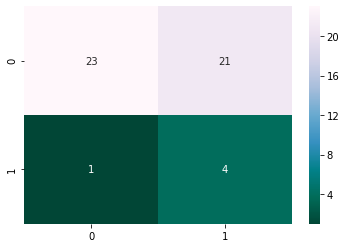

In [908]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BRF_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_BRF_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BRF_baseline_glove))
cm = confusion_matrix(Y_test, pred_BRF_baseline_glove)
print("precision_score", precision_score(Y_test, pred_BRF_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BRF_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [909]:
arr = []
for ind,value in enumerate(pred_BRF_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

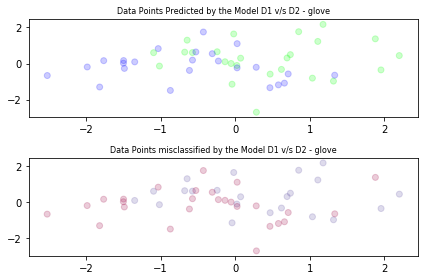

In [910]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_BRF_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> Balanced Random Forest - word2vec </h3>

In [917]:
#implementing Balanced Random Forest - GloVe
classifier_BRF_baseline_word2vec = BalancedRandomForestClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_BRF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_BRF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_BRF_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_BRF_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_BRF_baseline_word2vec = classifier_BRF_baseline_word2vec.predict(X_test_word2vec_scale)
pred_BRF_baseline_word2vec

Accuracy KFold: 0.58 Accuracy RepeatedKFold: 1.72 Accuracy StratifiedKFold: 0.60
Recall KFold: 0.44 Recall RepeatedKFold: 1.70 Recall StratifiedKFold: 0.61
Precision KFold: 0.11 Precision RepeatedKFold: 0.42 Precision StratifiedKFold: 0.16


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1])

In [918]:
pred_BRF_baseline_word2vec_proba = classifier_BRF_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_BRF_baseline_word2vec_log_proba = classifier_BRF_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_BRF_baseline_word2vec_proba,pred_BRF_baseline_word2vec_log_proba)

[[0.3  0.7 ]
 [0.55 0.45]
 [0.57 0.43]
 [0.44 0.56]
 [0.44 0.56]
 [0.47 0.53]
 [0.41 0.59]
 [0.48 0.52]
 [0.58 0.42]
 [0.54 0.46]
 [0.67 0.33]
 [0.47 0.53]
 [0.3  0.7 ]
 [0.55 0.45]
 [0.55 0.45]
 [0.65 0.35]
 [0.44 0.56]
 [0.5  0.5 ]
 [0.46 0.54]
 [0.59 0.41]
 [0.47 0.53]
 [0.58 0.42]
 [0.44 0.56]
 [0.47 0.53]
 [0.6  0.4 ]
 [0.54 0.46]
 [0.42 0.58]
 [0.44 0.56]
 [0.5  0.5 ]
 [0.56 0.44]
 [0.54 0.46]
 [0.51 0.49]
 [0.45 0.55]
 [0.49 0.51]
 [0.46 0.54]
 [0.55 0.45]
 [0.48 0.52]
 [0.61 0.39]
 [0.42 0.58]
 [0.49 0.51]
 [0.58 0.42]
 [0.51 0.49]
 [0.42 0.58]
 [0.47 0.53]
 [0.49 0.51]
 [0.5  0.5 ]
 [0.71 0.29]
 [0.54 0.46]
 [0.46 0.54]] [[-1.2039728  -0.35667494]
 [-0.597837   -0.7985077 ]
 [-0.56211892 -0.84397007]
 [-0.82098055 -0.5798185 ]
 [-0.82098055 -0.5798185 ]
 [-0.75502258 -0.63487827]
 [-0.89159812 -0.52763274]
 [-0.73396918 -0.65392647]
 [-0.54472718 -0.86750057]
 [-0.61618614 -0.77652879]
 [-0.40047757 -1.10866262]
 [-0.75502258 -0.63487827]
 [-1.2039728  -0.35667494]
 [-0.597837

Accuracy: 0.5102040816326531
f1 Score 0.4235294117647059
confusion_matrix [[22 22]
 [ 2  3]]
precision_score 0.5183333333333333
recall_score 0.55


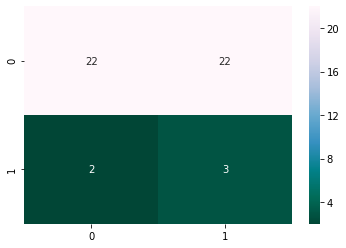

In [919]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_BRF_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_BRF_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_BRF_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_BRF_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_BRF_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_BRF_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [920]:
arr = []
for ind,value in enumerate(pred_BRF_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

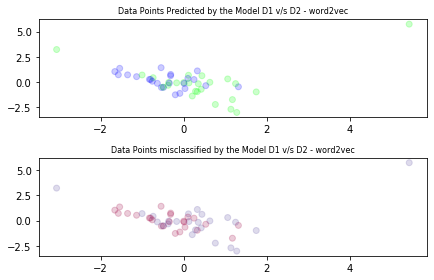

In [921]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_BRF_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h3> EasyEnsemble - BoW </h3>

In [922]:
#implementing EasyEnsemble - BoW
classifier_Easy_baseline_bow = EasyEnsembleClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Easy_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Easy_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Easy_baseline_bow, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Easy_baseline_bow.fit(features_1,Y_train)
pred_Easy_baseline_bow = classifier_Easy_baseline_bow.predict(features_11)
pred_Easy_baseline_bow

Accuracy KFold: 0.49 Accuracy RepeatedKFold: 1.52 Accuracy StratifiedKFold: 0.49
Recall KFold: 0.57 Recall RepeatedKFold: 1.44 Recall StratifiedKFold: 0.50
Precision KFold: 0.12 Precision RepeatedKFold: 0.32 Precision StratifiedKFold: 0.10


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1])

In [923]:
pred_Easy_baseline_bow_proba = classifier_Easy_baseline_bow.predict_proba(features_11)
pred_Easy_baseline_bow_log_proba = classifier_Easy_baseline_bow.predict_log_proba(features_11)
print(pred_Easy_baseline_bow_proba,pred_Easy_baseline_bow_log_proba)

[[0.48664982 0.51335018]
 [0.52915518 0.47084482]
 [0.50419186 0.49580814]
 [0.51254817 0.48745183]
 [0.50861859 0.49138141]
 [0.55476932 0.44523068]
 [0.48635744 0.51364256]
 [0.5384677  0.4615323 ]
 [0.48422912 0.51577088]
 [0.5324173  0.4675827 ]
 [0.51276128 0.48723872]
 [0.46848649 0.53151351]
 [0.4843605  0.5156395 ]
 [0.47281014 0.52718986]
 [0.52713646 0.47286354]
 [0.53576283 0.46423717]
 [0.52160622 0.47839378]
 [0.46662116 0.53337884]
 [0.53639123 0.46360877]
 [0.53300043 0.46699957]
 [0.50630785 0.49369215]
 [0.49017192 0.50982808]
 [0.45649565 0.54350435]
 [0.46505879 0.53494121]
 [0.54398873 0.45601127]
 [0.51576599 0.48423401]
 [0.4636829  0.5363171 ]
 [0.51163655 0.48836345]
 [0.55119596 0.44880404]
 [0.50844961 0.49155039]
 [0.53223127 0.46776873]
 [0.50056223 0.49943777]
 [0.49204427 0.50795573]
 [0.50966831 0.49033169]
 [0.44723204 0.55276796]
 [0.53252591 0.46747409]
 [0.52469095 0.47530905]
 [0.52540736 0.47459264]
 [0.49468766 0.50531234]
 [0.44562473 0.55437527]


Accuracy: 0.6530612244897959
f1 Score 0.5171014492753623
confusion_matrix [[29 15]
 [ 2  3]]
precision_score 0.5510752688172043
recall_score 0.6295454545454545


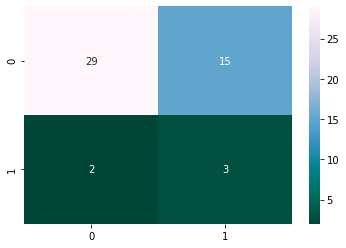

In [924]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Easy_baseline_bow))
print("f1 Score", f1_score(Y_test, pred_Easy_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Easy_baseline_bow))
cm = confusion_matrix(Y_test, pred_Easy_baseline_bow)
print("precision_score", precision_score(Y_test, pred_Easy_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Easy_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [925]:
arr = []
for ind,value in enumerate(pred_Easy_baseline_bow):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

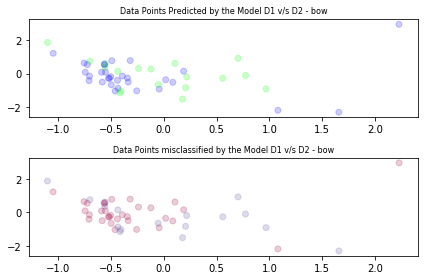

In [926]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Easy_baseline_bow, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> EasyEnsemble - TF-IDF </h3>

In [927]:
#implementing EasyEnsemble - TF-IDF
classifier_Easy_baseline_tfidf = EasyEnsembleClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Easy_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Easy_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Easy_baseline_tfidf, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Easy_baseline_tfidf.fit(features_2,Y_train)
pred_Easy_baseline_tfidf = classifier_Easy_baseline_tfidf.predict(features_22)
pred_Easy_baseline_tfidf

Accuracy KFold: 0.50 Accuracy RepeatedKFold: 1.51 Accuracy StratifiedKFold: 0.50
Recall KFold: 0.53 Recall RepeatedKFold: 1.70 Recall StratifiedKFold: 0.56
Precision KFold: 0.11 Precision RepeatedKFold: 0.35 Precision StratifiedKFold: 0.12


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0])

In [928]:
pred_Easy_baseline_tfidf_proba = classifier_Easy_baseline_tfidf.predict_proba(features_22)
pred_Easy_baseline_tfidf_log_proba = classifier_Easy_baseline_tfidf.predict_log_proba(features_22)
print(pred_Easy_baseline_tfidf_proba,pred_Easy_baseline_tfidf_log_proba)

[[0.65888051 0.34111949]
 [0.52496272 0.47503728]
 [0.61616872 0.38383128]
 [0.50072345 0.49927655]
 [0.51965572 0.48034428]
 [0.59611612 0.40388388]
 [0.50252379 0.49747621]
 [0.50959123 0.49040877]
 [0.51688714 0.48311286]
 [0.49110505 0.50889495]
 [0.59330198 0.40669802]
 [0.47271463 0.52728537]
 [0.48966744 0.51033256]
 [0.47831611 0.52168389]
 [0.48827114 0.51172886]
 [0.46450618 0.53549382]
 [0.5338417  0.4661583 ]
 [0.50677753 0.49322247]
 [0.47007641 0.52992359]
 [0.48811153 0.51188847]
 [0.62496947 0.37503053]
 [0.58618384 0.41381616]
 [0.55398147 0.44601853]
 [0.45675847 0.54324153]
 [0.54790691 0.45209309]
 [0.49865909 0.50134091]
 [0.49840477 0.50159523]
 [0.50717457 0.49282543]
 [0.5974932  0.4025068 ]
 [0.51129082 0.48870918]
 [0.52073761 0.47926239]
 [0.5191399  0.4808601 ]
 [0.48168232 0.51831768]
 [0.50617748 0.49382252]
 [0.38746065 0.61253935]
 [0.55354812 0.44645188]
 [0.54207264 0.45792736]
 [0.51985333 0.48014667]
 [0.51627916 0.48372084]
 [0.50246883 0.49753117]


Accuracy: 0.7346938775510204
f1 Score 0.6060606060606061
confusion_matrix [[32 12]
 [ 1  4]]
precision_score 0.6098484848484849
recall_score 0.7636363636363637


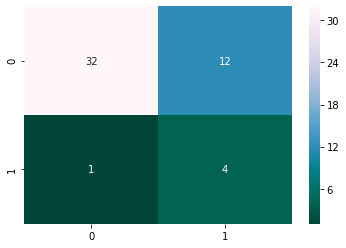

In [929]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Easy_baseline_tfidf))
print("f1 Score", f1_score(Y_test, pred_Easy_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Easy_baseline_tfidf))
cm = confusion_matrix(Y_test, pred_Easy_baseline_tfidf)
print("precision_score", precision_score(Y_test, pred_Easy_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Easy_baseline_tfidf,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [930]:
arr = []
for ind,value in enumerate(pred_Easy_baseline_tfidf):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

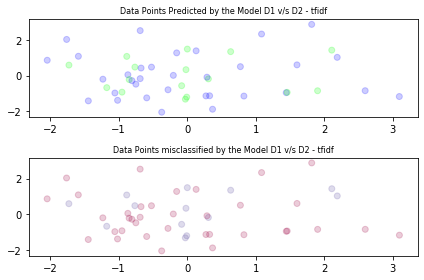

In [931]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Easy_baseline_tfidf, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> EasyEnsemble - GloVe</h3>

In [932]:
#implementing EasyEnsemble - GloVe
classifier_Easy_baseline_glove = EasyEnsembleClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Easy_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Easy_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Easy_baseline_glove, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Easy_baseline_glove.fit(X_train_glove_scale,Y_train)
pred_Easy_baseline_glove = classifier_Easy_baseline_glove.predict(X_test_glove_scale)
pred_Easy_baseline_glove

Accuracy KFold: 0.56 Accuracy RepeatedKFold: 1.71 Accuracy StratifiedKFold: 0.56
Recall KFold: 0.58 Recall RepeatedKFold: 1.79 Recall StratifiedKFold: 0.55
Precision KFold: 0.13 Precision RepeatedKFold: 0.40 Precision StratifiedKFold: 0.13


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0])

In [933]:
pred_Easy_baseline_glove_proba = classifier_Easy_baseline_glove.predict_proba(X_test_glove_scale)
pred_Easy_baseline_glove_log_proba = classifier_Easy_baseline_glove.predict_log_proba(X_test_glove_scale)
print(pred_Easy_baseline_glove_proba,pred_Easy_baseline_glove_log_proba)

[[0.50487171 0.49512829]
 [0.54084093 0.45915907]
 [0.58719297 0.41280703]
 [0.48118715 0.51881285]
 [0.49775432 0.50224568]
 [0.50773006 0.49226994]
 [0.48847038 0.51152962]
 [0.51644294 0.48355706]
 [0.48812388 0.51187612]
 [0.51228293 0.48771707]
 [0.62349474 0.37650526]
 [0.52304588 0.47695412]
 [0.45496233 0.54503767]
 [0.4979641  0.5020359 ]
 [0.46150783 0.53849217]
 [0.56353096 0.43646904]
 [0.49697339 0.50302661]
 [0.48781901 0.51218099]
 [0.51297962 0.48702038]
 [0.57333222 0.42666778]
 [0.47046905 0.52953095]
 [0.48171252 0.51828748]
 [0.45597498 0.54402502]
 [0.43775628 0.56224372]
 [0.58462272 0.41537728]
 [0.53963463 0.46036537]
 [0.51661641 0.48338359]
 [0.46933549 0.53066451]
 [0.51286435 0.48713565]
 [0.50678603 0.49321397]
 [0.54159499 0.45840501]
 [0.52921765 0.47078235]
 [0.49614083 0.50385917]
 [0.50701413 0.49298587]
 [0.5646156  0.4353844 ]
 [0.51782433 0.48217567]
 [0.48578067 0.51421933]
 [0.54127418 0.45872582]
 [0.47411595 0.52588405]
 [0.55054328 0.44945672]


Accuracy: 0.5510204081632653
f1 Score 0.3930180180180181
confusion_matrix [[26 18]
 [ 4  1]]
precision_score 0.45964912280701753
recall_score 0.3954545454545455


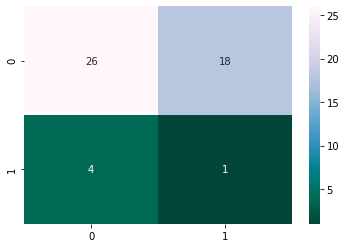

In [934]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Easy_baseline_glove))
print("f1 Score", f1_score(Y_test, pred_Easy_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Easy_baseline_glove))
cm = confusion_matrix(Y_test, pred_Easy_baseline_glove)
print("precision_score", precision_score(Y_test, pred_Easy_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Easy_baseline_glove,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [935]:
arr = []
for ind,value in enumerate(pred_Easy_baseline_glove):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

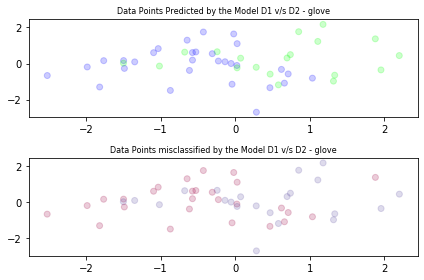

In [936]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=pred_Easy_baseline_glove, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> EasyEnsemble - word2vec</h3>

In [937]:
#implementing EasyEnsemble - word2vec
classifier_Easy_baseline_word2vec = EasyEnsembleClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(classifier_Easy_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(classifier_Easy_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(classifier_Easy_baseline_word2vec, X_train_word2vec_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

classifier_Easy_baseline_word2vec.fit(X_train_word2vec_scale,Y_train)
pred_Easy_baseline_word2vec = classifier_Easy_baseline_word2vec.predict(X_test_word2vec_scale)
pred_Easy_baseline_word2vec

Accuracy KFold: 0.55 Accuracy RepeatedKFold: 1.67 Accuracy StratifiedKFold: 0.57
Recall KFold: 0.48 Recall RepeatedKFold: 1.76 Recall StratifiedKFold: 0.57
Precision KFold: 0.12 Precision RepeatedKFold: 0.41 Precision StratifiedKFold: 0.13


array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0])

In [938]:
pred_Easy_baseline_word2vec_proba = classifier_Easy_baseline_word2vec.predict_proba(X_test_word2vec_scale)
pred_Easy_baseline_word2vec_log_proba = classifier_Easy_baseline_word2vec.predict_log_proba(X_test_word2vec_scale)
print(pred_Easy_baseline_word2vec_proba,pred_Easy_baseline_word2vec_log_proba)

[[0.47944692 0.52055308]
 [0.52853008 0.47146992]
 [0.57848167 0.42151833]
 [0.46605349 0.53394651]
 [0.47503476 0.52496524]
 [0.45964844 0.54035156]
 [0.43783823 0.56216177]
 [0.50172211 0.49827789]
 [0.50210423 0.49789577]
 [0.49668167 0.50331833]
 [0.60543987 0.39456013]
 [0.53917585 0.46082415]
 [0.46550517 0.53449483]
 [0.50364393 0.49635607]
 [0.49782566 0.50217434]
 [0.57172081 0.42827919]
 [0.47812306 0.52187694]
 [0.52770962 0.47229038]
 [0.4266706  0.5733294 ]
 [0.56511371 0.43488629]
 [0.45712647 0.54287353]
 [0.48402307 0.51597693]
 [0.49071248 0.50928752]
 [0.44249392 0.55750608]
 [0.58043298 0.41956702]
 [0.52453024 0.47546976]
 [0.46821397 0.53178603]
 [0.42655661 0.57344339]
 [0.49405136 0.50594864]
 [0.47317713 0.52682287]
 [0.53011896 0.46988104]
 [0.52568129 0.47431871]
 [0.48120281 0.51879719]
 [0.51703563 0.48296437]
 [0.50033431 0.49966569]
 [0.55701422 0.44298578]
 [0.48043173 0.51956827]
 [0.62125137 0.37874863]
 [0.43632034 0.56367966]
 [0.48645677 0.51354323]


Accuracy: 0.4897959183673469
f1 Score 0.41020702936928266
confusion_matrix [[21 23]
 [ 2  3]]
precision_score 0.5142140468227424
recall_score 0.5386363636363636


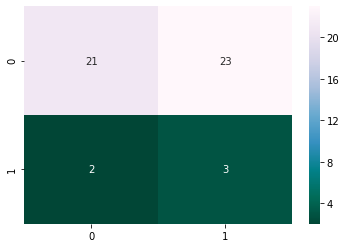

In [939]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Easy_baseline_word2vec))
print("f1 Score", f1_score(Y_test, pred_Easy_baseline_word2vec,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Easy_baseline_word2vec))
cm = confusion_matrix(Y_test, pred_Easy_baseline_word2vec)
print("precision_score", precision_score(Y_test, pred_Easy_baseline_word2vec,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Easy_baseline_word2vec,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [940]:
arr = []
for ind,value in enumerate(pred_Easy_baseline_word2vec):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

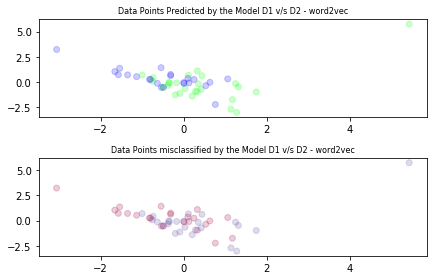

In [942]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=pred_Easy_baseline_word2vec, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_word2vec_scale_1[:,0], X_test_word2vec_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - word2vec",fontdict = font1)
plt.tight_layout()

<h2> Hyper parameter tuning</h2>
<h3> Tuning Hyper parameter for Logistic Regression - TF-IDF (Over sampled) </h3>

In [1082]:
#Tuning the hyper parameters for Logistic Regression - BoW using GridSearchCV
param_rand = {"C": [0.00001, 0.0001,0.001,0.01,0.1,1,10,100,1000], "solver": ["liblinear","lbfgs"], "penalty": ["l2","elasticnet"]}

Log_tfidf_hyper_over = LogisticRegression()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(Log_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(Log_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(Log_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

Log_tfidf_over = GridSearchCV(estimator=Log_tfidf_hyper_over, param_grid=param_rand, cv=cv2, n_jobs=-1,verbose=1)
Log_tfidf_Hyper_over = Log_tfidf_over.fit(X2,Y2)

print(Log_tfidf_Hyper_over.best_score_)
print(Log_tfidf_Hyper_over.best_params_)

Accuracy KFold: 0.77 Accuracy RepeatedKFold: 2.30 Accuracy StratifiedKFold: 0.77
Recall KFold: 0.82 Recall RepeatedKFold: 2.44 Recall StratifiedKFold: 0.82
Precision KFold: 0.75 Precision RepeatedKFold: 2.23 Precision StratifiedKFold: 0.75
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    0.9s


0.7798035298035298
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.6s finished


In [1083]:
#implementing Logistic Regression - BoW
classifier_Log_tfidf_final = LogisticRegression(C=10, penalty='l2', solver='lbfgs')
classifier_Log_tfidf_final.fit(X2,Y2)
pred_Log_tfidf_final = classifier_Log_tfidf_final.predict(features_22)
pred_Log_tfidf_final

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

Accuracy: 0.8571428571428571
f1 Score 0.6415882967607105
confusion_matrix [[40  4]
 [ 3  2]]
precision_score 0.6317829457364341
recall_score 0.6545454545454545


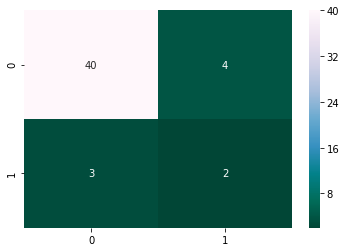

In [1084]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Log_tfidf_final))
print("f1 Score", f1_score(Y_test, pred_Log_tfidf_final,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Log_tfidf_final))
cm = confusion_matrix(Y_test, pred_Log_tfidf_final)
print("precision_score", precision_score(Y_test, pred_Log_tfidf_final,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Log_tfidf_final,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [1085]:
arr = []
for ind,value in enumerate(pred_Log_tfidf_final):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

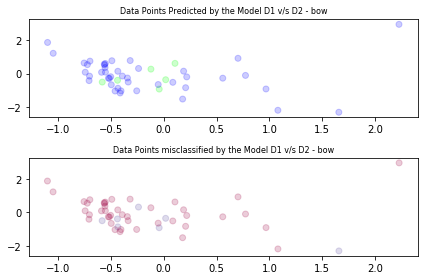

In [1086]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=pred_Log_tfidf_final, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Tuning Hyper parameter for Multinomial Naive Bayes - TF-IDF (oversampled)</h3>

In [1087]:
#Tuning the hyper parameters for Multinomial Naive Bayes - TF-IDF using GridSearchCV
param_rand = {"alpha": [0.00001, 0.0001,0.001,0.01,0.1,1,10,100,1000]}

MNB_tfidf_hyper_over = MultinomialNB()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(MNB_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(MNB_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(MNB_tfidf_hyper_over, X2, Y2, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

MNB_tfidf_over = GridSearchCV(estimator=MNB_tfidf_hyper_over, param_grid=param_rand, cv=cv2, n_jobs=-1,verbose=1)
MNB_tfidf_Hyper_over = MNB_tfidf_over.fit(X2,Y2)

print(MNB_tfidf_Hyper_over.best_score_)
print(MNB_tfidf_Hyper_over.best_params_)

Accuracy KFold: 0.72 Accuracy RepeatedKFold: 2.19 Accuracy StratifiedKFold: 0.73
Recall KFold: 0.76 Recall RepeatedKFold: 2.28 Recall StratifiedKFold: 0.76
Precision KFold: 0.70 Precision RepeatedKFold: 2.16 Precision StratifiedKFold: 0.72
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7293373293373293
{'alpha': 1e-05}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.2s finished


In [1088]:
#implementing Multinomial Naive Bayes - TF-IDF
classifier_MNB_tfidf_over_final = MultinomialNB(alpha=0.00001)
classifier_MNB_tfidf_over_final.fit(X2,Y2)
pred_MNB_tfidf_over_final = classifier_MNB_tfidf_over_final.predict(features_22)
pred_MNB_tfidf_over_final

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1])

Accuracy: 0.8163265306122449
f1 Score 0.6457831325301204
confusion_matrix [[37  7]
 [ 2  3]]
precision_score 0.6243589743589744
recall_score 0.7204545454545455


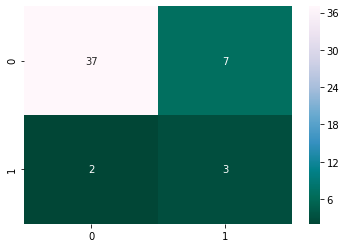

In [1089]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_MNB_tfidf_over_final))
print("f1 Score", f1_score(Y_test, pred_MNB_tfidf_over_final,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_MNB_tfidf_over_final))
cm = confusion_matrix(Y_test, pred_MNB_tfidf_over_final)
print("precision_score", precision_score(Y_test, pred_MNB_tfidf_over_final,average = "macro"))
print("recall_score", recall_score(Y_test, pred_MNB_tfidf_over_final,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [1090]:
arr = []
for ind,value in enumerate(pred_MNB_tfidf_over_final):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

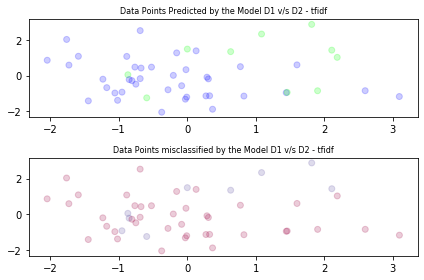

In [1091]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_MNB_tfidf_over_final, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

<h3> Balanced Bagging - BoW - hyper </h3>

In [1092]:
#Tuning the hyper parameters for Multinomial Naive Bayes - TF-IDF using GridSearchCV
param_rand = {"n_estimators": np.arange(0,1000,100)}

BalB_bow_hyper = BalancedBaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(BalB_bow_hyper, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(BalB_bow_hyper, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(BalB_bow_hyper, features_1, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

BalB_bow_hyper_final = GridSearchCV(estimator=BalB_bow_hyper, param_grid=param_rand, cv=cv2, n_jobs=-1,verbose=1)
BalB_bow_hyper_Final = BalB_bow_hyper_final.fit(features_1,Y_train)

print(BalB_bow_hyper_Final.best_score_)
print(BalB_bow_hyper_Final.best_params_)

Accuracy KFold: 0.77 Accuracy RepeatedKFold: 2.22 Accuracy StratifiedKFold: 0.76
Recall KFold: 0.38 Recall RepeatedKFold: 0.82 Recall StratifiedKFold: 0.26
Precision KFold: 0.20 Precision RepeatedKFold: 0.43 Precision StratifiedKFold: 0.14
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.5min finished


0.7919133192389006
{'n_estimators': 500}


In [1094]:
#implementing Multinomial Naive Bayes - TF-IDF
BalB_bow_Final_hyper = BalancedBaggingClassifier(n_estimators=500)
BalB_bow_Final_hyper.fit(features_1,Y_train)
BalB_bow_Final_hyper_pred = BalB_bow_Final_hyper.predict(features_11)
BalB_bow_Final_hyper_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

Accuracy: 0.8775510204081632
f1 Score 0.5916666666666666
confusion_matrix [[42  2]
 [ 4  1]]
precision_score 0.6231884057971014
recall_score 0.5772727272727273


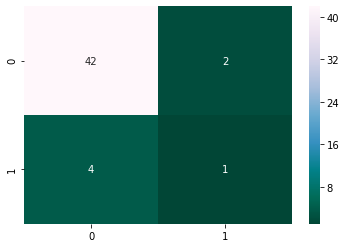

In [1095]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, BalB_bow_Final_hyper_pred))
print("f1 Score", f1_score(Y_test, BalB_bow_Final_hyper_pred,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, BalB_bow_Final_hyper_pred))
cm = confusion_matrix(Y_test, BalB_bow_Final_hyper_pred)
print("precision_score", precision_score(Y_test, BalB_bow_Final_hyper_pred,average = "macro"))
print("recall_score", recall_score(Y_test, BalB_bow_Final_hyper_pred,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [1096]:
arr = []
for ind,value in enumerate(BalB_bow_Final_hyper_pred):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

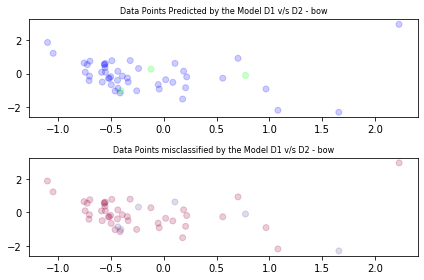

In [1098]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=BalB_bow_Final_hyper_pred, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_bow_scale[:,0], X_test_bow_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - bow",fontdict = font1)
plt.tight_layout()

<h3> Standard Bagging - GloVe - hyper</h3>

In [1115]:
#Tuning the hyper parameters for SVM - BoW using GridSearchCV
param_rand = {"n_estimators": np.arange(1,100,1000)}

StdBag_glove_hyper = BaggingClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(StdBag_glove_hyper, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(StdBag_glove_hyper, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(StdBag_glove_hyper, X_train_glove_scale, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

StdBag_glove_hyper_final = GridSearchCV(estimator=StdBag_glove_hyper, param_grid=param_rand, cv=cv2, n_jobs=-1,verbose=1)
StdBag_glove_hyper_Final = StdBag_glove_hyper_final.fit(X_train_glove_scale,Y_train)

print(StdBag_glove_hyper_Final.best_score_)
print(StdBag_glove_hyper_Final.best_params_)

Accuracy KFold: 0.89 Accuracy RepeatedKFold: 2.64 Accuracy StratifiedKFold: 0.87
Recall KFold: 0.03 Recall RepeatedKFold: 0.11 Recall StratifiedKFold: 0.02
Precision KFold: 0.10 Precision RepeatedKFold: 0.30 Precision StratifiedKFold: 0.10
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   40.8s finished


0.8772198731501056
{'n_estimators': 51}


In [1116]:
#implementing SVM - BoW
Bag_glove_final_hyper = BaggingClassifier(n_estimators=50)
Bag_glove_final_hyper.fit(X_train_glove_scale,Y_train)
Bag_glove_final_pred = Bag_glove_final_hyper.predict(X_test_glove_scale)
Bag_glove_final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

Accuracy: 0.8979591836734694
f1 Score 0.47311827956989244
confusion_matrix [[44  0]
 [ 5  0]]
precision_score 0.4489795918367347
recall_score 0.5


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



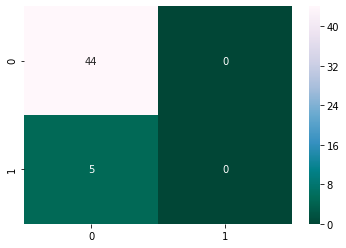

In [1117]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, Bag_glove_final_pred))
print("f1 Score", f1_score(Y_test, Bag_glove_final_pred,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, Bag_glove_final_pred))
cm = confusion_matrix(Y_test, Bag_glove_final_pred)
print("precision_score", precision_score(Y_test, Bag_glove_final_pred,average = "macro"))
print("recall_score", recall_score(Y_test, Bag_glove_final_pred,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [1118]:
arr = []
for ind,value in enumerate(Bag_glove_final_pred):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

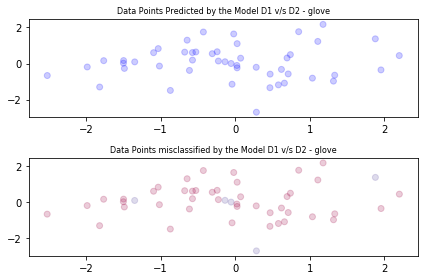

In [1119]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=Bag_glove_final_pred, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_glove_scale_1[:,0], X_test_glove_scale_1[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - glove",fontdict = font1)
plt.tight_layout()

<h3> EasyEnsemble - TF-IDF - hyper</h3>

In [355]:
#Tuning the hyper parameters for Balanced Bagging - BoW using GridSearchCV
param_rand = {"n_estimators": np.arange(10,500,50)}

Easyensemble_tfidf_hyper = EasyEnsembleClassifier()

cv = KFold(n_splits=10, shuffle=True)
cv1 = RepeatedKFold(n_splits=10,n_repeats=3)
cv2 = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(Easyensemble_tfidf_hyper, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv, n_jobs=-1)
scores1 = cross_validate(Easyensemble_tfidf_hyper, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv1, n_jobs=-1)
scores2 = cross_validate(Easyensemble_tfidf_hyper, features_2, Y_train, scoring=['accuracy','recall','precision'], cv=cv2, n_jobs=-1)

acc, acc1, acc2 = sum(scores['test_accuracy'])/10, sum(scores1['test_accuracy'])/10, sum(scores2['test_accuracy'])/10
rec, rec1, rec2 = sum(scores['test_recall'])/10, sum(scores1['test_recall'])/10, sum(scores2['test_recall'])/10
pre, pre1, pre2 = sum(scores['test_precision'])/10, sum(scores1['test_precision'])/10, sum(scores2['test_precision'])/10

print("Accuracy KFold: {:.2f} Accuracy RepeatedKFold: {:.2f} Accuracy StratifiedKFold: {:.2f}".format(acc,acc1,acc2))
print("Recall KFold: {:.2f} Recall RepeatedKFold: {:.2f} Recall StratifiedKFold: {:.2f}".format(rec,rec1,rec2))
print("Precision KFold: {:.2f} Precision RepeatedKFold: {:.2f} Precision StratifiedKFold: {:.2f}".format(pre,pre1,pre2))

Easyensemble_tfidf_hyper_ = GridSearchCV(estimator=Easyensemble_tfidf_hyper, param_grid=param_rand, cv=cv2, n_jobs=-1,verbose=1)
Easyensemble_tfidf_Hyper_ = Easyensemble_tfidf_hyper_.fit(features_2,Y_train)

print(Easyensemble_tfidf_Hyper_.best_score_)
print(Easyensemble_tfidf_Hyper_.best_params_)

Accuracy KFold: 0.50 Accuracy RepeatedKFold: 1.45 Accuracy StratifiedKFold: 0.46
Recall KFold: 0.59 Recall RepeatedKFold: 1.52 Recall StratifiedKFold: 0.48
Precision KFold: 0.12 Precision RepeatedKFold: 0.33 Precision StratifiedKFold: 0.09
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.2min finished


0.4883192389006342
{'n_estimators': 10}


In [528]:
#implementing Balanced Bagging - BoW
Easyensemble_tfidf_Hyper_final = EasyEnsembleClassifier(n_estimators= 10)
Easyensemble_tfidf_Hyper_final.fit(features_2,Y_train)
pred_Easyensemble_tfidf_Hyper_final = Easyensemble_tfidf_Hyper_final.predict(features_22)
pred_Easyensemble_tfidf_Hyper_final

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1])

Accuracy: 0.6530612244897959
f1 Score 0.5654668753260302
confusion_matrix [[27 17]
 [ 0  5]]
precision_score 0.6136363636363636
recall_score 0.8068181818181819


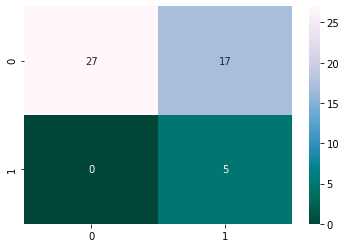

In [529]:
#Model Evaluation - Accuracy, F1-Score, Confusion Matrix, Precision Score, Recall Score
print("Accuracy:",metrics.accuracy_score(Y_test, pred_Easyensemble_tfidf_Hyper_final))
print("f1 Score", f1_score(Y_test, pred_Easyensemble_tfidf_Hyper_final,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test, pred_Easyensemble_tfidf_Hyper_final))
cm = confusion_matrix(Y_test, pred_Easyensemble_tfidf_Hyper_final)
print("precision_score", precision_score(Y_test, pred_Easyensemble_tfidf_Hyper_final,average = "macro"))
print("recall_score", recall_score(Y_test, pred_Easyensemble_tfidf_Hyper_final,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

In [530]:
arr = []
for ind,value in enumerate(pred_Easyensemble_tfidf_Hyper_final):
    if value == Y_test[ind]:
        arr.append(0)
    else:
        arr.append(1)   

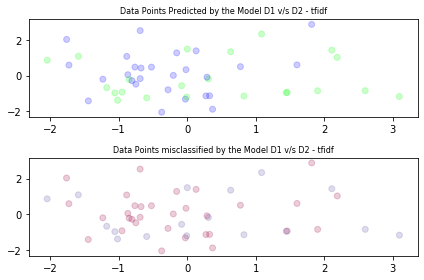

In [532]:
#scatterplot displaying the both classes of test data based on predicted result
plt.subplot(2, 1, 1)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=pred_Easyensemble_tfidf_Hyper_final, cmap='brg')
plt.title("Data Points Predicted by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()

#scatterplot displaying the both classes of test data based on predicted result - misclassified
plt.subplot(2, 1, 2)
plt.scatter(X_test_tfidf_scale[:,0], X_test_tfidf_scale[:,1], alpha=0.2, c=arr, cmap='Spectral')
plt.title("Data Points misclassified by the Model D1 v/s D2 - tfidf",fontdict = font1)
plt.tight_layout()